## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

,Site #,S_m2,WGS84 N,WGS 84 E,Origin,Dominant_specias,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,ln_Sr_wood,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,500.343869,51.435741,30.107979,n,Birch,920,6.824,10300,9.240,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,99.932806,51.434093,30.108523,a,Pine,3600,8.189,15100,9.622,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,99.932806,51.434163,30.109196,a,Pine,4360,8.380,14600,9.589,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,500.343869,51.434217,30.110484,a,Pine,3420,8.137,12700,9.449,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,249.965218,51.434056,30.111980,a,Pine,2200,7.696,12100,9.401,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Cs_wood', 'ln_Sr_wood', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 
                                    'r_MIN', 'contr_b_MAX', 'contr_b_STD'])
            
# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,r_MIN,contr_b_MAX,contr_b_STD
0,6.824,9.240,784,-0.731,2.576,13,2713.600586,332.963753
1,8.189,9.622,818,0.585,2.915,24,1793.493042,293.868420
2,8.380,9.589,818,0.779,2.882,18,1761.097900,272.526176
3,8.137,9.449,833,0.517,2.724,15,2518.435303,299.595643
4,7.696,9.401,717,0.224,2.826,8,2525.819336,327.599176


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Sr_2021_kBq_m  103 non-null    int64  
 3   ln_Tag_Cs      103 non-null    float64
 4   ln_Tag_Sr      103 non-null    float64
 5   r_MIN          103 non-null    int64  
 6   contr_b_MAX    103 non-null    float64
 7   contr_b_STD    103 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 6.6 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Cs_wood", "ln_Sr_wood"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Cs_wood                                                 \
                      count       mean       std     min      25%      50%   
Dominant_specias                                                             
Alder                   4.0   7.305000  1.427622   5.886   6.6765   7.0235   
Aspen                   1.0  11.367000       NaN  11.367  11.3670  11.3670   
Birch                  23.0   7.304652  1.533182   4.533   6.3365   7.2150   
Oak                     3.0   7.430333  1.260072   6.040   6.8970   7.7540   
Pine                   71.0   6.901690  1.650166   3.526   6.3790   6.9470   
Spruce                  1.0   5.176000       NaN   5.176   5.1760   5.1760   

                                  ln_Sr_wood                               \
                      75%     max      count       mean       std     min   
Dominant_specias                                                            
Alder              7.6520   9.287        4.0   7.206000  0.650057   6.265   
Aspen             11.3670  11.367        1.0  11.090000       NaN  11.090   
Birch              8.0320  10.332       23.0   9.345478  1.626360   7.139   
Oak                8.1255   8.497        3.0   7.483667  0.815040   6.565   
Pine               7.6960  10.469       71.0   8.542592  1.359020   6.075   
Spruce             5.1760   5.176        1.0   7.783000       NaN   7.783   

                                                     
                      25%      50%      75%     max  
Dominant_specias                                     
Alder              7.0255   7.4545   7.6350   7.650  
Aspen             11.0900  11.0900  11.0900  11.090  
Birch              8.4000   8.9910   9.9365  13.864  
Oak                7.1655   7.7660   7.9430   8.120  
Pine               7.6450   8.4720   9.3710  12.687  
Spruce             7.7830   7.7830   7.7830   7.783

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,r_MIN,contr_b_MAX,contr_b_STD
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,1136.436893,-0.252563,2.464709,11.378641,2712.352866,349.854034
std,1.64946,1.472424,2019.773384,1.104610,0.904675,9.139568,864.116297,93.673105
min,3.52600,6.075000,98.000000,-3.033000,0.391000,2.000000,832.155518,109.232976
25%,6.31900,7.664000,199.500000,-0.727500,1.803000,5.000000,2123.614868,292.544440
50%,6.95700,8.472000,362.000000,-0.025000,2.603000,8.000000,2601.248047,341.904211
75%,7.91350,9.421000,966.000000,0.516500,3.159000,15.000000,3045.944336,427.359073
max,11.36700,13.864000,10477.000000,1.652000,4.659000,56.000000,6252.923340,588.661708


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_Sr_wood"
indep_variables = ['Sr_2021_kBq_m', 'r_MIN', 'contr_b_MAX', 'contr_b_STD']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Cs_wood  ln_Sr_wood  Sr_2021_kBq_m  ln_Tag_Cs  ln_Tag_Sr  r_MIN  \
0         6.824       9.240            784     -0.731      2.576     13   
1         8.189       9.622            818      0.585      2.915     24   
2         8.380       9.589            818      0.779      2.882     18   
3         8.137       9.449            833      0.517      2.724     15   
4         7.696       9.401            717      0.224      2.826      8   
..          ...         ...            ...        ...        ...    ...   
98        8.071       8.434           1012      0.228      1.514      3   
99        7.993      10.042            908      0.266      3.230     18   
100       8.343      10.488            975      0.543      3.606     19   
101       3.638       6.399            269     -2.811      0.805      6   
102       4.787       6.877            292     -1.728      1.199      2   

     contr_b_MAX  contr_b_STD  
0    2713.600586   332.963753  
1    1793.493042   293.868420  
2  

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Sr_2021_kBq_m,r_MIN,contr_b_MAX,contr_b_STD
0,784,13,2713.600586,332.963753
1,818,24,1793.493042,293.868420
2,818,18,1761.097900,272.526176
3,833,15,2518.435303,299.595643
4,717,8,2525.819336,327.599176


In [11]:
# Columns in "y" data collections
y.head()

,ln_Sr_wood
0,9.240
1,9.622
2,9.589
3,9.449
4,9.401


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.7746137173177907, 0.6351506308691086, 0.4418652923698374]
    Mean: 0.617
    Std: 0.136

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.77744262 0.86324726 0.93249101]
    Mean: 0.858
    Std: 0.063

 --------------------
Mean absolute error (MAE): 

    Scores: [0.6212133741106308, 0.6966216334174661, 0.7720377357707303]
    Mean: 0.697
    Std: 0.062

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.5206490179446539                   # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.15204082630308058                  # gamma
print('Gamma: ' + str(p2))

p3 = 0.025211624383763856                # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 156           # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.7951821878824858                   # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.5206490179446539
Gamma: 0.15204082630308058
Learning_rate: 0.025211624383763856
Max_depth: 4
N_estimators: 156
Subsample: 0.7951821878824858


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:8.13608	validation_1-rmse:7.88598
[1]	validation_0-rmse:7.93801	validation_1-rmse:7.68587
[2]	validation_0-rmse:7.74918	validation_1-rmse:7.50058
[3]	validation_0-rmse:7.56286	validation_1-rmse:7.31217
[4]	validation_0-rmse:7.38013	validation_1-rmse:7.13321
[5]	validation_0-rmse:7.21007	validation_1-rmse:6.96108
[6]	validation_0-rmse:7.03876	validation_1-rmse:6.78760


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:6.87266	validation_1-rmse:6.61929
[8]	validation_0-rmse:6.71090	validation_1-rmse:6.46096
[9]	validation_0-rmse:6.55294	validation_1-rmse:6.30723
[10]	validation_0-rmse:6.39628	validation_1-rmse:6.14824
[11]	validation_0-rmse:6.24733	validation_1-rmse:5.99698
[12]	validation_0-rmse:6.09933	validation_1-rmse:5.85313
[13]	validation_0-rmse:5.95640	validation_1-rmse:5.71420
[14]	validation_0-rmse:5.81346	validation_1-rmse:5.57057
[15]	validation_0-rmse:5.67655	validation_1-rmse:5.43917
[16]	validation_0-rmse:5.54340	validation_1-rmse:5.30788
[17]	validation_0-rmse:5.41384	validation_1-rmse:5.17589
[18]	validation_0-rmse:5.28836	validation_1-rmse:5.05409
[19]	validation_0-rmse:5.16376	validation_1-rmse:4.93325
[20]	validation_0-rmse:5.04483	validation_1-rmse:4.81780
[21]	validation_0-rmse:4.92714	validation_1-rmse:4.69573
[22]	validation_0-rmse:4.80981	validation_1-rmse:4.58163
[23]	validation_0-rmse:4.69986	validation_1-rmse:4.47073
[24]	validation_0-rmse:4.58770	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.04002	validation_1-rmse:8.27589


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.84923	validation_1-rmse:8.08327
[2]	validation_0-rmse:7.66120	validation_1-rmse:7.89099
[3]	validation_0-rmse:7.47598	validation_1-rmse:7.70385
[4]	validation_0-rmse:7.30163	validation_1-rmse:7.52761
[5]	validation_0-rmse:7.12652	validation_1-rmse:7.35049
[6]	validation_0-rmse:6.95849	validation_1-rmse:7.18043
[7]	validation_0-rmse:6.79289	validation_1-rmse:7.01274
[8]	validation_0-rmse:6.62916	validation_1-rmse:6.84469
[9]	validation_0-rmse:6.47263	validation_1-rmse:6.68601
[10]	validation_0-rmse:6.32240	validation_1-rmse:6.53361
[11]	validation_0-rmse:6.17387	validation_1-rmse:6.38282
[12]	validation_0-rmse:6.02862	validation_1-rmse:6.23525
[13]	validation_0-rmse:5.88587	validation_1-rmse:6.08514
[14]	validation_0-rmse:5.74892	validation_1-rmse:5.94037
[15]	validation_0-rmse:5.61187	validation_1-rmse:5.79911
[16]	validation_0-rmse:5.47936	validation_1-rmse:5.66253
[17]	validation_0-rmse:5.35089	validation_1-rmse:5.52715
[18]	validation_0-rmse:5.22820	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.14828	validation_1-rmse:7.81818
[1]	validation_0-rmse:7.94964	validation_1-rmse:7.61823
[2]	validation_0-rmse:7.75899	validation_1-rmse:7.41886
[3]	validation_0-rmse:7.57443	validation_1-rmse:7.23297
[4]	validation_0-rmse:7.39417	validation_1-rmse:7.04411
[5]	validation_0-rmse:7.21805	validation_1-rmse:6.86663
[6]	validation_0-rmse:7.04720	validation_1-rmse:6.69439
[7]	validation_0-rmse:6.87902	validation_1-rmse:6.52478
[8]	validation_0-rmse:6.71333	validation_1-rmse:6.35034
[9]	validation_0-rmse:6.55510	validation_1-rmse:6.19174
[10]	validation_0-rmse:6.40294	validation_1-rmse:6.03815
[11]	validation_0-rmse:6.25479	validation_1-rmse:5.88856
[12]	validation_0-rmse:6.10987	validation_1-rmse:5.74339
[13]	validation_0-rmse:5.96561	validation_1-rmse:5.59871
[14]	validation_0-rmse:5.82738	validation_1-rmse:5.46021
[15]	validation_0-rmse:5.69077	validation_1-rmse:5.31573
[16]	validation_0-rmse:5.55615	validation_1-rmse:5.17324
[17]	validation_0-rmse:5.42797	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.08835	validation_1-rmse:8.07887


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.89378	validation_1-rmse:7.88289
[2]	validation_0-rmse:7.70386	validation_1-rmse:7.69029
[3]	validation_0-rmse:7.52089	validation_1-rmse:7.50588
[4]	validation_0-rmse:7.34287	validation_1-rmse:7.32521
[5]	validation_0-rmse:7.16880	validation_1-rmse:7.14964
[6]	validation_0-rmse:6.99682	validation_1-rmse:6.97611
[7]	validation_0-rmse:6.83257	validation_1-rmse:6.81030
[8]	validation_0-rmse:6.67158	validation_1-rmse:6.64677
[9]	validation_0-rmse:6.51559	validation_1-rmse:6.48917
[10]	validation_0-rmse:6.36575	validation_1-rmse:6.34007
[11]	validation_0-rmse:6.21705	validation_1-rmse:6.18969
[12]	validation_0-rmse:6.07075	validation_1-rmse:6.04166
[13]	validation_0-rmse:5.92559	validation_1-rmse:5.89470
[14]	validation_0-rmse:5.79003	validation_1-rmse:5.76020
[15]	validation_0-rmse:5.65556	validation_1-rmse:5.62313
[16]	validation_0-rmse:5.52198	validation_1-rmse:5.48684
[17]	validation_0-rmse:5.39492	validation_1-rmse:5.35625
[18]	validation_0-rmse:5.26868	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.25802	validation_1-rmse:7.39010
[1]	validation_0-rmse:8.06307	validation_1-rmse:7.19401


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.86827	validation_1-rmse:7.01334
[3]	validation_0-rmse:7.68106	validation_1-rmse:6.82497
[4]	validation_0-rmse:7.49615	validation_1-rmse:6.65278
[5]	validation_0-rmse:7.31695	validation_1-rmse:6.47241
[6]	validation_0-rmse:7.14336	validation_1-rmse:6.29764
[7]	validation_0-rmse:6.97230	validation_1-rmse:6.12539
[8]	validation_0-rmse:6.80407	validation_1-rmse:5.97080
[9]	validation_0-rmse:6.64588	validation_1-rmse:5.81145
[10]	validation_0-rmse:6.48935	validation_1-rmse:5.65374
[11]	validation_0-rmse:6.33588	validation_1-rmse:5.49908
[12]	validation_0-rmse:6.18866	validation_1-rmse:5.35067
[13]	validation_0-rmse:6.04863	validation_1-rmse:5.20948
[14]	validation_0-rmse:5.91006	validation_1-rmse:5.06974
[15]	validation_0-rmse:5.77250	validation_1-rmse:4.94474
[16]	validation_0-rmse:5.63828	validation_1-rmse:4.82202
[17]	validation_0-rmse:5.50741	validation_1-rmse:4.68999
[18]	validation_0-rmse:5.38060	validation_1-rmse:4.57542
[19]	validation_0-rmse:5.25517	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.01518	validation_1-rmse:8.38579
[1]	validation_0-rmse:7.82028	validation_1-rmse:8.19159
[2]	validation_0-rmse:7.63305	validation_1-rmse:8.00505
[3]	validation_0-rmse:7.44918	validation_1-rmse:7.82189
[4]	validation_0-rmse:7.27177	validation_1-rmse:7.63469
[5]	validation_0-rmse:7.09325	validation_1-rmse:7.45692
[6]	validation_0-rmse:6.92175	validation_1-rmse:7.28616
[7]	validation_0-rmse:6.75876	validation_1-rmse:7.12390
[8]	validation_0-rmse:6.59598	validation_1-rmse:6.95144
[9]	validation_0-rmse:6.44078	validation_1-rmse:6.79700
[10]	validation_0-rmse:6.28907	validation_1-rmse:6.64606
[11]	validation_0-rmse:6.14349	validation_1-rmse:6.50124
[12]	validation_0-rmse:6.00009	validation_1-rmse:6.35861
[13]	validation_0-rmse:5.85898	validation_1-rmse:6.21828
[14]	validation_0-rmse:5.72272	validation_1-rmse:6.08280
[15]	validation_0-rmse:5.58719	validation_1-rmse:5.93832
[16]	validation_0-rmse:5.45476	validation_1-rmse:5.79639
[17]	validation_0-rmse:5.32749	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.10267	validation_1-rmse:8.02518
[1]	validation_0-rmse:7.90917	validation_1-rmse:7.83218
[2]	validation_0-rmse:7.71857	validation_1-rmse:7.64279
[3]	validation_0-rmse:7.52889	validation_1-rmse:7.45365
[4]	validation_0-rmse:7.35089	validation_1-rmse:7.27566
[5]	validation_0-rmse:7.17696	validation_1-rmse:7.10226
[6]	validation_0-rmse:7.00449	validation_1-rmse:6.93035
[7]	validation_0-rmse:6.83571	validation_1-rmse:6.76215
[8]	validation_0-rmse:6.67298	validation_1-rmse:6.60056
[9]	validation_0-rmse:6.51338	validation_1-rmse:6.44156
[10]	validation_0-rmse:6.35820	validation_1-rmse:6.28699
[11]	validation_0-rmse:6.20804	validation_1-rmse:6.13745
[12]	validation_0-rmse:6.05954	validation_1-rmse:5.98959
[13]	validation_0-rmse:5.91669	validation_1-rmse:5.84849
[14]	validation_0-rmse:5.77835	validation_1-rmse:5.71079
[15]	validation_0-rmse:5.64189	validation_1-rmse:5.57553
[16]	validation_0-rmse:5.50950	validation_1-rmse:5.44429
[17]	validation_0-rmse:5.37776	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.19835	validation_1-rmse:7.63963
[1]	validation_0-rmse:8.00016	validation_1-rmse:7.43978
[2]	validation_0-rmse:7.80582	validation_1-rmse:7.25914
[3]	validation_0-rmse:7.61848	validation_1-rmse:7.07014
[4]	validation_0-rmse:7.43326	validation_1-rmse:6.90117
[5]	validation_0-rmse:7.25847	validation_1-rmse:6.72472
[6]	validation_0-rmse:7.08608	validation_1-rmse:6.55062
[7]	validation_0-rmse:6.91955	validation_1-rmse:6.38237
[8]	validation_0-rmse:6.75448	validation_1-rmse:6.23101
[9]	validation_0-rmse:6.59655	validation_1-rmse:6.07134
[10]	validation_0-rmse:6.44193	validation_1-rmse:5.92804
[11]	validation_0-rmse:6.28881	validation_1-rmse:5.77313
[12]	validation_0-rmse:6.14202	validation_1-rmse:5.62455
[13]	validation_0-rmse:5.99537	validation_1-rmse:5.48932
[14]	validation_0-rmse:5.85382	validation_1-rmse:5.34593
[15]	validation_0-rmse:5.71455	validation_1-rmse:5.21252
[16]	validation_0-rmse:5.57928	validation_1-rmse:5.09090
[17]	validation_0-rmse:5.45333	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.10455	validation_1-rmse:8.02503


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.91049	validation_1-rmse:7.83162
[2]	validation_0-rmse:7.71941	validation_1-rmse:7.64466
[3]	validation_0-rmse:7.53314	validation_1-rmse:7.45906
[4]	validation_0-rmse:7.35205	validation_1-rmse:7.28180
[5]	validation_0-rmse:7.17680	validation_1-rmse:7.11342
[6]	validation_0-rmse:7.00848	validation_1-rmse:6.94580
[7]	validation_0-rmse:6.84046	validation_1-rmse:6.77851
[8]	validation_0-rmse:6.67486	validation_1-rmse:6.61645
[9]	validation_0-rmse:6.51419	validation_1-rmse:6.46201
[10]	validation_0-rmse:6.35826	validation_1-rmse:6.30687
[11]	validation_0-rmse:6.20709	validation_1-rmse:6.15650
[12]	validation_0-rmse:6.05863	validation_1-rmse:6.00887
[13]	validation_0-rmse:5.91193	validation_1-rmse:5.86303
[14]	validation_0-rmse:5.77358	validation_1-rmse:5.73042
[15]	validation_0-rmse:5.63566	validation_1-rmse:5.59497
[16]	validation_0-rmse:5.50238	validation_1-rmse:5.46504
[17]	validation_0-rmse:5.37509	validation_1-rmse:5.33862
[18]	validation_0-rmse:5.24872	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.18927	validation_1-rmse:7.68249


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.99266	validation_1-rmse:7.48378
[2]	validation_0-rmse:7.79945	validation_1-rmse:7.30090
[3]	validation_0-rmse:7.61327	validation_1-rmse:7.11259
[4]	validation_0-rmse:7.43024	validation_1-rmse:6.94078
[5]	validation_0-rmse:7.25054	validation_1-rmse:6.75886
[6]	validation_0-rmse:7.07915	validation_1-rmse:6.58527
[7]	validation_0-rmse:6.91524	validation_1-rmse:6.41914
[8]	validation_0-rmse:6.74904	validation_1-rmse:6.26281
[9]	validation_0-rmse:6.59292	validation_1-rmse:6.10442
[10]	validation_0-rmse:6.43544	validation_1-rmse:5.94454
[11]	validation_0-rmse:6.28108	validation_1-rmse:5.78772
[12]	validation_0-rmse:6.13402	validation_1-rmse:5.63935
[13]	validation_0-rmse:5.99053	validation_1-rmse:5.49457
[14]	validation_0-rmse:5.84896	validation_1-rmse:5.35181
[15]	validation_0-rmse:5.71058	validation_1-rmse:5.22761
[16]	validation_0-rmse:5.57568	validation_1-rmse:5.10256
[17]	validation_0-rmse:5.44761	validation_1-rmse:4.96961
[18]	validation_0-rmse:5.31781	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.87466	validation_1-rmse:8.89317
[1]	validation_0-rmse:7.68628	validation_1-rmse:8.70599
[2]	validation_0-rmse:7.49944	validation_1-rmse:8.50717
[3]	validation_0-rmse:7.31621	validation_1-rmse:8.32520
[4]	validation_0-rmse:7.13751	validation_1-rmse:8.13565
[5]	validation_0-rmse:6.96701	validation_1-rmse:7.96642
[6]	validation_0-rmse:6.79900	validation_1-rmse:7.79968
[7]	validation_0-rmse:6.63633	validation_1-rmse:7.63830
[8]	validation_0-rmse:6.47535	validation_1-rmse:7.46780
[9]	validation_0-rmse:6.31960	validation_1-rmse:7.31336
[10]	validation_0-rmse:6.17136	validation_1-rmse:7.16641
[11]	validation_0-rmse:6.02567	validation_1-rmse:7.02202
[12]	validation_0-rmse:5.88265	validation_1-rmse:6.88030
[13]	validation_0-rmse:5.74375	validation_1-rmse:6.74271
[14]	validation_0-rmse:5.60500	validation_1-rmse:6.60528
[15]	validation_0-rmse:5.47195	validation_1-rmse:6.46289
[16]	validation_0-rmse:5.34225	validation_1-rmse:6.32233
[17]	validation_0-rmse:5.21659	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.15760	validation_1-rmse:7.80912
[1]	validation_0-rmse:7.96045	validation_1-rmse:7.61120


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.76776	validation_1-rmse:7.42825
[3]	validation_0-rmse:7.58114	validation_1-rmse:7.24084
[4]	validation_0-rmse:7.39907	validation_1-rmse:7.05796
[5]	validation_0-rmse:7.22611	validation_1-rmse:6.88516
[6]	validation_0-rmse:7.05526	validation_1-rmse:6.71352
[7]	validation_0-rmse:6.89141	validation_1-rmse:6.54888
[8]	validation_0-rmse:6.72795	validation_1-rmse:6.39445
[9]	validation_0-rmse:6.56955	validation_1-rmse:6.23619
[10]	validation_0-rmse:6.41489	validation_1-rmse:6.08071
[11]	validation_0-rmse:6.26534	validation_1-rmse:5.93035
[12]	validation_0-rmse:6.11646	validation_1-rmse:5.78172
[13]	validation_0-rmse:5.97611	validation_1-rmse:5.64057
[14]	validation_0-rmse:5.83380	validation_1-rmse:5.49866
[15]	validation_0-rmse:5.69338	validation_1-rmse:5.36785
[16]	validation_0-rmse:5.55871	validation_1-rmse:5.23293
[17]	validation_0-rmse:5.42601	validation_1-rmse:5.09938
[18]	validation_0-rmse:5.29879	validation_1-rmse:4.97355
[19]	validation_0-rmse:5.17259	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.07205	validation_1-rmse:8.14058


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.87733	validation_1-rmse:7.94694
[2]	validation_0-rmse:7.68761	validation_1-rmse:7.76509
[3]	validation_0-rmse:7.50407	validation_1-rmse:7.58266
[4]	validation_0-rmse:7.32242	validation_1-rmse:7.40836
[5]	validation_0-rmse:7.14836	validation_1-rmse:7.23544
[6]	validation_0-rmse:6.97834	validation_1-rmse:7.06657
[7]	validation_0-rmse:6.80982	validation_1-rmse:6.89926
[8]	validation_0-rmse:6.64551	validation_1-rmse:6.74198
[9]	validation_0-rmse:6.48862	validation_1-rmse:6.58630
[10]	validation_0-rmse:6.33679	validation_1-rmse:6.43570
[11]	validation_0-rmse:6.18674	validation_1-rmse:6.28693
[12]	validation_0-rmse:6.03878	validation_1-rmse:6.14613
[13]	validation_0-rmse:5.89817	validation_1-rmse:6.00685
[14]	validation_0-rmse:5.75648	validation_1-rmse:5.87273
[15]	validation_0-rmse:5.61891	validation_1-rmse:5.74221
[16]	validation_0-rmse:5.48651	validation_1-rmse:5.61741
[17]	validation_0-rmse:5.35809	validation_1-rmse:5.49042
[18]	validation_0-rmse:5.23259	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.11907	validation_1-rmse:7.96311
[1]	validation_0-rmse:7.92450	validation_1-rmse:7.76757
[2]	validation_0-rmse:7.73319	validation_1-rmse:7.57720
[3]	validation_0-rmse:7.54620	validation_1-rmse:7.38921
[4]	validation_0-rmse:7.36556	validation_1-rmse:7.20933
[5]	validation_0-rmse:7.19108	validation_1-rmse:7.03383
[6]	validation_0-rmse:7.01777	validation_1-rmse:6.85946
[7]	validation_0-rmse:6.84940	validation_1-rmse:6.70166
[8]	validation_0-rmse:6.68475	validation_1-rmse:6.53660
[9]	validation_0-rmse:6.52806	validation_1-rmse:6.38858
[10]	validation_0-rmse:6.37351	validation_1-rmse:6.23304
[11]	validation_0-rmse:6.22044	validation_1-rmse:6.07892
[12]	validation_0-rmse:6.07345	validation_1-rmse:5.94014
[13]	validation_0-rmse:5.92748	validation_1-rmse:5.80373
[14]	validation_0-rmse:5.79213	validation_1-rmse:5.66744
[15]	validation_0-rmse:5.65587	validation_1-rmse:5.53154
[16]	validation_0-rmse:5.52372	validation_1-rmse:5.39983
[17]	validation_0-rmse:5.39534	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.09806	validation_1-rmse:8.05390
[1]	validation_0-rmse:7.90166	validation_1-rmse:7.85716
[2]	validation_0-rmse:7.71055	validation_1-rmse:7.67324
[3]	validation_0-rmse:7.52234	validation_1-rmse:7.48466
[4]	validation_0-rmse:7.33761	validation_1-rmse:7.30409
[5]	validation_0-rmse:7.16004	validation_1-rmse:7.12616
[6]	validation_0-rmse:6.98784	validation_1-rmse:6.95358
[7]	validation_0-rmse:6.82537	validation_1-rmse:6.79074
[8]	validation_0-rmse:6.66345	validation_1-rmse:6.63506
[9]	validation_0-rmse:6.50454	validation_1-rmse:6.47574
[10]	validation_0-rmse:6.35063	validation_1-rmse:6.32142
[11]	validation_0-rmse:6.19971	validation_1-rmse:6.17008
[12]	validation_0-rmse:6.05708	validation_1-rmse:6.02148
[13]	validation_0-rmse:5.91216	validation_1-rmse:5.87611
[14]	validation_0-rmse:5.77220	validation_1-rmse:5.73568
[15]	validation_0-rmse:5.63719	validation_1-rmse:5.60641
[16]	validation_0-rmse:5.49985	validation_1-rmse:5.47116
[17]	validation_0-rmse:5.37078	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.04720	validation_1-rmse:8.23625
[1]	validation_0-rmse:7.85341	validation_1-rmse:8.04492
[2]	validation_0-rmse:7.66148	validation_1-rmse:7.85554
[3]	validation_0-rmse:7.47638	validation_1-rmse:7.67302
[4]	validation_0-rmse:7.29620	validation_1-rmse:7.49547
[5]	validation_0-rmse:7.12212	validation_1-rmse:7.32406
[6]	validation_0-rmse:6.95234	validation_1-rmse:7.15701
[7]	validation_0-rmse:6.78596	validation_1-rmse:6.99342
[8]	validation_0-rmse:6.62438	validation_1-rmse:6.83613
[9]	validation_0-rmse:6.46890	validation_1-rmse:6.68347
[10]	validation_0-rmse:6.31285	validation_1-rmse:6.53040
[11]	validation_0-rmse:6.15717	validation_1-rmse:6.37782
[12]	validation_0-rmse:6.01235	validation_1-rmse:6.23603
[13]	validation_0-rmse:5.87034	validation_1-rmse:6.09713
[14]	validation_0-rmse:5.73081	validation_1-rmse:5.96078
[15]	validation_0-rmse:5.59365	validation_1-rmse:5.82822
[16]	validation_0-rmse:5.46214	validation_1-rmse:5.70122
[17]	validation_0-rmse:5.33133	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.10413	validation_1-rmse:8.01551
[1]	validation_0-rmse:7.90758	validation_1-rmse:7.81835
[2]	validation_0-rmse:7.71611	validation_1-rmse:7.62796
[3]	validation_0-rmse:7.53250	validation_1-rmse:7.44374
[4]	validation_0-rmse:7.35200	validation_1-rmse:7.26448
[5]	validation_0-rmse:7.17713	validation_1-rmse:7.08898
[6]	validation_0-rmse:7.00109	validation_1-rmse:6.91228
[7]	validation_0-rmse:6.83529	validation_1-rmse:6.74584
[8]	validation_0-rmse:6.67186	validation_1-rmse:6.58342
[9]	validation_0-rmse:6.51350	validation_1-rmse:6.42440
[10]	validation_0-rmse:6.36016	validation_1-rmse:6.27038
[11]	validation_0-rmse:6.21003	validation_1-rmse:6.11956
[12]	validation_0-rmse:6.06667	validation_1-rmse:5.97551
[13]	validation_0-rmse:5.92487	validation_1-rmse:5.83512
[14]	validation_0-rmse:5.78605	validation_1-rmse:5.69756
[15]	validation_0-rmse:5.64778	validation_1-rmse:5.56010
[16]	validation_0-rmse:5.51327	validation_1-rmse:5.42647
[17]	validation_0-rmse:5.38571	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.07699	validation_1-rmse:8.13741
[1]	validation_0-rmse:7.88681	validation_1-rmse:7.94704
[2]	validation_0-rmse:7.69884	validation_1-rmse:7.75245
[3]	validation_0-rmse:7.51535	validation_1-rmse:7.56877
[4]	validation_0-rmse:7.33663	validation_1-rmse:7.38259
[5]	validation_0-rmse:7.15848	validation_1-rmse:7.20423
[6]	validation_0-rmse:6.98632	validation_1-rmse:7.03184
[7]	validation_0-rmse:6.82053	validation_1-rmse:6.86583
[8]	validation_0-rmse:6.65640	validation_1-rmse:6.69660
[9]	validation_0-rmse:6.49717	validation_1-rmse:6.53712
[10]	validation_0-rmse:6.34381	validation_1-rmse:6.38353
[11]	validation_0-rmse:6.19363	validation_1-rmse:6.23309
[12]	validation_0-rmse:6.04815	validation_1-rmse:6.08736
[13]	validation_0-rmse:5.90449	validation_1-rmse:5.94343
[14]	validation_0-rmse:5.76492	validation_1-rmse:5.80492
[15]	validation_0-rmse:5.63164	validation_1-rmse:5.66659
[16]	validation_0-rmse:5.49994	validation_1-rmse:5.53029
[17]	validation_0-rmse:5.37232	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.16324	validation_1-rmse:7.78738
[1]	validation_0-rmse:7.96818	validation_1-rmse:7.59111
[2]	validation_0-rmse:7.77618	validation_1-rmse:7.40971
[3]	validation_0-rmse:7.59034	validation_1-rmse:7.22264
[4]	validation_0-rmse:7.40672	validation_1-rmse:7.04976
[5]	validation_0-rmse:7.22668	validation_1-rmse:6.86845
[6]	validation_0-rmse:7.05472	validation_1-rmse:6.69522
[7]	validation_0-rmse:6.88393	validation_1-rmse:6.52311
[8]	validation_0-rmse:6.71887	validation_1-rmse:6.36940
[9]	validation_0-rmse:6.55990	validation_1-rmse:6.20912
[10]	validation_0-rmse:6.40548	validation_1-rmse:6.05338
[11]	validation_0-rmse:6.25342	validation_1-rmse:5.89996
[12]	validation_0-rmse:6.10572	validation_1-rmse:5.75346
[13]	validation_0-rmse:5.96091	validation_1-rmse:5.60979
[14]	validation_0-rmse:5.82296	validation_1-rmse:5.47043
[15]	validation_0-rmse:5.68557	validation_1-rmse:5.34265
[16]	validation_0-rmse:5.55060	validation_1-rmse:5.21748
[17]	validation_0-rmse:5.42150	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.05441	validation_1-rmse:8.21276


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.85937	validation_1-rmse:8.01863
[2]	validation_0-rmse:7.67031	validation_1-rmse:7.83713
[3]	validation_0-rmse:7.48646	validation_1-rmse:7.65421
[4]	validation_0-rmse:7.30476	validation_1-rmse:7.47992
[5]	validation_0-rmse:7.13509	validation_1-rmse:7.31117
[6]	validation_0-rmse:6.96678	validation_1-rmse:7.14381
[7]	validation_0-rmse:6.80315	validation_1-rmse:6.98115
[8]	validation_0-rmse:6.63910	validation_1-rmse:6.82423
[9]	validation_0-rmse:6.47967	validation_1-rmse:6.66581
[10]	validation_0-rmse:6.32592	validation_1-rmse:6.51308
[11]	validation_0-rmse:6.17578	validation_1-rmse:6.36398
[12]	validation_0-rmse:6.03014	validation_1-rmse:6.21939
[13]	validation_0-rmse:5.88563	validation_1-rmse:6.07596
[14]	validation_0-rmse:5.74410	validation_1-rmse:5.93554
[15]	validation_0-rmse:5.60756	validation_1-rmse:5.80621
[16]	validation_0-rmse:5.47734	validation_1-rmse:5.68222
[17]	validation_0-rmse:5.34780	validation_1-rmse:5.55380
[18]	validation_0-rmse:5.22282	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.16887	validation_1-rmse:7.76996
[1]	validation_0-rmse:7.97079	validation_1-rmse:7.57033
[2]	validation_0-rmse:7.77927	validation_1-rmse:7.38150
[3]	validation_0-rmse:7.59696	validation_1-rmse:7.19762
[4]	validation_0-rmse:7.41211	validation_1-rmse:7.01588
[5]	validation_0-rmse:7.23430	validation_1-rmse:6.83639
[6]	validation_0-rmse:7.06368	validation_1-rmse:6.66410
[7]	validation_0-rmse:6.89417	validation_1-rmse:6.49285
[8]	validation_0-rmse:6.73119	validation_1-rmse:6.33237
[9]	validation_0-rmse:6.57046	validation_1-rmse:6.17346
[10]	validation_0-rmse:6.41280	validation_1-rmse:6.01397
[11]	validation_0-rmse:6.26117	validation_1-rmse:5.86051
[12]	validation_0-rmse:6.11139	validation_1-rmse:5.71267
[13]	validation_0-rmse:5.97021	validation_1-rmse:5.57337
[14]	validation_0-rmse:5.83085	validation_1-rmse:5.43216
[15]	validation_0-rmse:5.69362	validation_1-rmse:5.29711
[16]	validation_0-rmse:5.55778	validation_1-rmse:5.16263
[17]	validation_0-rmse:5.42950	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.04094	validation_1-rmse:8.29275


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.84357	validation_1-rmse:8.09499
[2]	validation_0-rmse:7.65474	validation_1-rmse:7.89140
[3]	validation_0-rmse:7.47234	validation_1-rmse:7.70861
[4]	validation_0-rmse:7.29393	validation_1-rmse:7.51525
[5]	validation_0-rmse:7.12006	validation_1-rmse:7.34098
[6]	validation_0-rmse:6.95108	validation_1-rmse:7.17160
[7]	validation_0-rmse:6.78906	validation_1-rmse:7.00916
[8]	validation_0-rmse:6.62523	validation_1-rmse:6.83199
[9]	validation_0-rmse:6.47009	validation_1-rmse:6.67642
[10]	validation_0-rmse:6.31842	validation_1-rmse:6.52432
[11]	validation_0-rmse:6.17058	validation_1-rmse:6.37410
[12]	validation_0-rmse:6.02829	validation_1-rmse:6.23138
[13]	validation_0-rmse:5.88869	validation_1-rmse:6.08575
[14]	validation_0-rmse:5.75171	validation_1-rmse:5.94829
[15]	validation_0-rmse:5.61428	validation_1-rmse:5.79789
[16]	validation_0-rmse:5.48037	validation_1-rmse:5.65075
[17]	validation_0-rmse:5.35359	validation_1-rmse:5.52350
[18]	validation_0-rmse:5.23014	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.14093	validation_1-rmse:7.86605
[1]	validation_0-rmse:7.94554	validation_1-rmse:7.67047
[2]	validation_0-rmse:7.75341	validation_1-rmse:7.47933
[3]	validation_0-rmse:7.56737	validation_1-rmse:7.29309
[4]	validation_0-rmse:7.38665	validation_1-rmse:7.11333
[5]	validation_0-rmse:7.20843	validation_1-rmse:6.93491
[6]	validation_0-rmse:7.03471	validation_1-rmse:6.76099
[7]	validation_0-rmse:6.86976	validation_1-rmse:6.59585
[8]	validation_0-rmse:6.70435	validation_1-rmse:6.43140
[9]	validation_0-rmse:6.54548	validation_1-rmse:6.27822
[10]	validation_0-rmse:6.38746	validation_1-rmse:6.12003
[11]	validation_0-rmse:6.23557	validation_1-rmse:5.96796
[12]	validation_0-rmse:6.09253	validation_1-rmse:5.82958
[13]	validation_0-rmse:5.94885	validation_1-rmse:5.68575
[14]	validation_0-rmse:5.81049	validation_1-rmse:5.55255
[15]	validation_0-rmse:5.67494	validation_1-rmse:5.41792
[16]	validation_0-rmse:5.54100	validation_1-rmse:5.28411
[17]	validation_0-rmse:5.41227	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.96645	validation_1-rmse:8.55006
[1]	validation_0-rmse:7.77621	validation_1-rmse:8.36114
[2]	validation_0-rmse:7.58679	validation_1-rmse:8.16805
[3]	validation_0-rmse:7.40186	validation_1-rmse:7.98450
[4]	validation_0-rmse:7.22438	validation_1-rmse:7.80840
[5]	validation_0-rmse:7.04855	validation_1-rmse:7.63397
[6]	validation_0-rmse:6.88067	validation_1-rmse:7.46749
[7]	validation_0-rmse:6.71610	validation_1-rmse:7.30435
[8]	validation_0-rmse:6.55599	validation_1-rmse:7.14158
[9]	validation_0-rmse:6.40067	validation_1-rmse:6.98770
[10]	validation_0-rmse:6.24902	validation_1-rmse:6.83750
[11]	validation_0-rmse:6.09824	validation_1-rmse:6.68822
[12]	validation_0-rmse:5.95549	validation_1-rmse:6.54694
[13]	validation_0-rmse:5.81535	validation_1-rmse:6.40830
[14]	validation_0-rmse:5.67582	validation_1-rmse:6.26581
[15]	validation_0-rmse:5.54112	validation_1-rmse:6.12811
[16]	validation_0-rmse:5.40856	validation_1-rmse:5.99214
[17]	validation_0-rmse:5.28294	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.10172	validation_1-rmse:8.03308


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.90707	validation_1-rmse:7.83777
[2]	validation_0-rmse:7.71768	validation_1-rmse:7.64650
[3]	validation_0-rmse:7.53093	validation_1-rmse:7.46615
[4]	validation_0-rmse:7.35066	validation_1-rmse:7.28399
[5]	validation_0-rmse:7.17674	validation_1-rmse:7.10943
[6]	validation_0-rmse:7.00523	validation_1-rmse:6.93726
[7]	validation_0-rmse:6.83645	validation_1-rmse:6.76779
[8]	validation_0-rmse:6.67198	validation_1-rmse:6.60153
[9]	validation_0-rmse:6.51529	validation_1-rmse:6.44416
[10]	validation_0-rmse:6.36121	validation_1-rmse:6.28937
[11]	validation_0-rmse:6.21067	validation_1-rmse:6.13811
[12]	validation_0-rmse:6.06397	validation_1-rmse:5.99669
[13]	validation_0-rmse:5.92134	validation_1-rmse:5.85899
[14]	validation_0-rmse:5.78046	validation_1-rmse:5.71740
[15]	validation_0-rmse:5.64708	validation_1-rmse:5.58253
[16]	validation_0-rmse:5.51416	validation_1-rmse:5.45083
[17]	validation_0-rmse:5.38464	validation_1-rmse:5.32058
[18]	validation_0-rmse:5.25675	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.17891	validation_1-rmse:7.71301
[1]	validation_0-rmse:7.98342	validation_1-rmse:7.51795
[2]	validation_0-rmse:7.79007	validation_1-rmse:7.32219
[3]	validation_0-rmse:7.60079	validation_1-rmse:7.13336
[4]	validation_0-rmse:7.41873	validation_1-rmse:6.94887
[5]	validation_0-rmse:7.23864	validation_1-rmse:6.76925
[6]	validation_0-rmse:7.06382	validation_1-rmse:6.59493
[7]	validation_0-rmse:6.89655	validation_1-rmse:6.42817
[8]	validation_0-rmse:6.73026	validation_1-rmse:6.25939
[9]	validation_0-rmse:6.57049	validation_1-rmse:6.10015
[10]	validation_0-rmse:6.41346	validation_1-rmse:5.94369
[11]	validation_0-rmse:6.25992	validation_1-rmse:5.79075
[12]	validation_0-rmse:6.11196	validation_1-rmse:5.64342
[13]	validation_0-rmse:5.96639	validation_1-rmse:5.49851
[14]	validation_0-rmse:5.82948	validation_1-rmse:5.36229
[15]	validation_0-rmse:5.69164	validation_1-rmse:5.22583
[16]	validation_0-rmse:5.56047	validation_1-rmse:5.09272
[17]	validation_0-rmse:5.42963	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.02396	validation_1-rmse:8.34913


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.83146	validation_1-rmse:8.15748
[2]	validation_0-rmse:7.64192	validation_1-rmse:7.96398
[3]	validation_0-rmse:7.45947	validation_1-rmse:7.78241
[4]	validation_0-rmse:7.28037	validation_1-rmse:7.59971
[5]	validation_0-rmse:7.10497	validation_1-rmse:7.42523
[6]	validation_0-rmse:6.93440	validation_1-rmse:7.25559
[7]	validation_0-rmse:6.76595	validation_1-rmse:7.08811
[8]	validation_0-rmse:6.60242	validation_1-rmse:6.92191
[9]	validation_0-rmse:6.44607	validation_1-rmse:6.76654
[10]	validation_0-rmse:6.29206	validation_1-rmse:6.61352
[11]	validation_0-rmse:6.14337	validation_1-rmse:6.46583
[12]	validation_0-rmse:5.99824	validation_1-rmse:6.32172
[13]	validation_0-rmse:5.85798	validation_1-rmse:6.18248
[14]	validation_0-rmse:5.72030	validation_1-rmse:6.04374
[15]	validation_0-rmse:5.58412	validation_1-rmse:5.90336
[16]	validation_0-rmse:5.45208	validation_1-rmse:5.76811
[17]	validation_0-rmse:5.32497	validation_1-rmse:5.64214
[18]	validation_0-rmse:5.19855	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.92712	validation_1-rmse:8.69043


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.73800	validation_1-rmse:8.50414
[2]	validation_0-rmse:7.55119	validation_1-rmse:8.32024
[3]	validation_0-rmse:7.36731	validation_1-rmse:8.13934
[4]	validation_0-rmse:7.19073	validation_1-rmse:7.96574
[5]	validation_0-rmse:7.01704	validation_1-rmse:7.79510
[6]	validation_0-rmse:6.84834	validation_1-rmse:7.62950
[7]	validation_0-rmse:6.68517	validation_1-rmse:7.46943
[8]	validation_0-rmse:6.52348	validation_1-rmse:7.30533
[9]	validation_0-rmse:6.36891	validation_1-rmse:7.15392
[10]	validation_0-rmse:6.21807	validation_1-rmse:7.00628
[11]	validation_0-rmse:6.07050	validation_1-rmse:6.86196
[12]	validation_0-rmse:5.92437	validation_1-rmse:6.71917
[13]	validation_0-rmse:5.78485	validation_1-rmse:6.58296
[14]	validation_0-rmse:5.64908	validation_1-rmse:6.45054
[15]	validation_0-rmse:5.51578	validation_1-rmse:6.31433
[16]	validation_0-rmse:5.38437	validation_1-rmse:6.18052
[17]	validation_0-rmse:5.25637	validation_1-rmse:6.05599
[18]	validation_0-rmse:5.13336	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.05311	validation_1-rmse:8.22200
[1]	validation_0-rmse:7.85543	validation_1-rmse:8.02401
[2]	validation_0-rmse:7.66619	validation_1-rmse:7.83168
[3]	validation_0-rmse:7.48125	validation_1-rmse:7.64643
[4]	validation_0-rmse:7.30407	validation_1-rmse:7.46894
[5]	validation_0-rmse:7.12921	validation_1-rmse:7.29375
[6]	validation_0-rmse:6.96143	validation_1-rmse:7.12563
[7]	validation_0-rmse:6.79599	validation_1-rmse:6.94747
[8]	validation_0-rmse:6.63489	validation_1-rmse:6.78353
[9]	validation_0-rmse:6.47693	validation_1-rmse:6.62519
[10]	validation_0-rmse:6.32469	validation_1-rmse:6.47257
[11]	validation_0-rmse:6.17502	validation_1-rmse:6.32249
[12]	validation_0-rmse:6.03161	validation_1-rmse:6.17868
[13]	validation_0-rmse:5.89271	validation_1-rmse:6.03935
[14]	validation_0-rmse:5.75513	validation_1-rmse:5.90133
[15]	validation_0-rmse:5.62149	validation_1-rmse:5.76443
[16]	validation_0-rmse:5.48933	validation_1-rmse:5.62884
[17]	validation_0-rmse:5.36188	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.13215	validation_1-rmse:7.91281
[1]	validation_0-rmse:7.93837	validation_1-rmse:7.71698
[2]	validation_0-rmse:7.74805	validation_1-rmse:7.52385
[3]	validation_0-rmse:7.56500	validation_1-rmse:7.33870
[4]	validation_0-rmse:7.38478	validation_1-rmse:7.15569
[5]	validation_0-rmse:7.20796	validation_1-rmse:6.97667
[6]	validation_0-rmse:7.03890	validation_1-rmse:6.80541
[7]	validation_0-rmse:6.87352	validation_1-rmse:6.63777
[8]	validation_0-rmse:6.70886	validation_1-rmse:6.47553
[9]	validation_0-rmse:6.54611	validation_1-rmse:6.31037
[10]	validation_0-rmse:6.38993	validation_1-rmse:6.15499
[11]	validation_0-rmse:6.24164	validation_1-rmse:6.00430
[12]	validation_0-rmse:6.09296	validation_1-rmse:5.85622
[13]	validation_0-rmse:5.95008	validation_1-rmse:5.71388
[14]	validation_0-rmse:5.81075	validation_1-rmse:5.57198
[15]	validation_0-rmse:5.67381	validation_1-rmse:5.43925
[16]	validation_0-rmse:5.54044	validation_1-rmse:5.31018
[17]	validation_0-rmse:5.41098	validation

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.05768	validation_1-rmse:8.18847
[1]	validation_0-rmse:7.86784	validation_1-rmse:7.99726
[2]	validation_0-rmse:7.68015	validation_1-rmse:7.80190
[3]	validation_0-rmse:7.49959	validation_1-rmse:7.61992
[4]	validation_0-rmse:7.32059	validation_1-rmse:7.43274
[5]	validation_0-rmse:7.14281	validation_1-rmse:7.25346
[6]	validation_0-rmse:6.97332	validation_1-rmse:7.08247
[7]	validation_0-rmse:6.80462	validation_1-rmse:6.90800
[8]	validation_0-rmse:6.64230	validation_1-rmse:6.73760
[9]	validation_0-rmse:6.48540	validation_1-rmse:6.57917
[10]	validation_0-rmse:6.33395	validation_1-rmse:6.42616
[11]	validation_0-rmse:6.18485	validation_1-rmse:6.27545
[12]	validation_0-rmse:6.03784	validation_1-rmse:6.12361
[13]	validation_0-rmse:5.89809	validation_1-rmse:5.98223
[14]	validation_0-rmse:5.76416	validation_1-rmse:5.84360
[15]	validation_0-rmse:5.62849	validation_1-rmse:5.70095
[16]	validation_0-rmse:5.49678	validation_1-rmse:5.55926
[17]	validation_0-rmse:5.37365	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.04552	validation_1-rmse:8.24717


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.85145	validation_1-rmse:8.05422
[2]	validation_0-rmse:7.66298	validation_1-rmse:7.86410
[3]	validation_0-rmse:7.47797	validation_1-rmse:7.68024
[4]	validation_0-rmse:7.29723	validation_1-rmse:7.49796
[5]	validation_0-rmse:7.12339	validation_1-rmse:7.32527
[6]	validation_0-rmse:6.95441	validation_1-rmse:7.15747
[7]	validation_0-rmse:6.78971	validation_1-rmse:6.99396
[8]	validation_0-rmse:6.62591	validation_1-rmse:6.82870
[9]	validation_0-rmse:6.46638	validation_1-rmse:6.67042
[10]	validation_0-rmse:6.31081	validation_1-rmse:6.51613
[11]	validation_0-rmse:6.15892	validation_1-rmse:6.36554
[12]	validation_0-rmse:6.01268	validation_1-rmse:6.22060
[13]	validation_0-rmse:5.87160	validation_1-rmse:6.08083
[14]	validation_0-rmse:5.73313	validation_1-rmse:5.94371
[15]	validation_0-rmse:5.59565	validation_1-rmse:5.80495
[16]	validation_0-rmse:5.46438	validation_1-rmse:5.67228
[17]	validation_0-rmse:5.33429	validation_1-rmse:5.54359
[18]	validation_0-rmse:5.20609	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.02290	validation_1-rmse:8.34631
[1]	validation_0-rmse:7.83005	validation_1-rmse:8.15367
[2]	validation_0-rmse:7.64069	validation_1-rmse:7.96214
[3]	validation_0-rmse:7.46181	validation_1-rmse:7.78346
[4]	validation_0-rmse:7.28190	validation_1-rmse:7.60153
[5]	validation_0-rmse:7.10764	validation_1-rmse:7.42746
[6]	validation_0-rmse:6.93681	validation_1-rmse:7.25681
[7]	validation_0-rmse:6.77029	validation_1-rmse:7.09048
[8]	validation_0-rmse:6.60890	validation_1-rmse:6.92708
[9]	validation_0-rmse:6.45378	validation_1-rmse:6.77213
[10]	validation_0-rmse:6.30165	validation_1-rmse:6.62016
[11]	validation_0-rmse:6.15137	validation_1-rmse:6.47004
[12]	validation_0-rmse:6.00590	validation_1-rmse:6.32473
[13]	validation_0-rmse:5.86436	validation_1-rmse:6.18334
[14]	validation_0-rmse:5.72522	validation_1-rmse:6.04434
[15]	validation_0-rmse:5.58945	validation_1-rmse:5.90649
[16]	validation_0-rmse:5.45715	validation_1-rmse:5.77209
[17]	validation_0-rmse:5.33036	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.00281	validation_1-rmse:8.42024
[1]	validation_0-rmse:7.81408	validation_1-rmse:8.23161
[2]	validation_0-rmse:7.62581	validation_1-rmse:8.04344
[3]	validation_0-rmse:7.44409	validation_1-rmse:7.86181
[4]	validation_0-rmse:7.26362	validation_1-rmse:7.67335
[5]	validation_0-rmse:7.08823	validation_1-rmse:7.49802
[6]	validation_0-rmse:6.91927	validation_1-rmse:7.32913
[7]	validation_0-rmse:6.75286	validation_1-rmse:7.16364
[8]	validation_0-rmse:6.59073	validation_1-rmse:6.99538
[9]	validation_0-rmse:6.43383	validation_1-rmse:6.83932
[10]	validation_0-rmse:6.28442	validation_1-rmse:6.68999
[11]	validation_0-rmse:6.13417	validation_1-rmse:6.53980
[12]	validation_0-rmse:5.99095	validation_1-rmse:6.39873
[13]	validation_0-rmse:5.85049	validation_1-rmse:6.25835
[14]	validation_0-rmse:5.71552	validation_1-rmse:6.12226
[15]	validation_0-rmse:5.58874	validation_1-rmse:5.99557
[16]	validation_0-rmse:5.45907	validation_1-rmse:5.86031
[17]	validation_0-rmse:5.32809	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:7.97723	validation_1-rmse:8.50829


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.78550	validation_1-rmse:8.31643
[2]	validation_0-rmse:7.60010	validation_1-rmse:8.13088
[3]	validation_0-rmse:7.41771	validation_1-rmse:7.94834
[4]	validation_0-rmse:7.24073	validation_1-rmse:7.76333
[5]	validation_0-rmse:7.07125	validation_1-rmse:7.59367
[6]	validation_0-rmse:6.90492	validation_1-rmse:7.42714
[7]	validation_0-rmse:6.74064	validation_1-rmse:7.26264
[8]	validation_0-rmse:6.58063	validation_1-rmse:7.09113
[9]	validation_0-rmse:6.42411	validation_1-rmse:6.93437
[10]	validation_0-rmse:6.27374	validation_1-rmse:6.78374
[11]	validation_0-rmse:6.12845	validation_1-rmse:6.63816
[12]	validation_0-rmse:5.98223	validation_1-rmse:6.49164
[13]	validation_0-rmse:5.84332	validation_1-rmse:6.35240
[14]	validation_0-rmse:5.70533	validation_1-rmse:6.21406
[15]	validation_0-rmse:5.57058	validation_1-rmse:6.07565
[16]	validation_0-rmse:5.43929	validation_1-rmse:5.93374
[17]	validation_0-rmse:5.31154	validation_1-rmse:5.80558
[18]	validation_0-rmse:5.18902	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.10595	validation_1-rmse:8.03014


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.91021	validation_1-rmse:7.83338
[2]	validation_0-rmse:7.71912	validation_1-rmse:7.65027
[3]	validation_0-rmse:7.53406	validation_1-rmse:7.46419
[4]	validation_0-rmse:7.35427	validation_1-rmse:7.29052
[5]	validation_0-rmse:7.18171	validation_1-rmse:7.11693
[6]	validation_0-rmse:7.00872	validation_1-rmse:6.94287
[7]	validation_0-rmse:6.83995	validation_1-rmse:6.77300
[8]	validation_0-rmse:6.67605	validation_1-rmse:6.61619
[9]	validation_0-rmse:6.51657	validation_1-rmse:6.45559
[10]	validation_0-rmse:6.36307	validation_1-rmse:6.30096
[11]	validation_0-rmse:6.21132	validation_1-rmse:6.14815
[12]	validation_0-rmse:6.06355	validation_1-rmse:5.99930
[13]	validation_0-rmse:5.92199	validation_1-rmse:5.85657
[14]	validation_0-rmse:5.78449	validation_1-rmse:5.71798
[15]	validation_0-rmse:5.64741	validation_1-rmse:5.58806
[16]	validation_0-rmse:5.51291	validation_1-rmse:5.45959
[17]	validation_0-rmse:5.38462	validation_1-rmse:5.33008
[18]	validation_0-rmse:5.25938	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.09134	validation_1-rmse:8.07307
[1]	validation_0-rmse:7.89598	validation_1-rmse:7.87658
[2]	validation_0-rmse:7.70676	validation_1-rmse:7.68816
[3]	validation_0-rmse:7.51871	validation_1-rmse:7.49892
[4]	validation_0-rmse:7.33682	validation_1-rmse:7.31787
[5]	validation_0-rmse:7.16570	validation_1-rmse:7.14557
[6]	validation_0-rmse:6.99635	validation_1-rmse:6.97501
[7]	validation_0-rmse:6.82739	validation_1-rmse:6.80478
[8]	validation_0-rmse:6.66397	validation_1-rmse:6.64206
[9]	validation_0-rmse:6.50638	validation_1-rmse:6.48318
[10]	validation_0-rmse:6.35405	validation_1-rmse:6.32954
[11]	validation_0-rmse:6.20134	validation_1-rmse:6.17545
[12]	validation_0-rmse:6.05963	validation_1-rmse:6.03240
[13]	validation_0-rmse:5.91936	validation_1-rmse:5.88828
[14]	validation_0-rmse:5.78092	validation_1-rmse:5.74841
[15]	validation_0-rmse:5.64735	validation_1-rmse:5.61544
[16]	validation_0-rmse:5.51552	validation_1-rmse:5.48560
[17]	validation_0-rmse:5.38536	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.13758	validation_1-rmse:7.88796
[1]	validation_0-rmse:7.94575	validation_1-rmse:7.69669


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.75174	validation_1-rmse:7.50329
[3]	validation_0-rmse:7.56579	validation_1-rmse:7.31795
[4]	validation_0-rmse:7.38580	validation_1-rmse:7.13859
[5]	validation_0-rmse:7.20636	validation_1-rmse:6.95983
[6]	validation_0-rmse:7.03629	validation_1-rmse:6.79042
[7]	validation_0-rmse:6.87108	validation_1-rmse:6.62591
[8]	validation_0-rmse:6.70666	validation_1-rmse:6.46521
[9]	validation_0-rmse:6.54762	validation_1-rmse:6.30689
[10]	validation_0-rmse:6.38949	validation_1-rmse:6.14954
[11]	validation_0-rmse:6.23762	validation_1-rmse:5.99846
[12]	validation_0-rmse:6.09090	validation_1-rmse:5.85254
[13]	validation_0-rmse:5.94916	validation_1-rmse:5.71163
[14]	validation_0-rmse:5.81256	validation_1-rmse:5.57588
[15]	validation_0-rmse:5.67501	validation_1-rmse:5.44208
[16]	validation_0-rmse:5.54124	validation_1-rmse:5.31177
[17]	validation_0-rmse:5.41085	validation_1-rmse:5.18229
[18]	validation_0-rmse:5.28578	validation_1-rmse:5.05958
[19]	validation_0-rmse:5.16313	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.02413	validation_1-rmse:8.33299
[1]	validation_0-rmse:7.83210	validation_1-rmse:8.13992
[2]	validation_0-rmse:7.64447	validation_1-rmse:7.94671
[3]	validation_0-rmse:7.46078	validation_1-rmse:7.76194
[4]	validation_0-rmse:7.28208	validation_1-rmse:7.57777
[5]	validation_0-rmse:7.10882	validation_1-rmse:7.40339
[6]	validation_0-rmse:6.93859	validation_1-rmse:7.23199
[7]	validation_0-rmse:6.77394	validation_1-rmse:7.05852
[8]	validation_0-rmse:6.61226	validation_1-rmse:6.89117
[9]	validation_0-rmse:6.45360	validation_1-rmse:6.73127
[10]	validation_0-rmse:6.30174	validation_1-rmse:6.57815
[11]	validation_0-rmse:6.15424	validation_1-rmse:6.42936
[12]	validation_0-rmse:6.00972	validation_1-rmse:6.28351
[13]	validation_0-rmse:5.86678	validation_1-rmse:6.13918
[14]	validation_0-rmse:5.72872	validation_1-rmse:5.99971
[15]	validation_0-rmse:5.59378	validation_1-rmse:5.86048
[16]	validation_0-rmse:5.46173	validation_1-rmse:5.72237
[17]	validation_0-rmse:5.33326	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.09813	validation_1-rmse:8.03816


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.90589	validation_1-rmse:7.84495
[2]	validation_0-rmse:7.71659	validation_1-rmse:7.65514
[3]	validation_0-rmse:7.53151	validation_1-rmse:7.46905
[4]	validation_0-rmse:7.35541	validation_1-rmse:7.29195
[5]	validation_0-rmse:7.17926	validation_1-rmse:7.11475
[6]	validation_0-rmse:7.00867	validation_1-rmse:6.94308
[7]	validation_0-rmse:6.84017	validation_1-rmse:6.77346
[8]	validation_0-rmse:6.67617	validation_1-rmse:6.60891
[9]	validation_0-rmse:6.51962	validation_1-rmse:6.45105
[10]	validation_0-rmse:6.36885	validation_1-rmse:6.29915
[11]	validation_0-rmse:6.21783	validation_1-rmse:6.14568
[12]	validation_0-rmse:6.07104	validation_1-rmse:5.99751
[13]	validation_0-rmse:5.92996	validation_1-rmse:5.85523
[14]	validation_0-rmse:5.78755	validation_1-rmse:5.71155
[15]	validation_0-rmse:5.65150	validation_1-rmse:5.57487
[16]	validation_0-rmse:5.51812	validation_1-rmse:5.44029
[17]	validation_0-rmse:5.39195	validation_1-rmse:5.31286
[18]	validation_0-rmse:5.26525	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.11018	validation_1-rmse:7.99636
[1]	validation_0-rmse:7.91480	validation_1-rmse:7.80064
[2]	validation_0-rmse:7.72459	validation_1-rmse:7.61224
[3]	validation_0-rmse:7.54303	validation_1-rmse:7.43033
[4]	validation_0-rmse:7.36239	validation_1-rmse:7.25148
[5]	validation_0-rmse:7.18526	validation_1-rmse:7.07398
[6]	validation_0-rmse:7.01442	validation_1-rmse:6.90276
[7]	validation_0-rmse:6.84732	validation_1-rmse:6.73528
[8]	validation_0-rmse:6.68389	validation_1-rmse:6.56918
[9]	validation_0-rmse:6.52536	validation_1-rmse:6.41022
[10]	validation_0-rmse:6.37227	validation_1-rmse:6.25671
[11]	validation_0-rmse:6.22263	validation_1-rmse:6.10666
[12]	validation_0-rmse:6.07820	validation_1-rmse:5.96181
[13]	validation_0-rmse:5.93839	validation_1-rmse:5.82157
[14]	validation_0-rmse:5.79883	validation_1-rmse:5.68159
[15]	validation_0-rmse:5.66173	validation_1-rmse:5.54609
[16]	validation_0-rmse:5.52881	validation_1-rmse:5.41704
[17]	validation_0-rmse:5.39901	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.16048	validation_1-rmse:7.78721


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.96268	validation_1-rmse:7.58853
[2]	validation_0-rmse:7.77014	validation_1-rmse:7.39397
[3]	validation_0-rmse:7.58400	validation_1-rmse:7.20694
[4]	validation_0-rmse:7.40443	validation_1-rmse:7.02648
[5]	validation_0-rmse:7.23258	validation_1-rmse:6.85374
[6]	validation_0-rmse:7.06096	validation_1-rmse:6.68120
[7]	validation_0-rmse:6.88860	validation_1-rmse:6.50787
[8]	validation_0-rmse:6.72184	validation_1-rmse:6.33910
[9]	validation_0-rmse:6.56236	validation_1-rmse:6.17866
[10]	validation_0-rmse:6.41143	validation_1-rmse:6.02680
[11]	validation_0-rmse:6.26295	validation_1-rmse:5.87736
[12]	validation_0-rmse:6.11630	validation_1-rmse:5.73201
[13]	validation_0-rmse:5.97025	validation_1-rmse:5.58494
[14]	validation_0-rmse:5.83516	validation_1-rmse:5.45118
[15]	validation_0-rmse:5.69687	validation_1-rmse:5.31107
[16]	validation_0-rmse:5.56210	validation_1-rmse:5.17460
[17]	validation_0-rmse:5.43403	validation_1-rmse:5.04553
[18]	validation_0-rmse:5.30916	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.08471	validation_1-rmse:8.09684


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.88908	validation_1-rmse:7.90237
[2]	validation_0-rmse:7.69917	validation_1-rmse:7.71280
[3]	validation_0-rmse:7.51372	validation_1-rmse:7.52854
[4]	validation_0-rmse:7.33247	validation_1-rmse:7.34851
[5]	validation_0-rmse:7.15820	validation_1-rmse:7.17548
[6]	validation_0-rmse:6.98746	validation_1-rmse:7.00601
[7]	validation_0-rmse:6.82478	validation_1-rmse:6.84460
[8]	validation_0-rmse:6.66273	validation_1-rmse:6.68303
[9]	validation_0-rmse:6.50299	validation_1-rmse:6.52465
[10]	validation_0-rmse:6.34871	validation_1-rmse:6.37175
[11]	validation_0-rmse:6.19914	validation_1-rmse:6.22358
[12]	validation_0-rmse:6.05138	validation_1-rmse:6.07727
[13]	validation_0-rmse:5.91078	validation_1-rmse:5.93760
[14]	validation_0-rmse:5.77185	validation_1-rmse:5.79968
[15]	validation_0-rmse:5.63578	validation_1-rmse:5.66408
[16]	validation_0-rmse:5.50177	validation_1-rmse:5.53063
[17]	validation_0-rmse:5.37097	validation_1-rmse:5.40140
[18]	validation_0-rmse:5.24672	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.29717	validation_1-rmse:7.21314
[1]	validation_0-rmse:8.09732	validation_1-rmse:7.01197
[2]	validation_0-rmse:7.90215	validation_1-rmse:6.83694
[3]	validation_0-rmse:7.70845	validation_1-rmse:6.64189
[4]	validation_0-rmse:7.52482	validation_1-rmse:6.47816
[5]	validation_0-rmse:7.34410	validation_1-rmse:6.29612
[6]	validation_0-rmse:7.16625	validation_1-rmse:6.11694
[7]	validation_0-rmse:6.99381	validation_1-rmse:5.94315
[8]	validation_0-rmse:6.82568	validation_1-rmse:5.79471
[9]	validation_0-rmse:6.66753	validation_1-rmse:5.63529
[10]	validation_0-rmse:6.51329	validation_1-rmse:5.47975
[11]	validation_0-rmse:6.35637	validation_1-rmse:5.32148
[12]	validation_0-rmse:6.20698	validation_1-rmse:5.17076
[13]	validation_0-rmse:6.06179	validation_1-rmse:5.02424
[14]	validation_0-rmse:5.92054	validation_1-rmse:4.88960
[15]	validation_0-rmse:5.78094	validation_1-rmse:4.76708
[16]	validation_0-rmse:5.64428	validation_1-rmse:4.64772
[17]	validation_0-rmse:5.51265	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.23487	validation_1-rmse:7.45534


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:8.03629	validation_1-rmse:7.25488
[2]	validation_0-rmse:7.84401	validation_1-rmse:7.06599
[3]	validation_0-rmse:7.65874	validation_1-rmse:6.87883
[4]	validation_0-rmse:7.47675	validation_1-rmse:6.70056
[5]	validation_0-rmse:7.29892	validation_1-rmse:6.52078
[6]	validation_0-rmse:7.12847	validation_1-rmse:6.34838
[7]	validation_0-rmse:6.96334	validation_1-rmse:6.18128
[8]	validation_0-rmse:6.79879	validation_1-rmse:6.02031
[9]	validation_0-rmse:6.63444	validation_1-rmse:5.85385
[10]	validation_0-rmse:6.47558	validation_1-rmse:5.69254
[11]	validation_0-rmse:6.32211	validation_1-rmse:5.53694
[12]	validation_0-rmse:6.17110	validation_1-rmse:5.38375
[13]	validation_0-rmse:6.02947	validation_1-rmse:5.23998
[14]	validation_0-rmse:5.88853	validation_1-rmse:5.09683
[15]	validation_0-rmse:5.74748	validation_1-rmse:4.97047
[16]	validation_0-rmse:5.61299	validation_1-rmse:4.83945
[17]	validation_0-rmse:5.48077	validation_1-rmse:4.70502
[18]	validation_0-rmse:5.35075	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.26340	validation_1-rmse:7.34670
[1]	validation_0-rmse:8.06425	validation_1-rmse:7.14665
[2]	validation_0-rmse:7.87036	validation_1-rmse:6.96956
[3]	validation_0-rmse:7.67994	validation_1-rmse:6.77824
[4]	validation_0-rmse:7.49411	validation_1-rmse:6.60934
[5]	validation_0-rmse:7.31364	validation_1-rmse:6.42799
[6]	validation_0-rmse:7.13545	validation_1-rmse:6.24891
[7]	validation_0-rmse:6.96748	validation_1-rmse:6.08008
[8]	validation_0-rmse:6.80313	validation_1-rmse:5.93075
[9]	validation_0-rmse:6.64113	validation_1-rmse:5.76789
[10]	validation_0-rmse:6.48499	validation_1-rmse:5.61091
[11]	validation_0-rmse:6.33010	validation_1-rmse:5.45517
[12]	validation_0-rmse:6.18310	validation_1-rmse:5.30734
[13]	validation_0-rmse:6.03475	validation_1-rmse:5.15772
[14]	validation_0-rmse:5.89409	validation_1-rmse:5.01591
[15]	validation_0-rmse:5.75468	validation_1-rmse:4.89196
[16]	validation_0-rmse:5.61647	validation_1-rmse:4.77145
[17]	validation_0-rmse:5.48463	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.03417	validation_1-rmse:8.30718
[1]	validation_0-rmse:7.84129	validation_1-rmse:8.11340
[2]	validation_0-rmse:7.65345	validation_1-rmse:7.92633
[3]	validation_0-rmse:7.47092	validation_1-rmse:7.74288
[4]	validation_0-rmse:7.29682	validation_1-rmse:7.56785
[5]	validation_0-rmse:7.12425	validation_1-rmse:7.39432
[6]	validation_0-rmse:6.95350	validation_1-rmse:7.22255
[7]	validation_0-rmse:6.78683	validation_1-rmse:7.04928
[8]	validation_0-rmse:6.62409	validation_1-rmse:6.88743
[9]	validation_0-rmse:6.46794	validation_1-rmse:6.73022
[10]	validation_0-rmse:6.31288	validation_1-rmse:6.57404
[11]	validation_0-rmse:6.16245	validation_1-rmse:6.42248
[12]	validation_0-rmse:6.01919	validation_1-rmse:6.27807
[13]	validation_0-rmse:5.88093	validation_1-rmse:6.13865
[14]	validation_0-rmse:5.74472	validation_1-rmse:5.99654
[15]	validation_0-rmse:5.61121	validation_1-rmse:5.86770
[16]	validation_0-rmse:5.47834	validation_1-rmse:5.73937
[17]	validation_0-rmse:5.35165	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.00814	validation_1-rmse:8.40675


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.81204	validation_1-rmse:8.21167
[2]	validation_0-rmse:7.62282	validation_1-rmse:8.02116
[3]	validation_0-rmse:7.44278	validation_1-rmse:7.84212
[4]	validation_0-rmse:7.26472	validation_1-rmse:7.66509
[5]	validation_0-rmse:7.09286	validation_1-rmse:7.49427
[6]	validation_0-rmse:6.92431	validation_1-rmse:7.32678
[7]	validation_0-rmse:6.75748	validation_1-rmse:7.16104
[8]	validation_0-rmse:6.59523	validation_1-rmse:6.99760
[9]	validation_0-rmse:6.43880	validation_1-rmse:6.84226
[10]	validation_0-rmse:6.28898	validation_1-rmse:6.69353
[11]	validation_0-rmse:6.14090	validation_1-rmse:6.54657
[12]	validation_0-rmse:5.99625	validation_1-rmse:6.40304
[13]	validation_0-rmse:5.85578	validation_1-rmse:6.26296
[14]	validation_0-rmse:5.71759	validation_1-rmse:6.12592
[15]	validation_0-rmse:5.58169	validation_1-rmse:5.98556
[16]	validation_0-rmse:5.45001	validation_1-rmse:5.85291
[17]	validation_0-rmse:5.32480	validation_1-rmse:5.72890
[18]	validation_0-rmse:5.20023	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.18741	validation_1-rmse:7.67104
[1]	validation_0-rmse:7.99058	validation_1-rmse:7.47345
[2]	validation_0-rmse:7.80246	validation_1-rmse:7.28457
[3]	validation_0-rmse:7.61946	validation_1-rmse:7.10081
[4]	validation_0-rmse:7.43540	validation_1-rmse:6.91325
[5]	validation_0-rmse:7.25500	validation_1-rmse:6.73204
[6]	validation_0-rmse:7.08338	validation_1-rmse:6.55963
[7]	validation_0-rmse:6.91513	validation_1-rmse:6.39058
[8]	validation_0-rmse:6.74972	validation_1-rmse:6.22155
[9]	validation_0-rmse:6.58855	validation_1-rmse:6.05957
[10]	validation_0-rmse:6.43375	validation_1-rmse:5.90396
[11]	validation_0-rmse:6.28185	validation_1-rmse:5.75125
[12]	validation_0-rmse:6.13146	validation_1-rmse:5.60002
[13]	validation_0-rmse:5.99096	validation_1-rmse:5.45872
[14]	validation_0-rmse:5.85466	validation_1-rmse:5.32498
[15]	validation_0-rmse:5.71762	validation_1-rmse:5.18248
[16]	validation_0-rmse:5.57847	validation_1-rmse:5.03989
[17]	validation_0-rmse:5.45378	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.10310	validation_1-rmse:8.03749
[1]	validation_0-rmse:7.91180	validation_1-rmse:7.84601
[2]	validation_0-rmse:7.71985	validation_1-rmse:7.65834
[3]	validation_0-rmse:7.53904	validation_1-rmse:7.47734
[4]	validation_0-rmse:7.35680	validation_1-rmse:7.30381
[5]	validation_0-rmse:7.18781	validation_1-rmse:7.13465
[6]	validation_0-rmse:7.01577	validation_1-rmse:6.96242
[7]	validation_0-rmse:6.84882	validation_1-rmse:6.79528
[8]	validation_0-rmse:6.68393	validation_1-rmse:6.63835
[9]	validation_0-rmse:6.52418	validation_1-rmse:6.47842
[10]	validation_0-rmse:6.37258	validation_1-rmse:6.32664
[11]	validation_0-rmse:6.22085	validation_1-rmse:6.17471
[12]	validation_0-rmse:6.07334	validation_1-rmse:6.02701
[13]	validation_0-rmse:5.93049	validation_1-rmse:5.88396
[14]	validation_0-rmse:5.79141	validation_1-rmse:5.74924
[15]	validation_0-rmse:5.65440	validation_1-rmse:5.62079
[16]	validation_0-rmse:5.52180	validation_1-rmse:5.48884
[17]	validation_0-rmse:5.39239	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.04846	validation_1-rmse:8.23425


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.85500	validation_1-rmse:8.03946
[2]	validation_0-rmse:7.66659	validation_1-rmse:7.84895
[3]	validation_0-rmse:7.48365	validation_1-rmse:7.66465
[4]	validation_0-rmse:7.30196	validation_1-rmse:7.48088
[5]	validation_0-rmse:7.12687	validation_1-rmse:7.30438
[6]	validation_0-rmse:6.95761	validation_1-rmse:7.13369
[7]	validation_0-rmse:6.79035	validation_1-rmse:6.96493
[8]	validation_0-rmse:6.62837	validation_1-rmse:6.80087
[9]	validation_0-rmse:6.46936	validation_1-rmse:6.64032
[10]	validation_0-rmse:6.31891	validation_1-rmse:6.48834
[11]	validation_0-rmse:6.17078	validation_1-rmse:6.33862
[12]	validation_0-rmse:6.02537	validation_1-rmse:6.18981
[13]	validation_0-rmse:5.88389	validation_1-rmse:6.04667
[14]	validation_0-rmse:5.74594	validation_1-rmse:5.90540
[15]	validation_0-rmse:5.61149	validation_1-rmse:5.76633
[16]	validation_0-rmse:5.47854	validation_1-rmse:5.63141
[17]	validation_0-rmse:5.35097	validation_1-rmse:5.50211
[18]	validation_0-rmse:5.22150	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.06460	validation_1-rmse:8.20994
[1]	validation_0-rmse:7.86691	validation_1-rmse:8.01362
[2]	validation_0-rmse:7.67428	validation_1-rmse:7.82170
[3]	validation_0-rmse:7.48954	validation_1-rmse:7.63836
[4]	validation_0-rmse:7.31050	validation_1-rmse:7.46003
[5]	validation_0-rmse:7.13457	validation_1-rmse:7.28555
[6]	validation_0-rmse:6.96277	validation_1-rmse:7.11524
[7]	validation_0-rmse:6.79834	validation_1-rmse:6.95230
[8]	validation_0-rmse:6.63459	validation_1-rmse:6.78938
[9]	validation_0-rmse:6.47766	validation_1-rmse:6.63400
[10]	validation_0-rmse:6.32197	validation_1-rmse:6.47991
[11]	validation_0-rmse:6.17259	validation_1-rmse:6.33214
[12]	validation_0-rmse:6.03028	validation_1-rmse:6.19143
[13]	validation_0-rmse:5.88947	validation_1-rmse:6.05229
[14]	validation_0-rmse:5.75322	validation_1-rmse:5.91771
[15]	validation_0-rmse:5.61480	validation_1-rmse:5.78025
[16]	validation_0-rmse:5.48273	validation_1-rmse:5.64923
[17]	validation_0-rmse:5.35512	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.99503	validation_1-rmse:8.45572
[1]	validation_0-rmse:7.80173	validation_1-rmse:8.26279
[2]	validation_0-rmse:7.61283	validation_1-rmse:8.07597
[3]	validation_0-rmse:7.43123	validation_1-rmse:7.89476
[4]	validation_0-rmse:7.25613	validation_1-rmse:7.72157
[5]	validation_0-rmse:7.08366	validation_1-rmse:7.54950
[6]	validation_0-rmse:6.91345	validation_1-rmse:7.37969
[7]	validation_0-rmse:6.74775	validation_1-rmse:7.21439
[8]	validation_0-rmse:6.58701	validation_1-rmse:7.05575
[9]	validation_0-rmse:6.43030	validation_1-rmse:6.89946
[10]	validation_0-rmse:6.27498	validation_1-rmse:6.74454
[11]	validation_0-rmse:6.12568	validation_1-rmse:6.59565
[12]	validation_0-rmse:5.98007	validation_1-rmse:6.44869
[13]	validation_0-rmse:5.84211	validation_1-rmse:6.31113
[14]	validation_0-rmse:5.70535	validation_1-rmse:6.17478
[15]	validation_0-rmse:5.57004	validation_1-rmse:6.04165
[16]	validation_0-rmse:5.43683	validation_1-rmse:5.91067
[17]	validation_0-rmse:5.31224	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.17092	validation_1-rmse:7.75252
[1]	validation_0-rmse:7.97537	validation_1-rmse:7.55510
[2]	validation_0-rmse:7.78251	validation_1-rmse:7.37146
[3]	validation_0-rmse:7.59964	validation_1-rmse:7.18669
[4]	validation_0-rmse:7.41590	validation_1-rmse:7.00984
[5]	validation_0-rmse:7.23979	validation_1-rmse:6.83177
[6]	validation_0-rmse:7.06647	validation_1-rmse:6.65641
[7]	validation_0-rmse:6.89908	validation_1-rmse:6.48696
[8]	validation_0-rmse:6.73384	validation_1-rmse:6.32801
[9]	validation_0-rmse:6.57476	validation_1-rmse:6.16681
[10]	validation_0-rmse:6.41816	validation_1-rmse:6.00802
[11]	validation_0-rmse:6.26706	validation_1-rmse:5.85471
[12]	validation_0-rmse:6.12011	validation_1-rmse:5.71157
[13]	validation_0-rmse:5.97830	validation_1-rmse:5.57420
[14]	validation_0-rmse:5.84251	validation_1-rmse:5.43568
[15]	validation_0-rmse:5.70289	validation_1-rmse:5.30499
[16]	validation_0-rmse:5.56833	validation_1-rmse:5.17530
[17]	validation_0-rmse:5.44025	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.16521	validation_1-rmse:7.78069
[1]	validation_0-rmse:7.96941	validation_1-rmse:7.59133
[2]	validation_0-rmse:7.77796	validation_1-rmse:7.41137
[3]	validation_0-rmse:7.59388	validation_1-rmse:7.22601
[4]	validation_0-rmse:7.41400	validation_1-rmse:7.04483
[5]	validation_0-rmse:7.23831	validation_1-rmse:6.86782
[6]	validation_0-rmse:7.06708	validation_1-rmse:6.69523
[7]	validation_0-rmse:6.90234	validation_1-rmse:6.52914
[8]	validation_0-rmse:6.73441	validation_1-rmse:6.37249
[9]	validation_0-rmse:6.57302	validation_1-rmse:6.21623
[10]	validation_0-rmse:6.41649	validation_1-rmse:6.05827
[11]	validation_0-rmse:6.26741	validation_1-rmse:5.90311
[12]	validation_0-rmse:6.11727	validation_1-rmse:5.75149
[13]	validation_0-rmse:5.97713	validation_1-rmse:5.61604
[14]	validation_0-rmse:5.83797	validation_1-rmse:5.47543
[15]	validation_0-rmse:5.69970	validation_1-rmse:5.34785
[16]	validation_0-rmse:5.56696	validation_1-rmse:5.21929
[17]	validation_0-rmse:5.43698	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.91573	validation_1-rmse:8.74687
[1]	validation_0-rmse:7.72436	validation_1-rmse:8.55645
[2]	validation_0-rmse:7.53758	validation_1-rmse:8.35637
[3]	validation_0-rmse:7.35559	validation_1-rmse:8.17536
[4]	validation_0-rmse:7.17990	validation_1-rmse:7.98834
[5]	validation_0-rmse:7.00759	validation_1-rmse:7.81704
[6]	validation_0-rmse:6.84149	validation_1-rmse:7.65193
[7]	validation_0-rmse:6.67640	validation_1-rmse:7.48787
[8]	validation_0-rmse:6.51658	validation_1-rmse:7.31656
[9]	validation_0-rmse:6.36070	validation_1-rmse:7.16171
[10]	validation_0-rmse:6.20661	validation_1-rmse:7.00867
[11]	validation_0-rmse:6.05930	validation_1-rmse:6.86238
[12]	validation_0-rmse:5.91380	validation_1-rmse:6.71793
[13]	validation_0-rmse:5.77300	validation_1-rmse:6.57816
[14]	validation_0-rmse:5.63901	validation_1-rmse:6.44517
[15]	validation_0-rmse:5.50646	validation_1-rmse:6.30336
[16]	validation_0-rmse:5.37551	validation_1-rmse:6.16127
[17]	validation_0-rmse:5.25209	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.06367	validation_1-rmse:8.18981
[1]	validation_0-rmse:7.87054	validation_1-rmse:7.99671
[2]	validation_0-rmse:7.68040	validation_1-rmse:7.79491
[3]	validation_0-rmse:7.49582	validation_1-rmse:7.61035
[4]	validation_0-rmse:7.31739	validation_1-rmse:7.42113
[5]	validation_0-rmse:7.14252	validation_1-rmse:7.24627
[6]	validation_0-rmse:6.97155	validation_1-rmse:7.07531
[7]	validation_0-rmse:6.80200	validation_1-rmse:6.90577
[8]	validation_0-rmse:6.63741	validation_1-rmse:6.73111
[9]	validation_0-rmse:6.47889	validation_1-rmse:6.57259
[10]	validation_0-rmse:6.32694	validation_1-rmse:6.42062
[11]	validation_0-rmse:6.17575	validation_1-rmse:6.26942
[12]	validation_0-rmse:6.03173	validation_1-rmse:6.12538
[13]	validation_0-rmse:5.89121	validation_1-rmse:5.98485
[14]	validation_0-rmse:5.75252	validation_1-rmse:5.84613
[15]	validation_0-rmse:5.61516	validation_1-rmse:5.69810
[16]	validation_0-rmse:5.48211	validation_1-rmse:5.55310
[17]	validation_0-rmse:5.35513	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.11137	validation_1-rmse:7.99185


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.92073	validation_1-rmse:7.80102
[2]	validation_0-rmse:7.73018	validation_1-rmse:7.61134
[3]	validation_0-rmse:7.54685	validation_1-rmse:7.42782
[4]	validation_0-rmse:7.36476	validation_1-rmse:7.24666
[5]	validation_0-rmse:7.18798	validation_1-rmse:7.06967
[6]	validation_0-rmse:7.01967	validation_1-rmse:6.90117
[7]	validation_0-rmse:6.85589	validation_1-rmse:6.73719
[8]	validation_0-rmse:6.69156	validation_1-rmse:6.57244
[9]	validation_0-rmse:6.53491	validation_1-rmse:6.41557
[10]	validation_0-rmse:6.38162	validation_1-rmse:6.26208
[11]	validation_0-rmse:6.23319	validation_1-rmse:6.11345
[12]	validation_0-rmse:6.08774	validation_1-rmse:5.96778
[13]	validation_0-rmse:5.94420	validation_1-rmse:5.81855
[14]	validation_0-rmse:5.80522	validation_1-rmse:5.67936
[15]	validation_0-rmse:5.66942	validation_1-rmse:5.54408
[16]	validation_0-rmse:5.53765	validation_1-rmse:5.41276
[17]	validation_0-rmse:5.40958	validation_1-rmse:5.28446
[18]	validation_0-rmse:5.28405	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.06132	validation_1-rmse:8.18205
[1]	validation_0-rmse:7.86749	validation_1-rmse:7.98861
[2]	validation_0-rmse:7.68013	validation_1-rmse:7.79703
[3]	validation_0-rmse:7.49558	validation_1-rmse:7.61287
[4]	validation_0-rmse:7.31903	validation_1-rmse:7.43672
[5]	validation_0-rmse:7.14391	validation_1-rmse:7.26201
[6]	validation_0-rmse:6.97031	validation_1-rmse:7.08883
[7]	validation_0-rmse:6.80416	validation_1-rmse:6.92310
[8]	validation_0-rmse:6.64120	validation_1-rmse:6.75569
[9]	validation_0-rmse:6.48521	validation_1-rmse:6.60014
[10]	validation_0-rmse:6.33232	validation_1-rmse:6.44769
[11]	validation_0-rmse:6.18359	validation_1-rmse:6.29943
[12]	validation_0-rmse:6.03896	validation_1-rmse:6.14798
[13]	validation_0-rmse:5.89824	validation_1-rmse:6.00774
[14]	validation_0-rmse:5.75785	validation_1-rmse:5.86784
[15]	validation_0-rmse:5.62036	validation_1-rmse:5.72655
[16]	validation_0-rmse:5.48627	validation_1-rmse:5.58878
[17]	validation_0-rmse:5.35770	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.06845	validation_1-rmse:8.14463
[1]	validation_0-rmse:7.87416	validation_1-rmse:7.95040
[2]	validation_0-rmse:7.68468	validation_1-rmse:7.75912
[3]	validation_0-rmse:7.49882	validation_1-rmse:7.57331
[4]	validation_0-rmse:7.31985	validation_1-rmse:7.39244
[5]	validation_0-rmse:7.14226	validation_1-rmse:7.21491
[6]	validation_0-rmse:6.97111	validation_1-rmse:7.04381
[7]	validation_0-rmse:6.80698	validation_1-rmse:6.87973
[8]	validation_0-rmse:6.64387	validation_1-rmse:6.71476
[9]	validation_0-rmse:6.48346	validation_1-rmse:6.55440
[10]	validation_0-rmse:6.32730	validation_1-rmse:6.39828
[11]	validation_0-rmse:6.17771	validation_1-rmse:6.24875
[12]	validation_0-rmse:6.02975	validation_1-rmse:6.10084
[13]	validation_0-rmse:5.88728	validation_1-rmse:5.95841
[14]	validation_0-rmse:5.74988	validation_1-rmse:5.82106
[15]	validation_0-rmse:5.61412	validation_1-rmse:5.68369
[16]	validation_0-rmse:5.48415	validation_1-rmse:5.55214
[17]	validation_0-rmse:5.35605	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.00528	validation_1-rmse:8.42331
[1]	validation_0-rmse:7.81074	validation_1-rmse:8.22960
[2]	validation_0-rmse:7.62293	validation_1-rmse:8.03141
[3]	validation_0-rmse:7.44302	validation_1-rmse:7.85235
[4]	validation_0-rmse:7.26369	validation_1-rmse:7.66311
[5]	validation_0-rmse:7.08997	validation_1-rmse:7.49028
[6]	validation_0-rmse:6.92139	validation_1-rmse:7.32260
[7]	validation_0-rmse:6.75573	validation_1-rmse:7.15786
[8]	validation_0-rmse:6.59429	validation_1-rmse:6.98662
[9]	validation_0-rmse:6.43640	validation_1-rmse:6.82969
[10]	validation_0-rmse:6.28488	validation_1-rmse:6.67913
[11]	validation_0-rmse:6.13793	validation_1-rmse:6.53314
[12]	validation_0-rmse:5.99161	validation_1-rmse:6.38781
[13]	validation_0-rmse:5.85087	validation_1-rmse:6.24806
[14]	validation_0-rmse:5.70955	validation_1-rmse:6.10776
[15]	validation_0-rmse:5.57425	validation_1-rmse:5.96458
[16]	validation_0-rmse:5.44231	validation_1-rmse:5.82394
[17]	validation_0-rmse:5.31541	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.96264	validation_1-rmse:8.57463


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.76947	validation_1-rmse:8.38295
[2]	validation_0-rmse:7.58174	validation_1-rmse:8.19671
[3]	validation_0-rmse:7.39908	validation_1-rmse:8.01557
[4]	validation_0-rmse:7.21882	validation_1-rmse:7.83412
[5]	validation_0-rmse:7.04658	validation_1-rmse:7.66340
[6]	validation_0-rmse:6.87594	validation_1-rmse:7.49433
[7]	validation_0-rmse:6.71330	validation_1-rmse:7.33324
[8]	validation_0-rmse:6.55123	validation_1-rmse:7.17012
[9]	validation_0-rmse:6.39715	validation_1-rmse:7.01761
[10]	validation_0-rmse:6.24290	validation_1-rmse:6.86499
[11]	validation_0-rmse:6.09398	validation_1-rmse:6.71769
[12]	validation_0-rmse:5.95009	validation_1-rmse:6.57543
[13]	validation_0-rmse:5.80756	validation_1-rmse:6.43457
[14]	validation_0-rmse:5.67418	validation_1-rmse:6.30280
[15]	validation_0-rmse:5.53818	validation_1-rmse:6.16594
[16]	validation_0-rmse:5.40680	validation_1-rmse:6.03376
[17]	validation_0-rmse:5.27924	validation_1-rmse:5.90788
[18]	validation_0-rmse:5.15828	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.07436	validation_1-rmse:8.15615
[1]	validation_0-rmse:7.88331	validation_1-rmse:7.96350
[2]	validation_0-rmse:7.69382	validation_1-rmse:7.77945
[3]	validation_0-rmse:7.50798	validation_1-rmse:7.59196
[4]	validation_0-rmse:7.32696	validation_1-rmse:7.39811
[5]	validation_0-rmse:7.15065	validation_1-rmse:7.22009
[6]	validation_0-rmse:6.98144	validation_1-rmse:7.04916
[7]	validation_0-rmse:6.81793	validation_1-rmse:6.88391
[8]	validation_0-rmse:6.65366	validation_1-rmse:6.70720
[9]	validation_0-rmse:6.49292	validation_1-rmse:6.54458
[10]	validation_0-rmse:6.34100	validation_1-rmse:6.39080
[11]	validation_0-rmse:6.19308	validation_1-rmse:6.24097
[12]	validation_0-rmse:6.04845	validation_1-rmse:6.09013
[13]	validation_0-rmse:5.90920	validation_1-rmse:5.94891
[14]	validation_0-rmse:5.77263	validation_1-rmse:5.81032
[15]	validation_0-rmse:5.63608	validation_1-rmse:5.68548
[16]	validation_0-rmse:5.50271	validation_1-rmse:5.55962
[17]	validation_0-rmse:5.37462	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.12656	validation_1-rmse:7.93605


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.92786	validation_1-rmse:7.73783
[2]	validation_0-rmse:7.73780	validation_1-rmse:7.54874
[3]	validation_0-rmse:7.55159	validation_1-rmse:7.36302
[4]	validation_0-rmse:7.36914	validation_1-rmse:7.18154
[5]	validation_0-rmse:7.19451	validation_1-rmse:7.00741
[6]	validation_0-rmse:7.02054	validation_1-rmse:6.83397
[7]	validation_0-rmse:6.85377	validation_1-rmse:6.66774
[8]	validation_0-rmse:6.68894	validation_1-rmse:6.50388
[9]	validation_0-rmse:6.53009	validation_1-rmse:6.34558
[10]	validation_0-rmse:6.37531	validation_1-rmse:6.19139
[11]	validation_0-rmse:6.22382	validation_1-rmse:6.04050
[12]	validation_0-rmse:6.07774	validation_1-rmse:5.89502
[13]	validation_0-rmse:5.93554	validation_1-rmse:5.75346
[14]	validation_0-rmse:5.79577	validation_1-rmse:5.61321
[15]	validation_0-rmse:5.65990	validation_1-rmse:5.47822
[16]	validation_0-rmse:5.52672	validation_1-rmse:5.34495
[17]	validation_0-rmse:5.39611	validation_1-rmse:5.21502
[18]	validation_0-rmse:5.27065	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.17866	validation_1-rmse:7.72111
[1]	validation_0-rmse:7.98201	validation_1-rmse:7.52265
[2]	validation_0-rmse:7.78980	validation_1-rmse:7.34308
[3]	validation_0-rmse:7.60106	validation_1-rmse:7.15249
[4]	validation_0-rmse:7.42055	validation_1-rmse:6.98202
[5]	validation_0-rmse:7.24240	validation_1-rmse:6.81208
[6]	validation_0-rmse:7.06914	validation_1-rmse:6.63695
[7]	validation_0-rmse:6.90223	validation_1-rmse:6.46814
[8]	validation_0-rmse:6.73742	validation_1-rmse:6.31511
[9]	validation_0-rmse:6.58119	validation_1-rmse:6.15698
[10]	validation_0-rmse:6.42117	validation_1-rmse:5.99492
[11]	validation_0-rmse:6.27107	validation_1-rmse:5.84282
[12]	validation_0-rmse:6.12530	validation_1-rmse:5.70446
[13]	validation_0-rmse:5.98341	validation_1-rmse:5.56053
[14]	validation_0-rmse:5.84554	validation_1-rmse:5.42060
[15]	validation_0-rmse:5.70693	validation_1-rmse:5.29177
[16]	validation_0-rmse:5.57481	validation_1-rmse:5.17035
[17]	validation_0-rmse:5.44709	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.20200	validation_1-rmse:7.62193
[1]	validation_0-rmse:8.00177	validation_1-rmse:7.42034
[2]	validation_0-rmse:7.81030	validation_1-rmse:7.23533
[3]	validation_0-rmse:7.62394	validation_1-rmse:7.04760
[4]	validation_0-rmse:7.44288	validation_1-rmse:6.86517
[5]	validation_0-rmse:7.26672	validation_1-rmse:6.68761
[6]	validation_0-rmse:7.09439	validation_1-rmse:6.51385
[7]	validation_0-rmse:6.92602	validation_1-rmse:6.34402
[8]	validation_0-rmse:6.76100	validation_1-rmse:6.18557
[9]	validation_0-rmse:6.59886	validation_1-rmse:6.02192
[10]	validation_0-rmse:6.43844	validation_1-rmse:5.85995
[11]	validation_0-rmse:6.28581	validation_1-rmse:5.70577
[12]	validation_0-rmse:6.13574	validation_1-rmse:5.56365
[13]	validation_0-rmse:5.99168	validation_1-rmse:5.42736
[14]	validation_0-rmse:5.85563	validation_1-rmse:5.30030
[15]	validation_0-rmse:5.71562	validation_1-rmse:5.16601
[16]	validation_0-rmse:5.57962	validation_1-rmse:5.03689
[17]	validation_0-rmse:5.45114	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.17515	validation_1-rmse:7.72568


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.97950	validation_1-rmse:7.52906
[2]	validation_0-rmse:7.78756	validation_1-rmse:7.34367
[3]	validation_0-rmse:7.60252	validation_1-rmse:7.15765
[4]	validation_0-rmse:7.41966	validation_1-rmse:6.98167
[5]	validation_0-rmse:7.24227	validation_1-rmse:6.80327
[6]	validation_0-rmse:7.07005	validation_1-rmse:6.63002
[7]	validation_0-rmse:6.89973	validation_1-rmse:6.45865
[8]	validation_0-rmse:6.73471	validation_1-rmse:6.30049
[9]	validation_0-rmse:6.57329	validation_1-rmse:6.14908
[10]	validation_0-rmse:6.42093	validation_1-rmse:6.00664
[11]	validation_0-rmse:6.26913	validation_1-rmse:5.85381
[12]	validation_0-rmse:6.11841	validation_1-rmse:5.71472
[13]	validation_0-rmse:5.97165	validation_1-rmse:5.57770
[14]	validation_0-rmse:5.83062	validation_1-rmse:5.44717
[15]	validation_0-rmse:5.69034	validation_1-rmse:5.31202
[16]	validation_0-rmse:5.55607	validation_1-rmse:5.18359
[17]	validation_0-rmse:5.42668	validation_1-rmse:5.05446
[18]	validation_0-rmse:5.29833	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.07408	validation_1-rmse:8.13541
[1]	validation_0-rmse:7.88016	validation_1-rmse:7.94146
[2]	validation_0-rmse:7.69175	validation_1-rmse:7.74868
[3]	validation_0-rmse:7.50688	validation_1-rmse:7.56381
[4]	validation_0-rmse:7.32780	validation_1-rmse:7.37989
[5]	validation_0-rmse:7.15339	validation_1-rmse:7.20548
[6]	validation_0-rmse:6.98266	validation_1-rmse:7.03474
[7]	validation_0-rmse:6.81914	validation_1-rmse:6.87121
[8]	validation_0-rmse:6.65537	validation_1-rmse:6.70255
[9]	validation_0-rmse:6.49667	validation_1-rmse:6.54385
[10]	validation_0-rmse:6.34245	validation_1-rmse:6.38963
[11]	validation_0-rmse:6.19372	validation_1-rmse:6.24089
[12]	validation_0-rmse:6.05044	validation_1-rmse:6.09761
[13]	validation_0-rmse:5.90918	validation_1-rmse:5.95635
[14]	validation_0-rmse:5.77319	validation_1-rmse:5.82035
[15]	validation_0-rmse:5.63920	validation_1-rmse:5.68167
[16]	validation_0-rmse:5.50626	validation_1-rmse:5.54491
[17]	validation_0-rmse:5.37890	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.00756	validation_1-rmse:8.39812


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.81467	validation_1-rmse:8.20532
[2]	validation_0-rmse:7.63089	validation_1-rmse:8.02163
[3]	validation_0-rmse:7.44527	validation_1-rmse:7.83608
[4]	validation_0-rmse:7.26744	validation_1-rmse:7.65832
[5]	validation_0-rmse:7.09515	validation_1-rmse:7.48609
[6]	validation_0-rmse:6.92380	validation_1-rmse:7.31481
[7]	validation_0-rmse:6.75853	validation_1-rmse:7.14959
[8]	validation_0-rmse:6.59686	validation_1-rmse:6.97919
[9]	validation_0-rmse:6.44126	validation_1-rmse:6.82362
[10]	validation_0-rmse:6.28945	validation_1-rmse:6.67183
[11]	validation_0-rmse:6.14520	validation_1-rmse:6.52758
[12]	validation_0-rmse:6.00033	validation_1-rmse:6.37980
[13]	validation_0-rmse:5.85985	validation_1-rmse:6.23647
[14]	validation_0-rmse:5.72070	validation_1-rmse:6.09728
[15]	validation_0-rmse:5.58634	validation_1-rmse:5.95513
[16]	validation_0-rmse:5.45445	validation_1-rmse:5.81601
[17]	validation_0-rmse:5.32877	validation_1-rmse:5.69025
[18]	validation_0-rmse:5.20002	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.96169	validation_1-rmse:8.58795
[1]	validation_0-rmse:7.76951	validation_1-rmse:8.39851
[2]	validation_0-rmse:7.58254	validation_1-rmse:8.21433
[3]	validation_0-rmse:7.40277	validation_1-rmse:8.03735
[4]	validation_0-rmse:7.22561	validation_1-rmse:7.86306
[5]	validation_0-rmse:7.04967	validation_1-rmse:7.69009
[6]	validation_0-rmse:6.88202	validation_1-rmse:7.52538
[7]	validation_0-rmse:6.71803	validation_1-rmse:7.36439
[8]	validation_0-rmse:6.55689	validation_1-rmse:7.20781
[9]	validation_0-rmse:6.39964	validation_1-rmse:7.05364
[10]	validation_0-rmse:6.24526	validation_1-rmse:6.90240
[11]	validation_0-rmse:6.09661	validation_1-rmse:6.75690
[12]	validation_0-rmse:5.94943	validation_1-rmse:6.61297
[13]	validation_0-rmse:5.80728	validation_1-rmse:6.47408
[14]	validation_0-rmse:5.67221	validation_1-rmse:6.34222
[15]	validation_0-rmse:5.53752	validation_1-rmse:6.21209
[16]	validation_0-rmse:5.40557	validation_1-rmse:6.08351
[17]	validation_0-rmse:5.27832	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.20860	validation_1-rmse:7.60226
[1]	validation_0-rmse:8.00984	validation_1-rmse:7.40233
[2]	validation_0-rmse:7.81729	validation_1-rmse:7.21725
[3]	validation_0-rmse:7.62630	validation_1-rmse:7.02507
[4]	validation_0-rmse:7.44319	validation_1-rmse:6.84924
[5]	validation_0-rmse:7.26193	validation_1-rmse:6.66677
[6]	validation_0-rmse:7.08683	validation_1-rmse:6.49044
[7]	validation_0-rmse:6.91977	validation_1-rmse:6.32217
[8]	validation_0-rmse:6.75393	validation_1-rmse:6.16316
[9]	validation_0-rmse:6.59591	validation_1-rmse:6.00391
[10]	validation_0-rmse:6.43748	validation_1-rmse:5.84421
[11]	validation_0-rmse:6.28523	validation_1-rmse:5.69069
[12]	validation_0-rmse:6.13950	validation_1-rmse:5.54369
[13]	validation_0-rmse:5.99464	validation_1-rmse:5.39753
[14]	validation_0-rmse:5.85839	validation_1-rmse:5.26000
[15]	validation_0-rmse:5.72177	validation_1-rmse:5.13007
[16]	validation_0-rmse:5.58709	validation_1-rmse:5.00269
[17]	validation_0-rmse:5.45702	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.01134	validation_1-rmse:8.39873


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.82134	validation_1-rmse:8.20804
[2]	validation_0-rmse:7.63192	validation_1-rmse:8.01790
[3]	validation_0-rmse:7.45324	validation_1-rmse:7.83849
[4]	validation_0-rmse:7.27466	validation_1-rmse:7.65415
[5]	validation_0-rmse:7.10267	validation_1-rmse:7.48224
[6]	validation_0-rmse:6.93391	validation_1-rmse:7.31806
[7]	validation_0-rmse:6.76840	validation_1-rmse:7.15177
[8]	validation_0-rmse:6.60517	validation_1-rmse:6.98302
[9]	validation_0-rmse:6.44612	validation_1-rmse:6.82313
[10]	validation_0-rmse:6.29489	validation_1-rmse:6.67106
[11]	validation_0-rmse:6.14499	validation_1-rmse:6.52451
[12]	validation_0-rmse:5.99597	validation_1-rmse:6.37553
[13]	validation_0-rmse:5.85461	validation_1-rmse:6.23048
[14]	validation_0-rmse:5.71594	validation_1-rmse:6.09190
[15]	validation_0-rmse:5.58150	validation_1-rmse:5.95249
[16]	validation_0-rmse:5.44952	validation_1-rmse:5.81212
[17]	validation_0-rmse:5.32681	validation_1-rmse:5.68850
[18]	validation_0-rmse:5.20111	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.05426	validation_1-rmse:8.21808
[1]	validation_0-rmse:7.86303	validation_1-rmse:8.02692
[2]	validation_0-rmse:7.67245	validation_1-rmse:7.83122
[3]	validation_0-rmse:7.49103	validation_1-rmse:7.64987
[4]	validation_0-rmse:7.31252	validation_1-rmse:7.46647
[5]	validation_0-rmse:7.13652	validation_1-rmse:7.29053
[6]	validation_0-rmse:6.96852	validation_1-rmse:7.12260
[7]	validation_0-rmse:6.80158	validation_1-rmse:6.95573
[8]	validation_0-rmse:6.64019	validation_1-rmse:6.79036
[9]	validation_0-rmse:6.48270	validation_1-rmse:6.63293
[10]	validation_0-rmse:6.33084	validation_1-rmse:6.48113
[11]	validation_0-rmse:6.18222	validation_1-rmse:6.33256
[12]	validation_0-rmse:6.03600	validation_1-rmse:6.18641
[13]	validation_0-rmse:5.89273	validation_1-rmse:6.04318
[14]	validation_0-rmse:5.76044	validation_1-rmse:5.91094
[15]	validation_0-rmse:5.62398	validation_1-rmse:5.77981
[16]	validation_0-rmse:5.49444	validation_1-rmse:5.64496
[17]	validation_0-rmse:5.36504	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.94335	validation_1-rmse:8.64163
[1]	validation_0-rmse:7.75498	validation_1-rmse:8.45308
[2]	validation_0-rmse:7.56955	validation_1-rmse:8.26744
[3]	validation_0-rmse:7.38551	validation_1-rmse:8.08318
[4]	validation_0-rmse:7.21248	validation_1-rmse:7.90991
[5]	validation_0-rmse:7.04380	validation_1-rmse:7.74097
[6]	validation_0-rmse:6.87517	validation_1-rmse:7.57205
[7]	validation_0-rmse:6.71198	validation_1-rmse:7.40856
[8]	validation_0-rmse:6.55036	validation_1-rmse:7.23872
[9]	validation_0-rmse:6.39475	validation_1-rmse:7.08277
[10]	validation_0-rmse:6.24296	validation_1-rmse:6.92251
[11]	validation_0-rmse:6.09489	validation_1-rmse:6.77406
[12]	validation_0-rmse:5.95656	validation_1-rmse:6.63536
[13]	validation_0-rmse:5.82055	validation_1-rmse:6.49894
[14]	validation_0-rmse:5.68382	validation_1-rmse:6.36176
[15]	validation_0-rmse:5.55132	validation_1-rmse:6.22168
[16]	validation_0-rmse:5.42024	validation_1-rmse:6.08266
[17]	validation_0-rmse:5.29230	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.05488	validation_1-rmse:8.20980
[1]	validation_0-rmse:7.86275	validation_1-rmse:8.01629


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.67445	validation_1-rmse:7.81904
[3]	validation_0-rmse:7.49215	validation_1-rmse:7.63531
[4]	validation_0-rmse:7.31202	validation_1-rmse:7.44670
[5]	validation_0-rmse:7.13946	validation_1-rmse:7.27267
[6]	validation_0-rmse:6.97180	validation_1-rmse:7.10350
[7]	validation_0-rmse:6.81190	validation_1-rmse:6.94209
[8]	validation_0-rmse:6.65173	validation_1-rmse:6.77423
[9]	validation_0-rmse:6.49223	validation_1-rmse:6.61868
[10]	validation_0-rmse:6.33699	validation_1-rmse:6.46177
[11]	validation_0-rmse:6.18761	validation_1-rmse:6.31070
[12]	validation_0-rmse:6.04016	validation_1-rmse:6.17264
[13]	validation_0-rmse:5.89826	validation_1-rmse:6.02899
[14]	validation_0-rmse:5.75736	validation_1-rmse:5.88626
[15]	validation_0-rmse:5.62119	validation_1-rmse:5.74164
[16]	validation_0-rmse:5.48793	validation_1-rmse:5.60642
[17]	validation_0-rmse:5.36021	validation_1-rmse:5.47684
[18]	validation_0-rmse:5.23482	validation_1-rmse:5.34329
[19]	validation_0-rmse:5.11151	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.17579	validation_1-rmse:7.73063
[1]	validation_0-rmse:7.98096	validation_1-rmse:7.53577
[2]	validation_0-rmse:7.78816	validation_1-rmse:7.34562
[3]	validation_0-rmse:7.60062	validation_1-rmse:7.15807
[4]	validation_0-rmse:7.41874	validation_1-rmse:6.97618
[5]	validation_0-rmse:7.24180	validation_1-rmse:6.79926
[6]	validation_0-rmse:7.07083	validation_1-rmse:6.62831
[7]	validation_0-rmse:6.90219	validation_1-rmse:6.45971
[8]	validation_0-rmse:6.73791	validation_1-rmse:6.29643
[9]	validation_0-rmse:6.57736	validation_1-rmse:6.13594
[10]	validation_0-rmse:6.42431	validation_1-rmse:5.98295
[11]	validation_0-rmse:6.27204	validation_1-rmse:5.83077
[12]	validation_0-rmse:6.12103	validation_1-rmse:5.67987
[13]	validation_0-rmse:5.97611	validation_1-rmse:5.53696
[14]	validation_0-rmse:5.83609	validation_1-rmse:5.39706
[15]	validation_0-rmse:5.69853	validation_1-rmse:5.26055
[16]	validation_0-rmse:5.56498	validation_1-rmse:5.12797
[17]	validation_0-rmse:5.43526	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.01559	validation_1-rmse:8.37461


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.81962	validation_1-rmse:8.18028
[2]	validation_0-rmse:7.62965	validation_1-rmse:7.98916
[3]	validation_0-rmse:7.44681	validation_1-rmse:7.80798
[4]	validation_0-rmse:7.26578	validation_1-rmse:7.62866
[5]	validation_0-rmse:7.09505	validation_1-rmse:7.45962
[6]	validation_0-rmse:6.92289	validation_1-rmse:7.28924
[7]	validation_0-rmse:6.75874	validation_1-rmse:7.12685
[8]	validation_0-rmse:6.59684	validation_1-rmse:6.96419
[9]	validation_0-rmse:6.43861	validation_1-rmse:6.80779
[10]	validation_0-rmse:6.28500	validation_1-rmse:6.65604
[11]	validation_0-rmse:6.13452	validation_1-rmse:6.50745
[12]	validation_0-rmse:5.99027	validation_1-rmse:6.36109
[13]	validation_0-rmse:5.84711	validation_1-rmse:6.21995
[14]	validation_0-rmse:5.71210	validation_1-rmse:6.08691
[15]	validation_0-rmse:5.57343	validation_1-rmse:5.94726
[16]	validation_0-rmse:5.44035	validation_1-rmse:5.81349
[17]	validation_0-rmse:5.31246	validation_1-rmse:5.68769
[18]	validation_0-rmse:5.18828	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.10255	validation_1-rmse:8.02365
[1]	validation_0-rmse:7.90880	validation_1-rmse:7.82911


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.71755	validation_1-rmse:7.64162
[3]	validation_0-rmse:7.53293	validation_1-rmse:7.45618
[4]	validation_0-rmse:7.35213	validation_1-rmse:7.27948
[5]	validation_0-rmse:7.17707	validation_1-rmse:7.10356
[6]	validation_0-rmse:7.00403	validation_1-rmse:6.92964
[7]	validation_0-rmse:6.84051	validation_1-rmse:6.76524
[8]	validation_0-rmse:6.67747	validation_1-rmse:6.60601
[9]	validation_0-rmse:6.51926	validation_1-rmse:6.44511
[10]	validation_0-rmse:6.36480	validation_1-rmse:6.28973
[11]	validation_0-rmse:6.21163	validation_1-rmse:6.13561
[12]	validation_0-rmse:6.06480	validation_1-rmse:5.98630
[13]	validation_0-rmse:5.91955	validation_1-rmse:5.83845
[14]	validation_0-rmse:5.78310	validation_1-rmse:5.70107
[15]	validation_0-rmse:5.64836	validation_1-rmse:5.56947
[16]	validation_0-rmse:5.51519	validation_1-rmse:5.43944
[17]	validation_0-rmse:5.38584	validation_1-rmse:5.31415
[18]	validation_0-rmse:5.25927	validation_1-rmse:5.19083
[19]	validation_0-rmse:5.13745	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.22370	validation_1-rmse:7.53964
[1]	validation_0-rmse:8.02560	validation_1-rmse:7.33945


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.83238	validation_1-rmse:7.15905
[3]	validation_0-rmse:7.64666	validation_1-rmse:6.97124
[4]	validation_0-rmse:7.46518	validation_1-rmse:6.79989
[5]	validation_0-rmse:7.28679	validation_1-rmse:6.61934
[6]	validation_0-rmse:7.11268	validation_1-rmse:6.44302
[7]	validation_0-rmse:6.94649	validation_1-rmse:6.28124
[8]	validation_0-rmse:6.78112	validation_1-rmse:6.12729
[9]	validation_0-rmse:6.61881	validation_1-rmse:5.96270
[10]	validation_0-rmse:6.46253	validation_1-rmse:5.80413
[11]	validation_0-rmse:6.31083	validation_1-rmse:5.65010
[12]	validation_0-rmse:6.16481	validation_1-rmse:5.50174
[13]	validation_0-rmse:6.02318	validation_1-rmse:5.35773
[14]	validation_0-rmse:5.88034	validation_1-rmse:5.21238
[15]	validation_0-rmse:5.74081	validation_1-rmse:5.08351
[16]	validation_0-rmse:5.60424	validation_1-rmse:4.95655
[17]	validation_0-rmse:5.47266	validation_1-rmse:4.82245
[18]	validation_0-rmse:5.34580	validation_1-rmse:4.70513
[19]	validation_0-rmse:5.22346	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:7.93631	validation_1-rmse:8.67202


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.74377	validation_1-rmse:8.48136
[2]	validation_0-rmse:7.55621	validation_1-rmse:8.29571
[3]	validation_0-rmse:7.37360	validation_1-rmse:8.11503
[4]	validation_0-rmse:7.19400	validation_1-rmse:7.93741
[5]	validation_0-rmse:7.02228	validation_1-rmse:7.76765
[6]	validation_0-rmse:6.85317	validation_1-rmse:7.60054
[7]	validation_0-rmse:6.68898	validation_1-rmse:7.43838
[8]	validation_0-rmse:6.52865	validation_1-rmse:7.27825
[9]	validation_0-rmse:6.37557	validation_1-rmse:7.12718
[10]	validation_0-rmse:6.22610	validation_1-rmse:6.97974
[11]	validation_0-rmse:6.08000	validation_1-rmse:6.83569
[12]	validation_0-rmse:5.93604	validation_1-rmse:6.69502
[13]	validation_0-rmse:5.79356	validation_1-rmse:6.55617
[14]	validation_0-rmse:5.65470	validation_1-rmse:6.41945
[15]	validation_0-rmse:5.51907	validation_1-rmse:6.28006
[16]	validation_0-rmse:5.38547	validation_1-rmse:6.14677
[17]	validation_0-rmse:5.25589	validation_1-rmse:6.01938
[18]	validation_0-rmse:5.13041	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.21164	validation_1-rmse:7.58459


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:8.01557	validation_1-rmse:7.38626
[2]	validation_0-rmse:7.82469	validation_1-rmse:7.20099
[3]	validation_0-rmse:7.63740	validation_1-rmse:7.01138
[4]	validation_0-rmse:7.45526	validation_1-rmse:6.83514
[5]	validation_0-rmse:7.27573	validation_1-rmse:6.65319
[6]	validation_0-rmse:7.10924	validation_1-rmse:6.48436
[7]	validation_0-rmse:6.94255	validation_1-rmse:6.31521
[8]	validation_0-rmse:6.77633	validation_1-rmse:6.15561
[9]	validation_0-rmse:6.61368	validation_1-rmse:5.99036
[10]	validation_0-rmse:6.45540	validation_1-rmse:5.82942
[11]	validation_0-rmse:6.30348	validation_1-rmse:5.67621
[12]	validation_0-rmse:6.15585	validation_1-rmse:5.53237
[13]	validation_0-rmse:6.01218	validation_1-rmse:5.38603
[14]	validation_0-rmse:5.87152	validation_1-rmse:5.25590
[15]	validation_0-rmse:5.73368	validation_1-rmse:5.12318
[16]	validation_0-rmse:5.59676	validation_1-rmse:4.99241
[17]	validation_0-rmse:5.46584	validation_1-rmse:4.86008
[18]	validation_0-rmse:5.33696	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.94582	validation_1-rmse:8.65131
[1]	validation_0-rmse:7.75344	validation_1-rmse:8.45872
[2]	validation_0-rmse:7.56578	validation_1-rmse:8.26399
[3]	validation_0-rmse:7.38163	validation_1-rmse:8.07959
[4]	validation_0-rmse:7.20572	validation_1-rmse:7.89271
[5]	validation_0-rmse:7.03090	validation_1-rmse:7.71763
[6]	validation_0-rmse:6.86467	validation_1-rmse:7.55111
[7]	validation_0-rmse:6.70460	validation_1-rmse:7.39076
[8]	validation_0-rmse:6.54370	validation_1-rmse:7.22337
[9]	validation_0-rmse:6.38929	validation_1-rmse:7.06863
[10]	validation_0-rmse:6.23621	validation_1-rmse:6.91484
[11]	validation_0-rmse:6.08791	validation_1-rmse:6.76617
[12]	validation_0-rmse:5.94250	validation_1-rmse:6.62035
[13]	validation_0-rmse:5.80055	validation_1-rmse:6.47766
[14]	validation_0-rmse:5.66682	validation_1-rmse:6.34349
[15]	validation_0-rmse:5.53309	validation_1-rmse:6.20330
[16]	validation_0-rmse:5.40091	validation_1-rmse:6.06483
[17]	validation_0-rmse:5.27178	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.99363	validation_1-rmse:8.45900
[1]	validation_0-rmse:7.80086	validation_1-rmse:8.26835
[2]	validation_0-rmse:7.61446	validation_1-rmse:8.08408
[3]	validation_0-rmse:7.43249	validation_1-rmse:7.90429
[4]	validation_0-rmse:7.25208	validation_1-rmse:7.72613
[5]	validation_0-rmse:7.07915	validation_1-rmse:7.55545
[6]	validation_0-rmse:6.91205	validation_1-rmse:7.39063
[7]	validation_0-rmse:6.74802	validation_1-rmse:7.22891
[8]	validation_0-rmse:6.58611	validation_1-rmse:7.06690
[9]	validation_0-rmse:6.42706	validation_1-rmse:6.91028
[10]	validation_0-rmse:6.27242	validation_1-rmse:6.75810
[11]	validation_0-rmse:6.12350	validation_1-rmse:6.61166
[12]	validation_0-rmse:5.97874	validation_1-rmse:6.46940
[13]	validation_0-rmse:5.83658	validation_1-rmse:6.32979
[14]	validation_0-rmse:5.69559	validation_1-rmse:6.19144
[15]	validation_0-rmse:5.56070	validation_1-rmse:6.05637
[16]	validation_0-rmse:5.42833	validation_1-rmse:5.92395
[17]	validation_0-rmse:5.30104	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.21741	validation_1-rmse:7.55895
[1]	validation_0-rmse:8.02129	validation_1-rmse:7.36144


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.82789	validation_1-rmse:7.18076
[3]	validation_0-rmse:7.63885	validation_1-rmse:6.99028
[4]	validation_0-rmse:7.46066	validation_1-rmse:6.81067
[5]	validation_0-rmse:7.28332	validation_1-rmse:6.63185
[6]	validation_0-rmse:7.11111	validation_1-rmse:6.45815
[7]	validation_0-rmse:6.93987	validation_1-rmse:6.28536
[8]	validation_0-rmse:6.77524	validation_1-rmse:6.13256
[9]	validation_0-rmse:6.61472	validation_1-rmse:5.97048
[10]	validation_0-rmse:6.46053	validation_1-rmse:5.81588
[11]	validation_0-rmse:6.30716	validation_1-rmse:5.66096
[12]	validation_0-rmse:6.15966	validation_1-rmse:5.51192
[13]	validation_0-rmse:6.01637	validation_1-rmse:5.37761
[14]	validation_0-rmse:5.87883	validation_1-rmse:5.24385
[15]	validation_0-rmse:5.73905	validation_1-rmse:5.11586
[16]	validation_0-rmse:5.60402	validation_1-rmse:4.99161
[17]	validation_0-rmse:5.47216	validation_1-rmse:4.85816
[18]	validation_0-rmse:5.34513	validation_1-rmse:4.74203
[19]	validation_0-rmse:5.21962	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.08431	validation_1-rmse:8.08629
[1]	validation_0-rmse:7.89300	validation_1-rmse:7.89547
[2]	validation_0-rmse:7.70499	validation_1-rmse:7.71418
[3]	validation_0-rmse:7.51796	validation_1-rmse:7.52767
[4]	validation_0-rmse:7.33840	validation_1-rmse:7.35473
[5]	validation_0-rmse:7.16293	validation_1-rmse:7.17978
[6]	validation_0-rmse:6.99113	validation_1-rmse:7.00853
[7]	validation_0-rmse:6.82518	validation_1-rmse:6.84314
[8]	validation_0-rmse:6.66340	validation_1-rmse:6.68767
[9]	validation_0-rmse:6.50419	validation_1-rmse:6.52903
[10]	validation_0-rmse:6.35056	validation_1-rmse:6.37598
[11]	validation_0-rmse:6.19903	validation_1-rmse:6.22506
[12]	validation_0-rmse:6.04960	validation_1-rmse:6.07625
[13]	validation_0-rmse:5.90232	validation_1-rmse:5.92961
[14]	validation_0-rmse:5.76350	validation_1-rmse:5.79143
[15]	validation_0-rmse:5.62861	validation_1-rmse:5.66184
[16]	validation_0-rmse:5.49796	validation_1-rmse:5.53142
[17]	validation_0-rmse:5.36846	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.12864	validation_1-rmse:7.92570
[1]	validation_0-rmse:7.93192	validation_1-rmse:7.72960


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.74171	validation_1-rmse:7.54719
[3]	validation_0-rmse:7.55496	validation_1-rmse:7.36109
[4]	validation_0-rmse:7.37227	validation_1-rmse:7.18314
[5]	validation_0-rmse:7.19934	validation_1-rmse:7.01088
[6]	validation_0-rmse:7.02939	validation_1-rmse:6.84164
[7]	validation_0-rmse:6.86496	validation_1-rmse:6.67793
[8]	validation_0-rmse:6.69723	validation_1-rmse:6.51843
[9]	validation_0-rmse:6.53529	validation_1-rmse:6.35727
[10]	validation_0-rmse:6.38225	validation_1-rmse:6.20502
[11]	validation_0-rmse:6.23261	validation_1-rmse:6.05619
[12]	validation_0-rmse:6.08501	validation_1-rmse:5.90944
[13]	validation_0-rmse:5.94185	validation_1-rmse:5.77255
[14]	validation_0-rmse:5.80185	validation_1-rmse:5.63898
[15]	validation_0-rmse:5.66152	validation_1-rmse:5.50719
[16]	validation_0-rmse:5.52882	validation_1-rmse:5.38151
[17]	validation_0-rmse:5.40037	validation_1-rmse:5.25403
[18]	validation_0-rmse:5.27183	validation_1-rmse:5.13231
[19]	validation_0-rmse:5.14652	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.07303	validation_1-rmse:8.14705


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.87854	validation_1-rmse:7.95175
[2]	validation_0-rmse:7.68912	validation_1-rmse:7.76260
[3]	validation_0-rmse:7.50173	validation_1-rmse:7.57434
[4]	validation_0-rmse:7.32003	validation_1-rmse:7.39292
[5]	validation_0-rmse:7.14699	validation_1-rmse:7.21899
[6]	validation_0-rmse:6.97522	validation_1-rmse:7.04629
[7]	validation_0-rmse:6.80872	validation_1-rmse:6.87921
[8]	validation_0-rmse:6.64625	validation_1-rmse:6.71684
[9]	validation_0-rmse:6.48828	validation_1-rmse:6.55790
[10]	validation_0-rmse:6.33825	validation_1-rmse:6.40690
[11]	validation_0-rmse:6.18724	validation_1-rmse:6.25486
[12]	validation_0-rmse:6.04391	validation_1-rmse:6.11050
[13]	validation_0-rmse:5.89845	validation_1-rmse:5.96395
[14]	validation_0-rmse:5.75498	validation_1-rmse:5.81934
[15]	validation_0-rmse:5.62012	validation_1-rmse:5.68433
[16]	validation_0-rmse:5.48859	validation_1-rmse:5.55279
[17]	validation_0-rmse:5.35684	validation_1-rmse:5.41984
[18]	validation_0-rmse:5.22930	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.98523	validation_1-rmse:8.48227
[1]	validation_0-rmse:7.79406	validation_1-rmse:8.29327
[2]	validation_0-rmse:7.60724	validation_1-rmse:8.10075
[3]	validation_0-rmse:7.42505	validation_1-rmse:7.92080
[4]	validation_0-rmse:7.24459	validation_1-rmse:7.73461
[5]	validation_0-rmse:7.07002	validation_1-rmse:7.56239
[6]	validation_0-rmse:6.90273	validation_1-rmse:7.39744
[7]	validation_0-rmse:6.73813	validation_1-rmse:7.23525
[8]	validation_0-rmse:6.57372	validation_1-rmse:7.06569
[9]	validation_0-rmse:6.41753	validation_1-rmse:6.91197
[10]	validation_0-rmse:6.26788	validation_1-rmse:6.76480
[11]	validation_0-rmse:6.11940	validation_1-rmse:6.61888
[12]	validation_0-rmse:5.97384	validation_1-rmse:6.47593
[13]	validation_0-rmse:5.83327	validation_1-rmse:6.33798
[14]	validation_0-rmse:5.69481	validation_1-rmse:6.20221
[15]	validation_0-rmse:5.56228	validation_1-rmse:6.06567
[16]	validation_0-rmse:5.42751	validation_1-rmse:5.92620
[17]	validation_0-rmse:5.30215	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.07709	validation_1-rmse:8.15298
[1]	validation_0-rmse:7.88011	validation_1-rmse:7.95469
[2]	validation_0-rmse:7.68958	validation_1-rmse:7.76369
[3]	validation_0-rmse:7.50349	validation_1-rmse:7.57626
[4]	validation_0-rmse:7.32539	validation_1-rmse:7.39824
[5]	validation_0-rmse:7.15279	validation_1-rmse:7.22428
[6]	validation_0-rmse:6.98202	validation_1-rmse:7.05211
[7]	validation_0-rmse:6.81274	validation_1-rmse:6.88137
[8]	validation_0-rmse:6.64835	validation_1-rmse:6.71650
[9]	validation_0-rmse:6.49271	validation_1-rmse:6.55941
[10]	validation_0-rmse:6.34378	validation_1-rmse:6.40470
[11]	validation_0-rmse:6.19307	validation_1-rmse:6.25245
[12]	validation_0-rmse:6.04873	validation_1-rmse:6.10274
[13]	validation_0-rmse:5.90710	validation_1-rmse:5.95954
[14]	validation_0-rmse:5.77309	validation_1-rmse:5.82397
[15]	validation_0-rmse:5.63741	validation_1-rmse:5.68769
[16]	validation_0-rmse:5.50603	validation_1-rmse:5.55513
[17]	validation_0-rmse:5.38191	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.02385	validation_1-rmse:8.35361
[1]	validation_0-rmse:7.83735	validation_1-rmse:8.16638
[2]	validation_0-rmse:7.65079	validation_1-rmse:7.97435
[3]	validation_0-rmse:7.46801	validation_1-rmse:7.79077
[4]	validation_0-rmse:7.29299	validation_1-rmse:7.61493
[5]	validation_0-rmse:7.12047	validation_1-rmse:7.44157
[6]	validation_0-rmse:6.95155	validation_1-rmse:7.27177
[7]	validation_0-rmse:6.78375	validation_1-rmse:7.10305
[8]	validation_0-rmse:6.62053	validation_1-rmse:6.93389
[9]	validation_0-rmse:6.46261	validation_1-rmse:6.77500
[10]	validation_0-rmse:6.31092	validation_1-rmse:6.62233
[11]	validation_0-rmse:6.16131	validation_1-rmse:6.47169
[12]	validation_0-rmse:6.01648	validation_1-rmse:6.32581
[13]	validation_0-rmse:5.87618	validation_1-rmse:6.18443
[14]	validation_0-rmse:5.74212	validation_1-rmse:6.04928
[15]	validation_0-rmse:5.60786	validation_1-rmse:5.90947
[16]	validation_0-rmse:5.47586	validation_1-rmse:5.77138
[17]	validation_0-rmse:5.34854	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.15673	validation_1-rmse:7.80445
[1]	validation_0-rmse:7.96410	validation_1-rmse:7.61045
[2]	validation_0-rmse:7.77078	validation_1-rmse:7.42033
[3]	validation_0-rmse:7.58744	validation_1-rmse:7.23556
[4]	validation_0-rmse:7.40852	validation_1-rmse:7.05938
[5]	validation_0-rmse:7.23650	validation_1-rmse:6.88591
[6]	validation_0-rmse:7.06886	validation_1-rmse:6.71678
[7]	validation_0-rmse:6.90412	validation_1-rmse:6.55052
[8]	validation_0-rmse:6.74075	validation_1-rmse:6.38983
[9]	validation_0-rmse:6.58115	validation_1-rmse:6.23093
[10]	validation_0-rmse:6.42249	validation_1-rmse:6.07059
[11]	validation_0-rmse:6.26985	validation_1-rmse:5.91626
[12]	validation_0-rmse:6.11890	validation_1-rmse:5.76598
[13]	validation_0-rmse:5.97686	validation_1-rmse:5.62222
[14]	validation_0-rmse:5.84026	validation_1-rmse:5.48388
[15]	validation_0-rmse:5.69985	validation_1-rmse:5.34816
[16]	validation_0-rmse:5.56639	validation_1-rmse:5.21717
[17]	validation_0-rmse:5.43711	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.90650	validation_1-rmse:8.78490
[1]	validation_0-rmse:7.71578	validation_1-rmse:8.59447
[2]	validation_0-rmse:7.53061	validation_1-rmse:8.40159
[3]	validation_0-rmse:7.34923	validation_1-rmse:8.22049
[4]	validation_0-rmse:7.17259	validation_1-rmse:8.03630
[5]	validation_0-rmse:7.00276	validation_1-rmse:7.86674
[6]	validation_0-rmse:6.83423	validation_1-rmse:7.69846
[7]	validation_0-rmse:6.66900	validation_1-rmse:7.53347
[8]	validation_0-rmse:6.50869	validation_1-rmse:7.36611
[9]	validation_0-rmse:6.35734	validation_1-rmse:7.21497
[10]	validation_0-rmse:6.20450	validation_1-rmse:7.06233
[11]	validation_0-rmse:6.05571	validation_1-rmse:6.91373
[12]	validation_0-rmse:5.91561	validation_1-rmse:6.77379
[13]	validation_0-rmse:5.77455	validation_1-rmse:6.63288
[14]	validation_0-rmse:5.64053	validation_1-rmse:6.49898
[15]	validation_0-rmse:5.50744	validation_1-rmse:6.35791
[16]	validation_0-rmse:5.37796	validation_1-rmse:6.22160
[17]	validation_0-rmse:5.24946	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.12115	validation_1-rmse:7.95655
[1]	validation_0-rmse:7.92766	validation_1-rmse:7.76068
[2]	validation_0-rmse:7.73755	validation_1-rmse:7.57123
[3]	validation_0-rmse:7.55426	validation_1-rmse:7.38551
[4]	validation_0-rmse:7.37412	validation_1-rmse:7.20597
[5]	validation_0-rmse:7.20054	validation_1-rmse:7.02989
[6]	validation_0-rmse:7.02850	validation_1-rmse:6.85524
[7]	validation_0-rmse:6.86317	validation_1-rmse:6.68729
[8]	validation_0-rmse:6.69799	validation_1-rmse:6.52293
[9]	validation_0-rmse:6.53920	validation_1-rmse:6.36283
[10]	validation_0-rmse:6.38325	validation_1-rmse:6.20411
[11]	validation_0-rmse:6.23386	validation_1-rmse:6.05194
[12]	validation_0-rmse:6.08882	validation_1-rmse:5.90556
[13]	validation_0-rmse:5.94487	validation_1-rmse:5.76549
[14]	validation_0-rmse:5.80622	validation_1-rmse:5.62393
[15]	validation_0-rmse:5.66875	validation_1-rmse:5.49492
[16]	validation_0-rmse:5.53452	validation_1-rmse:5.36118
[17]	validation_0-rmse:5.40731	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.03427	validation_1-rmse:8.27812


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.84063	validation_1-rmse:8.08479
[2]	validation_0-rmse:7.65157	validation_1-rmse:7.88504
[3]	validation_0-rmse:7.46690	validation_1-rmse:7.70070
[4]	validation_0-rmse:7.28418	validation_1-rmse:7.50649
[5]	validation_0-rmse:7.10989	validation_1-rmse:7.33256
[6]	validation_0-rmse:6.93954	validation_1-rmse:7.16257
[7]	validation_0-rmse:6.77545	validation_1-rmse:6.99884
[8]	validation_0-rmse:6.61435	validation_1-rmse:6.82861
[9]	validation_0-rmse:6.45511	validation_1-rmse:6.66815
[10]	validation_0-rmse:6.30363	validation_1-rmse:6.51709
[11]	validation_0-rmse:6.15773	validation_1-rmse:6.37161
[12]	validation_0-rmse:6.01598	validation_1-rmse:6.23028
[13]	validation_0-rmse:5.87094	validation_1-rmse:6.08348
[14]	validation_0-rmse:5.73311	validation_1-rmse:5.94612
[15]	validation_0-rmse:5.59674	validation_1-rmse:5.80116
[16]	validation_0-rmse:5.46427	validation_1-rmse:5.65985
[17]	validation_0-rmse:5.33845	validation_1-rmse:5.53454
[18]	validation_0-rmse:5.21005	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.93955	validation_1-rmse:8.64104
[1]	validation_0-rmse:7.74883	validation_1-rmse:8.45102
[2]	validation_0-rmse:7.56400	validation_1-rmse:8.26688
[3]	validation_0-rmse:7.38234	validation_1-rmse:8.08591
[4]	validation_0-rmse:7.20027	validation_1-rmse:7.90456
[5]	validation_0-rmse:7.02944	validation_1-rmse:7.73442
[6]	validation_0-rmse:6.86327	validation_1-rmse:7.56894
[7]	validation_0-rmse:6.69987	validation_1-rmse:7.40623
[8]	validation_0-rmse:6.53788	validation_1-rmse:7.23316
[9]	validation_0-rmse:6.38248	validation_1-rmse:7.07847
[10]	validation_0-rmse:6.23022	validation_1-rmse:6.92691
[11]	validation_0-rmse:6.08182	validation_1-rmse:6.77920
[12]	validation_0-rmse:5.94020	validation_1-rmse:6.63866
[13]	validation_0-rmse:5.79978	validation_1-rmse:6.49639
[14]	validation_0-rmse:5.66333	validation_1-rmse:6.36064
[15]	validation_0-rmse:5.52819	validation_1-rmse:6.21537
[16]	validation_0-rmse:5.39765	validation_1-rmse:6.07693
[17]	validation_0-rmse:5.27226	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.04044	validation_1-rmse:8.27387
[1]	validation_0-rmse:7.84750	validation_1-rmse:8.08100
[2]	validation_0-rmse:7.65987	validation_1-rmse:7.89445
[3]	validation_0-rmse:7.47841	validation_1-rmse:7.71304
[4]	validation_0-rmse:7.30018	validation_1-rmse:7.53585
[5]	validation_0-rmse:7.12706	validation_1-rmse:7.36277
[6]	validation_0-rmse:6.95827	validation_1-rmse:7.19403
[7]	validation_0-rmse:6.79521	validation_1-rmse:7.03100
[8]	validation_0-rmse:6.63470	validation_1-rmse:6.87143
[9]	validation_0-rmse:6.47729	validation_1-rmse:6.71406
[10]	validation_0-rmse:6.32383	validation_1-rmse:6.56062
[11]	validation_0-rmse:6.17837	validation_1-rmse:6.41518
[12]	validation_0-rmse:6.03290	validation_1-rmse:6.26941
[13]	validation_0-rmse:5.89316	validation_1-rmse:6.12967
[14]	validation_0-rmse:5.75456	validation_1-rmse:5.99106
[15]	validation_0-rmse:5.61891	validation_1-rmse:5.85644
[16]	validation_0-rmse:5.48558	validation_1-rmse:5.72405
[17]	validation_0-rmse:5.35516	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.02981	validation_1-rmse:8.30434
[1]	validation_0-rmse:7.83597	validation_1-rmse:8.10848
[2]	validation_0-rmse:7.65263	validation_1-rmse:7.92313
[3]	validation_0-rmse:7.46993	validation_1-rmse:7.73832
[4]	validation_0-rmse:7.29188	validation_1-rmse:7.55811
[5]	validation_0-rmse:7.12119	validation_1-rmse:7.38525
[6]	validation_0-rmse:6.95100	validation_1-rmse:7.21277
[7]	validation_0-rmse:6.78824	validation_1-rmse:7.04772
[8]	validation_0-rmse:6.62523	validation_1-rmse:6.87513
[9]	validation_0-rmse:6.46898	validation_1-rmse:6.71648
[10]	validation_0-rmse:6.31485	validation_1-rmse:6.55986
[11]	validation_0-rmse:6.16970	validation_1-rmse:6.41224
[12]	validation_0-rmse:6.02749	validation_1-rmse:6.26750
[13]	validation_0-rmse:5.88785	validation_1-rmse:6.12522
[14]	validation_0-rmse:5.75211	validation_1-rmse:5.98681
[15]	validation_0-rmse:5.61630	validation_1-rmse:5.84189
[16]	validation_0-rmse:5.48572	validation_1-rmse:5.70302
[17]	validation_0-rmse:5.35854	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.18047	validation_1-rmse:7.70618
[1]	validation_0-rmse:7.98272	validation_1-rmse:7.50892
[2]	validation_0-rmse:7.79232	validation_1-rmse:7.32845
[3]	validation_0-rmse:7.60459	validation_1-rmse:7.14126
[4]	validation_0-rmse:7.42185	validation_1-rmse:6.96723
[5]	validation_0-rmse:7.24709	validation_1-rmse:6.79305
[6]	validation_0-rmse:7.07514	validation_1-rmse:6.62171
[7]	validation_0-rmse:6.90493	validation_1-rmse:6.46049
[8]	validation_0-rmse:6.74112	validation_1-rmse:6.30680
[9]	validation_0-rmse:6.57681	validation_1-rmse:6.14322
[10]	validation_0-rmse:6.42202	validation_1-rmse:5.98916
[11]	validation_0-rmse:6.27286	validation_1-rmse:5.84076
[12]	validation_0-rmse:6.12272	validation_1-rmse:5.69143
[13]	validation_0-rmse:5.98154	validation_1-rmse:5.55787
[14]	validation_0-rmse:5.84256	validation_1-rmse:5.42713
[15]	validation_0-rmse:5.70561	validation_1-rmse:5.29951
[16]	validation_0-rmse:5.56870	validation_1-rmse:5.17083
[17]	validation_0-rmse:5.44094	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.16654	validation_1-rmse:7.75670
[1]	validation_0-rmse:7.97062	validation_1-rmse:7.56046
[2]	validation_0-rmse:7.77864	validation_1-rmse:7.36636
[3]	validation_0-rmse:7.59067	validation_1-rmse:7.17807
[4]	validation_0-rmse:7.40697	validation_1-rmse:6.99234
[5]	validation_0-rmse:7.22766	validation_1-rmse:6.81271
[6]	validation_0-rmse:7.05399	validation_1-rmse:6.63871
[7]	validation_0-rmse:6.88406	validation_1-rmse:6.46846
[8]	validation_0-rmse:6.72047	validation_1-rmse:6.30298
[9]	validation_0-rmse:6.55994	validation_1-rmse:6.14214
[10]	validation_0-rmse:6.40666	validation_1-rmse:5.98857
[11]	validation_0-rmse:6.25488	validation_1-rmse:5.83649
[12]	validation_0-rmse:6.10977	validation_1-rmse:5.69065
[13]	validation_0-rmse:5.96574	validation_1-rmse:5.54632
[14]	validation_0-rmse:5.82438	validation_1-rmse:5.40418
[15]	validation_0-rmse:5.68676	validation_1-rmse:5.26464
[16]	validation_0-rmse:5.55489	validation_1-rmse:5.13101
[17]	validation_0-rmse:5.42394	validation

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.09460	validation_1-rmse:8.06304
[1]	validation_0-rmse:7.89944	validation_1-rmse:7.86705
[2]	validation_0-rmse:7.70755	validation_1-rmse:7.67282
[3]	validation_0-rmse:7.52428	validation_1-rmse:7.48871
[4]	validation_0-rmse:7.34307	validation_1-rmse:7.30526
[5]	validation_0-rmse:7.17131	validation_1-rmse:7.13264
[6]	validation_0-rmse:7.00129	validation_1-rmse:6.96173
[7]	validation_0-rmse:6.83755	validation_1-rmse:6.79709
[8]	validation_0-rmse:6.67283	validation_1-rmse:6.63026
[9]	validation_0-rmse:6.51908	validation_1-rmse:6.47559
[10]	validation_0-rmse:6.36485	validation_1-rmse:6.32040
[11]	validation_0-rmse:6.21648	validation_1-rmse:6.17106
[12]	validation_0-rmse:6.07244	validation_1-rmse:6.02604
[13]	validation_0-rmse:5.92947	validation_1-rmse:5.88203
[14]	validation_0-rmse:5.79131	validation_1-rmse:5.74543
[15]	validation_0-rmse:5.65336	validation_1-rmse:5.60527
[16]	validation_0-rmse:5.51765	validation_1-rmse:5.46728
[17]	validation_0-rmse:5.39014	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.10447	validation_1-rmse:8.01381
[1]	validation_0-rmse:7.91121	validation_1-rmse:7.81891
[2]	validation_0-rmse:7.71999	validation_1-rmse:7.62205
[3]	validation_0-rmse:7.53623	validation_1-rmse:7.43660
[4]	validation_0-rmse:7.35416	validation_1-rmse:7.24884
[5]	validation_0-rmse:7.17763	validation_1-rmse:7.07055
[6]	validation_0-rmse:7.00816	validation_1-rmse:6.89932
[7]	validation_0-rmse:6.84240	validation_1-rmse:6.73174
[8]	validation_0-rmse:6.67863	validation_1-rmse:6.56250
[9]	validation_0-rmse:6.52194	validation_1-rmse:6.40449
[10]	validation_0-rmse:6.36706	validation_1-rmse:6.24770
[11]	validation_0-rmse:6.21523	validation_1-rmse:6.09391
[12]	validation_0-rmse:6.06947	validation_1-rmse:5.94671
[13]	validation_0-rmse:5.93074	validation_1-rmse:5.80603
[14]	validation_0-rmse:5.79215	validation_1-rmse:5.66601
[15]	validation_0-rmse:5.65775	validation_1-rmse:5.53034
[16]	validation_0-rmse:5.52311	validation_1-rmse:5.39621
[17]	validation_0-rmse:5.39310	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.19654	validation_1-rmse:7.62307
[1]	validation_0-rmse:7.99793	validation_1-rmse:7.42337
[2]	validation_0-rmse:7.80531	validation_1-rmse:7.22798
[3]	validation_0-rmse:7.61803	validation_1-rmse:7.03959
[4]	validation_0-rmse:7.43831	validation_1-rmse:6.85875
[5]	validation_0-rmse:7.26105	validation_1-rmse:6.68036
[6]	validation_0-rmse:7.08844	validation_1-rmse:6.50660
[7]	validation_0-rmse:6.91935	validation_1-rmse:6.33633
[8]	validation_0-rmse:6.75363	validation_1-rmse:6.16780
[9]	validation_0-rmse:6.59441	validation_1-rmse:6.00739
[10]	validation_0-rmse:6.43751	validation_1-rmse:5.84926
[11]	validation_0-rmse:6.28686	validation_1-rmse:5.69739
[12]	validation_0-rmse:6.13699	validation_1-rmse:5.54586
[13]	validation_0-rmse:5.99202	validation_1-rmse:5.39920
[14]	validation_0-rmse:5.85225	validation_1-rmse:5.25813
[15]	validation_0-rmse:5.71059	validation_1-rmse:5.11348
[16]	validation_0-rmse:5.57603	validation_1-rmse:4.98846
[17]	validation_0-rmse:5.44914	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.05527	validation_1-rmse:8.21778
[1]	validation_0-rmse:7.86024	validation_1-rmse:8.02449
[2]	validation_0-rmse:7.67256	validation_1-rmse:7.83857
[3]	validation_0-rmse:7.49156	validation_1-rmse:7.65935
[4]	validation_0-rmse:7.31169	validation_1-rmse:7.48133
[5]	validation_0-rmse:7.13482	validation_1-rmse:7.30636
[6]	validation_0-rmse:6.96499	validation_1-rmse:7.13845
[7]	validation_0-rmse:6.80106	validation_1-rmse:6.97645
[8]	validation_0-rmse:6.63850	validation_1-rmse:6.81877
[9]	validation_0-rmse:6.47879	validation_1-rmse:6.66127
[10]	validation_0-rmse:6.32596	validation_1-rmse:6.51049
[11]	validation_0-rmse:6.17933	validation_1-rmse:6.36593
[12]	validation_0-rmse:6.03305	validation_1-rmse:6.22180
[13]	validation_0-rmse:5.88965	validation_1-rmse:6.08061
[14]	validation_0-rmse:5.75570	validation_1-rmse:5.94902
[15]	validation_0-rmse:5.62089	validation_1-rmse:5.81782
[16]	validation_0-rmse:5.48797	validation_1-rmse:5.68989
[17]	validation_0-rmse:5.36060	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.08079	validation_1-rmse:8.11575
[1]	validation_0-rmse:7.88516	validation_1-rmse:7.92124
[2]	validation_0-rmse:7.69591	validation_1-rmse:7.73673
[3]	validation_0-rmse:7.51367	validation_1-rmse:7.55563
[4]	validation_0-rmse:7.33555	validation_1-rmse:7.38239
[5]	validation_0-rmse:7.15699	validation_1-rmse:7.20503
[6]	validation_0-rmse:6.98379	validation_1-rmse:7.03306
[7]	validation_0-rmse:6.81553	validation_1-rmse:6.86605
[8]	validation_0-rmse:6.65331	validation_1-rmse:6.70853
[9]	validation_0-rmse:6.49614	validation_1-rmse:6.55264
[10]	validation_0-rmse:6.34469	validation_1-rmse:6.40246
[11]	validation_0-rmse:6.19284	validation_1-rmse:6.25196
[12]	validation_0-rmse:6.04445	validation_1-rmse:6.10495
[13]	validation_0-rmse:5.90103	validation_1-rmse:5.96286
[14]	validation_0-rmse:5.76729	validation_1-rmse:5.83043
[15]	validation_0-rmse:5.62932	validation_1-rmse:5.69666
[16]	validation_0-rmse:5.49607	validation_1-rmse:5.56765
[17]	validation_0-rmse:5.36882	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.03259	validation_1-rmse:8.28768
[1]	validation_0-rmse:7.84142	validation_1-rmse:8.09430
[2]	validation_0-rmse:7.65349	validation_1-rmse:7.89073
[3]	validation_0-rmse:7.46918	validation_1-rmse:7.70412
[4]	validation_0-rmse:7.29109	validation_1-rmse:7.51161
[5]	validation_0-rmse:7.11610	validation_1-rmse:7.33427
[6]	validation_0-rmse:6.94787	validation_1-rmse:7.16366
[7]	validation_0-rmse:6.78548	validation_1-rmse:6.99885
[8]	validation_0-rmse:6.62325	validation_1-rmse:6.82701
[9]	validation_0-rmse:6.46645	validation_1-rmse:6.66769
[10]	validation_0-rmse:6.31333	validation_1-rmse:6.51056
[11]	validation_0-rmse:6.16727	validation_1-rmse:6.36194
[12]	validation_0-rmse:6.02163	validation_1-rmse:6.21230
[13]	validation_0-rmse:5.87969	validation_1-rmse:6.06645
[14]	validation_0-rmse:5.73904	validation_1-rmse:5.92182
[15]	validation_0-rmse:5.60368	validation_1-rmse:5.78126
[16]	validation_0-rmse:5.47221	validation_1-rmse:5.63785
[17]	validation_0-rmse:5.34295	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.13653	validation_1-rmse:7.87538
[1]	validation_0-rmse:7.94244	validation_1-rmse:7.68016
[2]	validation_0-rmse:7.75108	validation_1-rmse:7.48443
[3]	validation_0-rmse:7.56801	validation_1-rmse:7.30022
[4]	validation_0-rmse:7.38645	validation_1-rmse:7.11427
[5]	validation_0-rmse:7.20900	validation_1-rmse:6.93565
[6]	validation_0-rmse:7.04133	validation_1-rmse:6.76684
[7]	validation_0-rmse:6.87266	validation_1-rmse:6.59696
[8]	validation_0-rmse:6.70813	validation_1-rmse:6.43138
[9]	validation_0-rmse:6.54800	validation_1-rmse:6.26999
[10]	validation_0-rmse:6.39657	validation_1-rmse:6.11733
[11]	validation_0-rmse:6.24768	validation_1-rmse:5.97588
[12]	validation_0-rmse:6.09988	validation_1-rmse:5.82680
[13]	validation_0-rmse:5.95727	validation_1-rmse:5.68292
[14]	validation_0-rmse:5.81610	validation_1-rmse:5.54042
[15]	validation_0-rmse:5.68094	validation_1-rmse:5.40158
[16]	validation_0-rmse:5.54630	validation_1-rmse:5.26696
[17]	validation_0-rmse:5.41713	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.11621	validation_1-rmse:7.97864
[1]	validation_0-rmse:7.91992	validation_1-rmse:7.78199
[2]	validation_0-rmse:7.72866	validation_1-rmse:7.59908
[3]	validation_0-rmse:7.54497	validation_1-rmse:7.41503
[4]	validation_0-rmse:7.36573	validation_1-rmse:7.24455
[5]	validation_0-rmse:7.19041	validation_1-rmse:7.06883
[6]	validation_0-rmse:7.01837	validation_1-rmse:6.89639
[7]	validation_0-rmse:6.85197	validation_1-rmse:6.72959
[8]	validation_0-rmse:6.68647	validation_1-rmse:6.57099
[9]	validation_0-rmse:6.52764	validation_1-rmse:6.41172
[10]	validation_0-rmse:6.37602	validation_1-rmse:6.25967
[11]	validation_0-rmse:6.22692	validation_1-rmse:6.11013
[12]	validation_0-rmse:6.08210	validation_1-rmse:5.96616
[13]	validation_0-rmse:5.93996	validation_1-rmse:5.82354
[14]	validation_0-rmse:5.79644	validation_1-rmse:5.67952
[15]	validation_0-rmse:5.65958	validation_1-rmse:5.55054
[16]	validation_0-rmse:5.52512	validation_1-rmse:5.42620
[17]	validation_0-rmse:5.39684	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.09256	validation_1-rmse:8.06412
[1]	validation_0-rmse:7.90005	validation_1-rmse:7.87197


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.70851	validation_1-rmse:7.67581
[3]	validation_0-rmse:7.52376	validation_1-rmse:7.49143
[4]	validation_0-rmse:7.34281	validation_1-rmse:7.30588
[5]	validation_0-rmse:7.16751	validation_1-rmse:7.13097
[6]	validation_0-rmse:6.99946	validation_1-rmse:6.96331
[7]	validation_0-rmse:6.82904	validation_1-rmse:6.79331
[8]	validation_0-rmse:6.66698	validation_1-rmse:6.62707
[9]	validation_0-rmse:6.50792	validation_1-rmse:6.46844
[10]	validation_0-rmse:6.35405	validation_1-rmse:6.31501
[11]	validation_0-rmse:6.20121	validation_1-rmse:6.16263
[12]	validation_0-rmse:6.05621	validation_1-rmse:6.01809
[13]	validation_0-rmse:5.91461	validation_1-rmse:5.87696
[14]	validation_0-rmse:5.77400	validation_1-rmse:5.73684
[15]	validation_0-rmse:5.64015	validation_1-rmse:5.59934
[16]	validation_0-rmse:5.50867	validation_1-rmse:5.46388
[17]	validation_0-rmse:5.37884	validation_1-rmse:5.33458
[18]	validation_0-rmse:5.25410	validation_1-rmse:5.20578
[19]	validation_0-rmse:5.13064	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.19518	validation_1-rmse:7.65012
[1]	validation_0-rmse:7.99938	validation_1-rmse:7.45250
[2]	validation_0-rmse:7.80629	validation_1-rmse:7.26402
[3]	validation_0-rmse:7.61881	validation_1-rmse:7.07876
[4]	validation_0-rmse:7.43632	validation_1-rmse:6.90064
[5]	validation_0-rmse:7.26021	validation_1-rmse:6.72268
[6]	validation_0-rmse:7.08790	validation_1-rmse:6.54848
[7]	validation_0-rmse:6.92101	validation_1-rmse:6.37966
[8]	validation_0-rmse:6.75498	validation_1-rmse:6.21810
[9]	validation_0-rmse:6.59629	validation_1-rmse:6.05746
[10]	validation_0-rmse:6.44075	validation_1-rmse:5.89992
[11]	validation_0-rmse:6.28987	validation_1-rmse:5.74702
[12]	validation_0-rmse:6.14195	validation_1-rmse:5.60064
[13]	validation_0-rmse:5.99745	validation_1-rmse:5.45785
[14]	validation_0-rmse:5.85990	validation_1-rmse:5.31824
[15]	validation_0-rmse:5.72231	validation_1-rmse:5.19452
[16]	validation_0-rmse:5.58945	validation_1-rmse:5.06532
[17]	validation_0-rmse:5.45956	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.06794	validation_1-rmse:8.17394
[1]	validation_0-rmse:7.87103	validation_1-rmse:7.97584
[2]	validation_0-rmse:7.68172	validation_1-rmse:7.78719
[3]	validation_0-rmse:7.49820	validation_1-rmse:7.60247
[4]	validation_0-rmse:7.31948	validation_1-rmse:7.42429
[5]	validation_0-rmse:7.15087	validation_1-rmse:7.25448
[6]	validation_0-rmse:6.97975	validation_1-rmse:7.08207
[7]	validation_0-rmse:6.81224	validation_1-rmse:6.91324
[8]	validation_0-rmse:6.64994	validation_1-rmse:6.75147
[9]	validation_0-rmse:6.49110	validation_1-rmse:6.59126
[10]	validation_0-rmse:6.33536	validation_1-rmse:6.43411
[11]	validation_0-rmse:6.18604	validation_1-rmse:6.28337
[12]	validation_0-rmse:6.04321	validation_1-rmse:6.13645
[13]	validation_0-rmse:5.90011	validation_1-rmse:5.99187
[14]	validation_0-rmse:5.76089	validation_1-rmse:5.85112
[15]	validation_0-rmse:5.62340	validation_1-rmse:5.71287
[16]	validation_0-rmse:5.49219	validation_1-rmse:5.58188
[17]	validation_0-rmse:5.36596	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.08668	validation_1-rmse:8.07909
[1]	validation_0-rmse:7.89345	validation_1-rmse:7.88639
[2]	validation_0-rmse:7.70312	validation_1-rmse:7.69661
[3]	validation_0-rmse:7.51664	validation_1-rmse:7.51070
[4]	validation_0-rmse:7.33801	validation_1-rmse:7.32293
[5]	validation_0-rmse:7.16374	validation_1-rmse:7.14927
[6]	validation_0-rmse:6.99156	validation_1-rmse:6.97771
[7]	validation_0-rmse:6.82299	validation_1-rmse:6.80979
[8]	validation_0-rmse:6.65930	validation_1-rmse:6.63647
[9]	validation_0-rmse:6.50160	validation_1-rmse:6.47946
[10]	validation_0-rmse:6.34776	validation_1-rmse:6.32633
[11]	validation_0-rmse:6.19777	validation_1-rmse:6.17707
[12]	validation_0-rmse:6.05095	validation_1-rmse:6.03100
[13]	validation_0-rmse:5.91036	validation_1-rmse:5.89116
[14]	validation_0-rmse:5.77337	validation_1-rmse:5.75493
[15]	validation_0-rmse:5.63810	validation_1-rmse:5.61187
[16]	validation_0-rmse:5.50562	validation_1-rmse:5.46928
[17]	validation_0-rmse:5.37723	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.11336	validation_1-rmse:7.97143
[1]	validation_0-rmse:7.92068	validation_1-rmse:7.77747
[2]	validation_0-rmse:7.72936	validation_1-rmse:7.58431
[3]	validation_0-rmse:7.54233	validation_1-rmse:7.39595
[4]	validation_0-rmse:7.36237	validation_1-rmse:7.21429
[5]	validation_0-rmse:7.18880	validation_1-rmse:7.03940
[6]	validation_0-rmse:7.01778	validation_1-rmse:6.86701
[7]	validation_0-rmse:6.84839	validation_1-rmse:6.69621
[8]	validation_0-rmse:6.68407	validation_1-rmse:6.53165
[9]	validation_0-rmse:6.52527	validation_1-rmse:6.37143
[10]	validation_0-rmse:6.37103	validation_1-rmse:6.21575
[11]	validation_0-rmse:6.22216	validation_1-rmse:6.06543
[12]	validation_0-rmse:6.07637	validation_1-rmse:5.91815
[13]	validation_0-rmse:5.93429	validation_1-rmse:5.77578
[14]	validation_0-rmse:5.79168	validation_1-rmse:5.63281
[15]	validation_0-rmse:5.65604	validation_1-rmse:5.49573
[16]	validation_0-rmse:5.52444	validation_1-rmse:5.36273
[17]	validation_0-rmse:5.39483	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.10999	validation_1-rmse:8.00735
[1]	validation_0-rmse:7.91500	validation_1-rmse:7.81292


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.72387	validation_1-rmse:7.62359
[3]	validation_0-rmse:7.54074	validation_1-rmse:7.44105
[4]	validation_0-rmse:7.36196	validation_1-rmse:7.26403
[5]	validation_0-rmse:7.18564	validation_1-rmse:7.08835
[6]	validation_0-rmse:7.01624	validation_1-rmse:6.91959
[7]	validation_0-rmse:6.84870	validation_1-rmse:6.75272
[8]	validation_0-rmse:6.68407	validation_1-rmse:6.58994
[9]	validation_0-rmse:6.52211	validation_1-rmse:6.42871
[10]	validation_0-rmse:6.36337	validation_1-rmse:6.27071
[11]	validation_0-rmse:6.21342	validation_1-rmse:6.12150
[12]	validation_0-rmse:6.06458	validation_1-rmse:5.97344
[13]	validation_0-rmse:5.92161	validation_1-rmse:5.83126
[14]	validation_0-rmse:5.78256	validation_1-rmse:5.69302
[15]	validation_0-rmse:5.64576	validation_1-rmse:5.55812
[16]	validation_0-rmse:5.51149	validation_1-rmse:5.42586
[17]	validation_0-rmse:5.38461	validation_1-rmse:5.29985
[18]	validation_0-rmse:5.25707	validation_1-rmse:5.17447
[19]	validation_0-rmse:5.13573	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.06975	validation_1-rmse:8.15691
[1]	validation_0-rmse:7.87515	validation_1-rmse:7.96112
[2]	validation_0-rmse:7.68561	validation_1-rmse:7.76873
[3]	validation_0-rmse:7.50278	validation_1-rmse:7.58468
[4]	validation_0-rmse:7.32371	validation_1-rmse:7.40302
[5]	validation_0-rmse:7.14612	validation_1-rmse:7.22413
[6]	validation_0-rmse:6.97771	validation_1-rmse:7.05443
[7]	validation_0-rmse:6.81426	validation_1-rmse:6.88967
[8]	validation_0-rmse:6.65237	validation_1-rmse:6.72508
[9]	validation_0-rmse:6.49591	validation_1-rmse:6.55995
[10]	validation_0-rmse:6.34118	validation_1-rmse:6.39599
[11]	validation_0-rmse:6.19249	validation_1-rmse:6.24590
[12]	validation_0-rmse:6.04457	validation_1-rmse:6.09650
[13]	validation_0-rmse:5.90382	validation_1-rmse:5.95428
[14]	validation_0-rmse:5.76764	validation_1-rmse:5.81659
[15]	validation_0-rmse:5.63252	validation_1-rmse:5.67845
[16]	validation_0-rmse:5.49865	validation_1-rmse:5.54193
[17]	validation_0-rmse:5.36852	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.10328	validation_1-rmse:8.02425
[1]	validation_0-rmse:7.90535	validation_1-rmse:7.82641
[2]	validation_0-rmse:7.71540	validation_1-rmse:7.63486
[3]	validation_0-rmse:7.53050	validation_1-rmse:7.45006
[4]	validation_0-rmse:7.34961	validation_1-rmse:7.26752
[5]	validation_0-rmse:7.17269	validation_1-rmse:7.09072
[6]	validation_0-rmse:7.00460	validation_1-rmse:6.92275
[7]	validation_0-rmse:6.83805	validation_1-rmse:6.75632
[8]	validation_0-rmse:6.67279	validation_1-rmse:6.58939
[9]	validation_0-rmse:6.51348	validation_1-rmse:6.44042
[10]	validation_0-rmse:6.35809	validation_1-rmse:6.29483
[11]	validation_0-rmse:6.20993	validation_1-rmse:6.14680
[12]	validation_0-rmse:6.06237	validation_1-rmse:5.99939
[13]	validation_0-rmse:5.92091	validation_1-rmse:5.85808
[14]	validation_0-rmse:5.78275	validation_1-rmse:5.73004
[15]	validation_0-rmse:5.64543	validation_1-rmse:5.59314
[16]	validation_0-rmse:5.51213	validation_1-rmse:5.46025
[17]	validation_0-rmse:5.38211	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.05060	validation_1-rmse:8.22043
[1]	validation_0-rmse:7.85780	validation_1-rmse:8.02804
[2]	validation_0-rmse:7.66925	validation_1-rmse:7.83828
[3]	validation_0-rmse:7.48840	validation_1-rmse:7.65784
[4]	validation_0-rmse:7.30750	validation_1-rmse:7.47563
[5]	validation_0-rmse:7.13268	validation_1-rmse:7.30125
[6]	validation_0-rmse:6.96124	validation_1-rmse:7.13026
[7]	validation_0-rmse:6.79841	validation_1-rmse:6.96789
[8]	validation_0-rmse:6.63538	validation_1-rmse:6.80359
[9]	validation_0-rmse:6.47805	validation_1-rmse:6.64673
[10]	validation_0-rmse:6.32531	validation_1-rmse:6.49446
[11]	validation_0-rmse:6.17671	validation_1-rmse:6.34635
[12]	validation_0-rmse:6.02949	validation_1-rmse:6.19962
[13]	validation_0-rmse:5.89109	validation_1-rmse:6.06171
[14]	validation_0-rmse:5.75367	validation_1-rmse:5.92479
[15]	validation_0-rmse:5.61840	validation_1-rmse:5.78855
[16]	validation_0-rmse:5.48601	validation_1-rmse:5.65502
[17]	validation_0-rmse:5.35633	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.14219	validation_1-rmse:7.86937
[1]	validation_0-rmse:7.94491	validation_1-rmse:7.67109
[2]	validation_0-rmse:7.75456	validation_1-rmse:7.48522
[3]	validation_0-rmse:7.57032	validation_1-rmse:7.29998
[4]	validation_0-rmse:7.38775	validation_1-rmse:7.12200
[5]	validation_0-rmse:7.21260	validation_1-rmse:6.94583
[6]	validation_0-rmse:7.04422	validation_1-rmse:6.77643
[7]	validation_0-rmse:6.87910	validation_1-rmse:6.61026
[8]	validation_0-rmse:6.71549	validation_1-rmse:6.45051
[9]	validation_0-rmse:6.55642	validation_1-rmse:6.29037
[10]	validation_0-rmse:6.40179	validation_1-rmse:6.13464
[11]	validation_0-rmse:6.24905	validation_1-rmse:5.98077
[12]	validation_0-rmse:6.10271	validation_1-rmse:5.83330
[13]	validation_0-rmse:5.96050	validation_1-rmse:5.68995
[14]	validation_0-rmse:5.82135	validation_1-rmse:5.54962
[15]	validation_0-rmse:5.68465	validation_1-rmse:5.41633
[16]	validation_0-rmse:5.54853	validation_1-rmse:5.28455
[17]	validation_0-rmse:5.41966	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.12636	validation_1-rmse:7.94236
[1]	validation_0-rmse:7.93219	validation_1-rmse:7.74583
[2]	validation_0-rmse:7.74268	validation_1-rmse:7.56528
[3]	validation_0-rmse:7.55728	validation_1-rmse:7.37744
[4]	validation_0-rmse:7.37484	validation_1-rmse:7.20156
[5]	validation_0-rmse:7.19706	validation_1-rmse:7.02122
[6]	validation_0-rmse:7.02482	validation_1-rmse:6.84640
[7]	validation_0-rmse:6.85468	validation_1-rmse:6.67357


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:6.69051	validation_1-rmse:6.51620
[9]	validation_0-rmse:6.53368	validation_1-rmse:6.35507
[10]	validation_0-rmse:6.38196	validation_1-rmse:6.20066
[11]	validation_0-rmse:6.23199	validation_1-rmse:6.04789
[12]	validation_0-rmse:6.08428	validation_1-rmse:5.89730
[13]	validation_0-rmse:5.94215	validation_1-rmse:5.75532
[14]	validation_0-rmse:5.80642	validation_1-rmse:5.61556
[15]	validation_0-rmse:5.67160	validation_1-rmse:5.48746
[16]	validation_0-rmse:5.53988	validation_1-rmse:5.36251
[17]	validation_0-rmse:5.40978	validation_1-rmse:5.22933
[18]	validation_0-rmse:5.28306	validation_1-rmse:5.10826
[19]	validation_0-rmse:5.16125	validation_1-rmse:4.98605
[20]	validation_0-rmse:5.04306	validation_1-rmse:4.86741
[21]	validation_0-rmse:4.92472	validation_1-rmse:4.74907
[22]	validation_0-rmse:4.81362	validation_1-rmse:4.63472
[23]	validation_0-rmse:4.70406	validation_1-rmse:4.52437
[24]	validation_0-rmse:4.59487	validation_1-rmse:4.42283
[25]	validation_0-rmse:4.49078	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.94499	validation_1-rmse:8.64294
[1]	validation_0-rmse:7.75521	validation_1-rmse:8.45536
[2]	validation_0-rmse:7.56843	validation_1-rmse:8.27084
[3]	validation_0-rmse:7.38526	validation_1-rmse:8.08998
[4]	validation_0-rmse:7.20689	validation_1-rmse:7.91394
[5]	validation_0-rmse:7.03302	validation_1-rmse:7.74244


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:6.86649	validation_1-rmse:7.57828
[7]	validation_0-rmse:6.70592	validation_1-rmse:7.42007
[8]	validation_0-rmse:6.54384	validation_1-rmse:7.25408
[9]	validation_0-rmse:6.38615	validation_1-rmse:7.09888
[10]	validation_0-rmse:6.23222	validation_1-rmse:6.94748
[11]	validation_0-rmse:6.08566	validation_1-rmse:6.80343
[12]	validation_0-rmse:5.94103	validation_1-rmse:6.66135
[13]	validation_0-rmse:5.79899	validation_1-rmse:6.52111
[14]	validation_0-rmse:5.66389	validation_1-rmse:6.38772
[15]	validation_0-rmse:5.53203	validation_1-rmse:6.25170
[16]	validation_0-rmse:5.40214	validation_1-rmse:6.11718
[17]	validation_0-rmse:5.27508	validation_1-rmse:5.99278
[18]	validation_0-rmse:5.14933	validation_1-rmse:5.86174
[19]	validation_0-rmse:5.02694	validation_1-rmse:5.74125
[20]	validation_0-rmse:4.91122	validation_1-rmse:5.62821
[21]	validation_0-rmse:4.79529	validation_1-rmse:5.51506
[22]	validation_0-rmse:4.68656	validation_1-rmse:5.40903
[23]	validation_0-rmse:4.57943	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.05645	validation_1-rmse:8.21846
[1]	validation_0-rmse:7.86188	validation_1-rmse:8.02362
[2]	validation_0-rmse:7.67177	validation_1-rmse:7.82568
[3]	validation_0-rmse:7.48823	validation_1-rmse:7.64185
[4]	validation_0-rmse:7.31003	validation_1-rmse:7.45526
[5]	validation_0-rmse:7.13678	validation_1-rmse:7.28171
[6]	validation_0-rmse:6.96535	validation_1-rmse:7.10996


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:6.79823	validation_1-rmse:6.94253
[8]	validation_0-rmse:6.63464	validation_1-rmse:6.77201
[9]	validation_0-rmse:6.47858	validation_1-rmse:6.61561
[10]	validation_0-rmse:6.32601	validation_1-rmse:6.46268
[11]	validation_0-rmse:6.17578	validation_1-rmse:6.31209
[12]	validation_0-rmse:6.03068	validation_1-rmse:6.16859
[13]	validation_0-rmse:5.89093	validation_1-rmse:6.02845
[14]	validation_0-rmse:5.75276	validation_1-rmse:5.89204
[15]	validation_0-rmse:5.61482	validation_1-rmse:5.74586
[16]	validation_0-rmse:5.48150	validation_1-rmse:5.60461
[17]	validation_0-rmse:5.35282	validation_1-rmse:5.48573
[18]	validation_0-rmse:5.22969	validation_1-rmse:5.35441
[19]	validation_0-rmse:5.10840	validation_1-rmse:5.23269
[20]	validation_0-rmse:4.98879	validation_1-rmse:5.12141
[21]	validation_0-rmse:4.87240	validation_1-rmse:5.01143
[22]	validation_0-rmse:4.75971	validation_1-rmse:4.90470
[23]	validation_0-rmse:4.65128	validation_1-rmse:4.79591
[24]	validation_0-rmse:4.54328	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.25773	validation_1-rmse:7.36800
[1]	validation_0-rmse:8.05732	validation_1-rmse:7.16541
[2]	validation_0-rmse:7.86369	validation_1-rmse:6.98228
[3]	validation_0-rmse:7.67580	validation_1-rmse:6.79220


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:7.49371	validation_1-rmse:6.61950
[5]	validation_0-rmse:7.31509	validation_1-rmse:6.43864
[6]	validation_0-rmse:7.14185	validation_1-rmse:6.26312
[7]	validation_0-rmse:6.96972	validation_1-rmse:6.08864
[8]	validation_0-rmse:6.80368	validation_1-rmse:5.93221
[9]	validation_0-rmse:6.64453	validation_1-rmse:5.77071
[10]	validation_0-rmse:6.48894	validation_1-rmse:5.61272
[11]	validation_0-rmse:6.33485	validation_1-rmse:5.45616
[12]	validation_0-rmse:6.18840	validation_1-rmse:5.30724
[13]	validation_0-rmse:6.04153	validation_1-rmse:5.16655
[14]	validation_0-rmse:5.89873	validation_1-rmse:5.02116
[15]	validation_0-rmse:5.75972	validation_1-rmse:4.89100
[16]	validation_0-rmse:5.62554	validation_1-rmse:4.76489
[17]	validation_0-rmse:5.49451	validation_1-rmse:4.63123
[18]	validation_0-rmse:5.36493	validation_1-rmse:4.50984
[19]	validation_0-rmse:5.24140	validation_1-rmse:4.39070
[20]	validation_0-rmse:5.12382	validation_1-rmse:4.27305
[21]	validation_0-rmse:5.00770	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.04805	validation_1-rmse:8.25876
[1]	validation_0-rmse:7.85676	validation_1-rmse:8.06794
[2]	validation_0-rmse:7.66671	validation_1-rmse:7.87527
[3]	validation_0-rmse:7.48222	validation_1-rmse:7.69128
[4]	validation_0-rmse:7.30103	validation_1-rmse:7.51061
[5]	validation_0-rmse:7.12853	validation_1-rmse:7.33861


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:6.96055	validation_1-rmse:7.17114
[7]	validation_0-rmse:6.79607	validation_1-rmse:7.00719
[8]	validation_0-rmse:6.63334	validation_1-rmse:6.84212
[9]	validation_0-rmse:6.47898	validation_1-rmse:6.68830
[10]	validation_0-rmse:6.32474	validation_1-rmse:6.53462
[11]	validation_0-rmse:6.17340	validation_1-rmse:6.38384
[12]	validation_0-rmse:6.02849	validation_1-rmse:6.23949
[13]	validation_0-rmse:5.88517	validation_1-rmse:6.09676
[14]	validation_0-rmse:5.74643	validation_1-rmse:5.95860
[15]	validation_0-rmse:5.60917	validation_1-rmse:5.81932
[16]	validation_0-rmse:5.47717	validation_1-rmse:5.68549
[17]	validation_0-rmse:5.34733	validation_1-rmse:5.55629
[18]	validation_0-rmse:5.22352	validation_1-rmse:5.42930
[19]	validation_0-rmse:5.10241	validation_1-rmse:5.30473
[20]	validation_0-rmse:4.98726	validation_1-rmse:5.18652
[21]	validation_0-rmse:4.87362	validation_1-rmse:5.07345
[22]	validation_0-rmse:4.76518	validation_1-rmse:4.96558
[23]	validation_0-rmse:4.66022	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.00606	validation_1-rmse:8.43044
[1]	validation_0-rmse:7.80915	validation_1-rmse:8.23314
[2]	validation_0-rmse:7.62168	validation_1-rmse:8.04066
[3]	validation_0-rmse:7.43877	validation_1-rmse:7.85735
[4]	validation_0-rmse:7.26294	validation_1-rmse:7.68111
[5]	validation_0-rmse:7.08901	validation_1-rmse:7.50674


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:6.91735	validation_1-rmse:7.33462
[7]	validation_0-rmse:6.75332	validation_1-rmse:7.16996
[8]	validation_0-rmse:6.58988	validation_1-rmse:7.00163
[9]	validation_0-rmse:6.43561	validation_1-rmse:6.84688
[10]	validation_0-rmse:6.28337	validation_1-rmse:6.69412
[11]	validation_0-rmse:6.13611	validation_1-rmse:6.54633
[12]	validation_0-rmse:5.99292	validation_1-rmse:6.40258
[13]	validation_0-rmse:5.85338	validation_1-rmse:6.26246
[14]	validation_0-rmse:5.71705	validation_1-rmse:6.12552
[15]	validation_0-rmse:5.58048	validation_1-rmse:5.98430
[16]	validation_0-rmse:5.44877	validation_1-rmse:5.84807
[17]	validation_0-rmse:5.32187	validation_1-rmse:5.72052
[18]	validation_0-rmse:5.19788	validation_1-rmse:5.59189
[19]	validation_0-rmse:5.07667	validation_1-rmse:5.46984
[20]	validation_0-rmse:4.95723	validation_1-rmse:5.34954
[21]	validation_0-rmse:4.84537	validation_1-rmse:5.23596
[22]	validation_0-rmse:4.73325	validation_1-rmse:5.12461
[23]	validation_0-rmse:4.62302	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.13399	validation_1-rmse:7.89686
[1]	validation_0-rmse:7.94181	validation_1-rmse:7.70312
[2]	validation_0-rmse:7.75056	validation_1-rmse:7.51270
[3]	validation_0-rmse:7.56325	validation_1-rmse:7.32375
[4]	validation_0-rmse:7.38360	validation_1-rmse:7.14482
[5]	validation_0-rmse:7.21338	validation_1-rmse:6.97299


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:7.04412	validation_1-rmse:6.80205
[7]	validation_0-rmse:6.87947	validation_1-rmse:6.63902
[8]	validation_0-rmse:6.71518	validation_1-rmse:6.47542
[9]	validation_0-rmse:6.55535	validation_1-rmse:6.31723
[10]	validation_0-rmse:6.39689	validation_1-rmse:6.15695
[11]	validation_0-rmse:6.24490	validation_1-rmse:6.00312
[12]	validation_0-rmse:6.09612	validation_1-rmse:5.85247
[13]	validation_0-rmse:5.95092	validation_1-rmse:5.70867
[14]	validation_0-rmse:5.80973	validation_1-rmse:5.56553
[15]	validation_0-rmse:5.67448	validation_1-rmse:5.43080
[16]	validation_0-rmse:5.54408	validation_1-rmse:5.30088
[17]	validation_0-rmse:5.41288	validation_1-rmse:5.16768
[18]	validation_0-rmse:5.28629	validation_1-rmse:5.05006
[19]	validation_0-rmse:5.16217	validation_1-rmse:4.92693
[20]	validation_0-rmse:5.04390	validation_1-rmse:4.80937
[21]	validation_0-rmse:4.92831	validation_1-rmse:4.69134
[22]	validation_0-rmse:4.81992	validation_1-rmse:4.58100
[23]	validation_0-rmse:4.70866	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.00955	validation_1-rmse:8.39162


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.81532	validation_1-rmse:8.19644
[2]	validation_0-rmse:7.62818	validation_1-rmse:8.00421
[3]	validation_0-rmse:7.44370	validation_1-rmse:7.81873
[4]	validation_0-rmse:7.26511	validation_1-rmse:7.63670
[5]	validation_0-rmse:7.08921	validation_1-rmse:7.45976
[6]	validation_0-rmse:6.92080	validation_1-rmse:7.29030
[7]	validation_0-rmse:6.75592	validation_1-rmse:7.12434
[8]	validation_0-rmse:6.59423	validation_1-rmse:6.95927
[9]	validation_0-rmse:6.43589	validation_1-rmse:6.79978
[10]	validation_0-rmse:6.27990	validation_1-rmse:6.64260
[11]	validation_0-rmse:6.13023	validation_1-rmse:6.49171
[12]	validation_0-rmse:5.98611	validation_1-rmse:6.34635
[13]	validation_0-rmse:5.84519	validation_1-rmse:6.20415
[14]	validation_0-rmse:5.70894	validation_1-rmse:6.06659
[15]	validation_0-rmse:5.57568	validation_1-rmse:5.93045
[16]	validation_0-rmse:5.44470	validation_1-rmse:5.79600
[17]	validation_0-rmse:5.31765	validation_1-rmse:5.66675
[18]	validation_0-rmse:5.19212	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.02492	validation_1-rmse:8.32966
[1]	validation_0-rmse:7.83103	validation_1-rmse:8.13448
[2]	validation_0-rmse:7.64194	validation_1-rmse:7.93958
[3]	validation_0-rmse:7.46272	validation_1-rmse:7.75906
[4]	validation_0-rmse:7.28241	validation_1-rmse:7.57328
[5]	validation_0-rmse:7.10708	validation_1-rmse:7.39656
[6]	validation_0-rmse:6.93784	validation_1-rmse:7.22589
[7]	validation_0-rmse:6.77295	validation_1-rmse:7.05953
[8]	validation_0-rmse:6.61142	validation_1-rmse:6.89256
[9]	validation_0-rmse:6.45214	validation_1-rmse:6.73173
[10]	validation_0-rmse:6.29936	validation_1-rmse:6.57737
[11]	validation_0-rmse:6.15008	validation_1-rmse:6.42647
[12]	validation_0-rmse:6.00619	validation_1-rmse:6.27612
[13]	validation_0-rmse:5.86644	validation_1-rmse:6.13470
[14]	validation_0-rmse:5.73322	validation_1-rmse:5.99540
[15]	validation_0-rmse:5.59999	validation_1-rmse:5.85736
[16]	validation_0-rmse:5.46876	validation_1-rmse:5.72067
[17]	validation_0-rmse:5.34243	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.06355	validation_1-rmse:8.19660


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.86868	validation_1-rmse:8.00228
[2]	validation_0-rmse:7.68095	validation_1-rmse:7.81511
[3]	validation_0-rmse:7.49658	validation_1-rmse:7.63130
[4]	validation_0-rmse:7.31711	validation_1-rmse:7.45462
[5]	validation_0-rmse:7.14227	validation_1-rmse:7.28035
[6]	validation_0-rmse:6.97183	validation_1-rmse:7.11048
[7]	validation_0-rmse:6.80531	validation_1-rmse:6.94454
[8]	validation_0-rmse:6.64217	validation_1-rmse:6.78389
[9]	validation_0-rmse:6.48201	validation_1-rmse:6.62432
[10]	validation_0-rmse:6.32561	validation_1-rmse:6.46853
[11]	validation_0-rmse:6.17394	validation_1-rmse:6.31747
[12]	validation_0-rmse:6.02797	validation_1-rmse:6.17148
[13]	validation_0-rmse:5.88660	validation_1-rmse:6.03000
[14]	validation_0-rmse:5.74857	validation_1-rmse:5.89258
[15]	validation_0-rmse:5.61368	validation_1-rmse:5.75973
[16]	validation_0-rmse:5.47978	validation_1-rmse:5.62746
[17]	validation_0-rmse:5.35303	validation_1-rmse:5.50128
[18]	validation_0-rmse:5.22768	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.96788	validation_1-rmse:8.56100
[1]	validation_0-rmse:7.77540	validation_1-rmse:8.36989
[2]	validation_0-rmse:7.58962	validation_1-rmse:8.18548
[3]	validation_0-rmse:7.40579	validation_1-rmse:8.00307
[4]	validation_0-rmse:7.22803	validation_1-rmse:7.82208
[5]	validation_0-rmse:7.05290	validation_1-rmse:7.64839
[6]	validation_0-rmse:6.88360	validation_1-rmse:7.48055
[7]	validation_0-rmse:6.71894	validation_1-rmse:7.31736
[8]	validation_0-rmse:6.55821	validation_1-rmse:7.15468
[9]	validation_0-rmse:6.40037	validation_1-rmse:6.99834
[10]	validation_0-rmse:6.25199	validation_1-rmse:6.85144
[11]	validation_0-rmse:6.10467	validation_1-rmse:6.70562
[12]	validation_0-rmse:5.96212	validation_1-rmse:6.56459
[13]	validation_0-rmse:5.82379	validation_1-rmse:6.42777
[14]	validation_0-rmse:5.68685	validation_1-rmse:6.29238
[15]	validation_0-rmse:5.55187	validation_1-rmse:6.15364
[16]	validation_0-rmse:5.41937	validation_1-rmse:6.01952
[17]	validation_0-rmse:5.29242	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.20595	validation_1-rmse:7.58806
[1]	validation_0-rmse:8.01014	validation_1-rmse:7.39226
[2]	validation_0-rmse:7.81580	validation_1-rmse:7.20751
[3]	validation_0-rmse:7.62664	validation_1-rmse:7.01835
[4]	validation_0-rmse:7.44415	validation_1-rmse:6.83589
[5]	validation_0-rmse:7.26471	validation_1-rmse:6.65649
[6]	validation_0-rmse:7.09078	validation_1-rmse:6.48262
[7]	validation_0-rmse:6.91960	validation_1-rmse:6.31152
[8]	validation_0-rmse:6.75225	validation_1-rmse:6.15145
[9]	validation_0-rmse:6.59119	validation_1-rmse:5.99050
[10]	validation_0-rmse:6.43747	validation_1-rmse:5.83691
[11]	validation_0-rmse:6.28342	validation_1-rmse:5.68303
[12]	validation_0-rmse:6.13524	validation_1-rmse:5.54280
[13]	validation_0-rmse:5.99220	validation_1-rmse:5.39997
[14]	validation_0-rmse:5.84998	validation_1-rmse:5.26605
[15]	validation_0-rmse:5.71332	validation_1-rmse:5.13813
[16]	validation_0-rmse:5.57985	validation_1-rmse:5.01061
[17]	validation_0-rmse:5.45186	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.02075	validation_1-rmse:8.36329
[1]	validation_0-rmse:7.82500	validation_1-rmse:8.16917
[2]	validation_0-rmse:7.63608	validation_1-rmse:7.97586
[3]	validation_0-rmse:7.45252	validation_1-rmse:7.79394
[4]	validation_0-rmse:7.27350	validation_1-rmse:7.61205
[5]	validation_0-rmse:7.09873	validation_1-rmse:7.43895
[6]	validation_0-rmse:6.92651	validation_1-rmse:7.26843
[7]	validation_0-rmse:6.76356	validation_1-rmse:7.10718
[8]	validation_0-rmse:6.60030	validation_1-rmse:6.93995
[9]	validation_0-rmse:6.44374	validation_1-rmse:6.78681
[10]	validation_0-rmse:6.29294	validation_1-rmse:6.63775
[11]	validation_0-rmse:6.14568	validation_1-rmse:6.49227
[12]	validation_0-rmse:6.00041	validation_1-rmse:6.34882
[13]	validation_0-rmse:5.85954	validation_1-rmse:6.20600
[14]	validation_0-rmse:5.72230	validation_1-rmse:6.06706
[15]	validation_0-rmse:5.58829	validation_1-rmse:5.93016
[16]	validation_0-rmse:5.45565	validation_1-rmse:5.79434
[17]	validation_0-rmse:5.33167	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.12299	validation_1-rmse:7.94951


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.92926	validation_1-rmse:7.75638
[2]	validation_0-rmse:7.73934	validation_1-rmse:7.56561
[3]	validation_0-rmse:7.55249	validation_1-rmse:7.37937
[4]	validation_0-rmse:7.37168	validation_1-rmse:7.19624
[5]	validation_0-rmse:7.19290	validation_1-rmse:7.01810
[6]	validation_0-rmse:7.01957	validation_1-rmse:6.84542
[7]	validation_0-rmse:6.85168	validation_1-rmse:6.67820
[8]	validation_0-rmse:6.68682	validation_1-rmse:6.51318
[9]	validation_0-rmse:6.52742	validation_1-rmse:6.35448
[10]	validation_0-rmse:6.37400	validation_1-rmse:6.20176
[11]	validation_0-rmse:6.22027	validation_1-rmse:6.04878
[12]	validation_0-rmse:6.07376	validation_1-rmse:5.90303
[13]	validation_0-rmse:5.93287	validation_1-rmse:5.76290
[14]	validation_0-rmse:5.79484	validation_1-rmse:5.62490
[15]	validation_0-rmse:5.65738	validation_1-rmse:5.48652
[16]	validation_0-rmse:5.52167	validation_1-rmse:5.35192
[17]	validation_0-rmse:5.39373	validation_1-rmse:5.22481
[18]	validation_0-rmse:5.26679	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.06727	validation_1-rmse:8.17554
[1]	validation_0-rmse:7.87492	validation_1-rmse:7.98474
[2]	validation_0-rmse:7.68218	validation_1-rmse:7.79361
[3]	validation_0-rmse:7.49828	validation_1-rmse:7.61134
[4]	validation_0-rmse:7.31965	validation_1-rmse:7.43436
[5]	validation_0-rmse:7.14306	validation_1-rmse:7.25947
[6]	validation_0-rmse:6.97239	validation_1-rmse:7.09053
[7]	validation_0-rmse:6.80455	validation_1-rmse:6.92448
[8]	validation_0-rmse:6.64080	validation_1-rmse:6.75935
[9]	validation_0-rmse:6.48310	validation_1-rmse:6.60347
[10]	validation_0-rmse:6.32605	validation_1-rmse:6.44831
[11]	validation_0-rmse:6.17397	validation_1-rmse:6.29815
[12]	validation_0-rmse:6.02721	validation_1-rmse:6.15332
[13]	validation_0-rmse:5.88547	validation_1-rmse:6.01904
[14]	validation_0-rmse:5.74788	validation_1-rmse:5.88342
[15]	validation_0-rmse:5.61013	validation_1-rmse:5.74440
[16]	validation_0-rmse:5.48016	validation_1-rmse:5.61327
[17]	validation_0-rmse:5.35427	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.13599	validation_1-rmse:7.88485
[1]	validation_0-rmse:7.93697	validation_1-rmse:7.68481
[2]	validation_0-rmse:7.74656	validation_1-rmse:7.49677
[3]	validation_0-rmse:7.56278	validation_1-rmse:7.31199
[4]	validation_0-rmse:7.38121	validation_1-rmse:7.13121
[5]	validation_0-rmse:7.20415	validation_1-rmse:6.95312
[6]	validation_0-rmse:7.03528	validation_1-rmse:6.78322
[7]	validation_0-rmse:6.86815	validation_1-rmse:6.61502
[8]	validation_0-rmse:6.70280	validation_1-rmse:6.45054
[9]	validation_0-rmse:6.54229	validation_1-rmse:6.28893
[10]	validation_0-rmse:6.38853	validation_1-rmse:6.13407
[11]	validation_0-rmse:6.23810	validation_1-rmse:5.98252
[12]	validation_0-rmse:6.09303	validation_1-rmse:5.83631
[13]	validation_0-rmse:5.95051	validation_1-rmse:5.69999
[14]	validation_0-rmse:5.81365	validation_1-rmse:5.56930
[15]	validation_0-rmse:5.67706	validation_1-rmse:5.43352
[16]	validation_0-rmse:5.54246	validation_1-rmse:5.29661
[17]	validation_0-rmse:5.41525	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.06280	validation_1-rmse:8.19610


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.86901	validation_1-rmse:8.00318
[2]	validation_0-rmse:7.68181	validation_1-rmse:7.81686
[3]	validation_0-rmse:7.49644	validation_1-rmse:7.63239
[4]	validation_0-rmse:7.32030	validation_1-rmse:7.45715
[5]	validation_0-rmse:7.14455	validation_1-rmse:7.28233
[6]	validation_0-rmse:6.97628	validation_1-rmse:7.11501
[7]	validation_0-rmse:6.80608	validation_1-rmse:6.94580
[8]	validation_0-rmse:6.64173	validation_1-rmse:6.78340
[9]	validation_0-rmse:6.48454	validation_1-rmse:6.62722
[10]	validation_0-rmse:6.33132	validation_1-rmse:6.47501
[11]	validation_0-rmse:6.18053	validation_1-rmse:6.32527
[12]	validation_0-rmse:6.03486	validation_1-rmse:6.17211
[13]	validation_0-rmse:5.89365	validation_1-rmse:6.03196
[14]	validation_0-rmse:5.75583	validation_1-rmse:5.89522
[15]	validation_0-rmse:5.61820	validation_1-rmse:5.76189
[16]	validation_0-rmse:5.48551	validation_1-rmse:5.63114
[17]	validation_0-rmse:5.35846	validation_1-rmse:5.50561
[18]	validation_0-rmse:5.23325	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.95773	validation_1-rmse:8.58740


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.76674	validation_1-rmse:8.39651
[2]	validation_0-rmse:7.57849	validation_1-rmse:8.20147
[3]	validation_0-rmse:7.39715	validation_1-rmse:8.02021
[4]	validation_0-rmse:7.21776	validation_1-rmse:7.84091
[5]	validation_0-rmse:7.04567	validation_1-rmse:7.66888
[6]	validation_0-rmse:6.87660	validation_1-rmse:7.49987
[7]	validation_0-rmse:6.71721	validation_1-rmse:7.34053
[8]	validation_0-rmse:6.55708	validation_1-rmse:7.17355
[9]	validation_0-rmse:6.40074	validation_1-rmse:7.01725
[10]	validation_0-rmse:6.25405	validation_1-rmse:6.87058
[11]	validation_0-rmse:6.10788	validation_1-rmse:6.72443
[12]	validation_0-rmse:5.96286	validation_1-rmse:6.57939
[13]	validation_0-rmse:5.82474	validation_1-rmse:6.44125
[14]	validation_0-rmse:5.68866	validation_1-rmse:6.30513
[15]	validation_0-rmse:5.55150	validation_1-rmse:6.16012
[16]	validation_0-rmse:5.41916	validation_1-rmse:6.02088
[17]	validation_0-rmse:5.29257	validation_1-rmse:5.89426
[18]	validation_0-rmse:5.16946	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.09746	validation_1-rmse:8.04151


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.90149	validation_1-rmse:7.84514
[2]	validation_0-rmse:7.71193	validation_1-rmse:7.65652
[3]	validation_0-rmse:7.52684	validation_1-rmse:7.47103
[4]	validation_0-rmse:7.34576	validation_1-rmse:7.29102
[5]	validation_0-rmse:7.16982	validation_1-rmse:7.11466
[6]	validation_0-rmse:6.99642	validation_1-rmse:6.94083
[7]	validation_0-rmse:6.83400	validation_1-rmse:6.77800
[8]	validation_0-rmse:6.67256	validation_1-rmse:6.61733
[9]	validation_0-rmse:6.51304	validation_1-rmse:6.46312
[10]	validation_0-rmse:6.35786	validation_1-rmse:6.30751
[11]	validation_0-rmse:6.20759	validation_1-rmse:6.15680
[12]	validation_0-rmse:6.06228	validation_1-rmse:6.01105
[13]	validation_0-rmse:5.92233	validation_1-rmse:5.87064
[14]	validation_0-rmse:5.78150	validation_1-rmse:5.72934
[15]	validation_0-rmse:5.64630	validation_1-rmse:5.59494
[16]	validation_0-rmse:5.51206	validation_1-rmse:5.46168
[17]	validation_0-rmse:5.38396	validation_1-rmse:5.33311
[18]	validation_0-rmse:5.25787	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.10760	validation_1-rmse:7.99597
[1]	validation_0-rmse:7.91229	validation_1-rmse:7.80006
[2]	validation_0-rmse:7.72172	validation_1-rmse:7.60400
[3]	validation_0-rmse:7.53527	validation_1-rmse:7.41694
[4]	validation_0-rmse:7.35706	validation_1-rmse:7.23375
[5]	validation_0-rmse:7.18107	validation_1-rmse:7.05713
[6]	validation_0-rmse:7.01186	validation_1-rmse:6.88730
[7]	validation_0-rmse:6.84602	validation_1-rmse:6.72112
[8]	validation_0-rmse:6.68245	validation_1-rmse:6.55241
[9]	validation_0-rmse:6.52003	validation_1-rmse:6.38964
[10]	validation_0-rmse:6.36521	validation_1-rmse:6.23417
[11]	validation_0-rmse:6.21233	validation_1-rmse:6.08063
[12]	validation_0-rmse:6.06450	validation_1-rmse:5.93240
[13]	validation_0-rmse:5.92434	validation_1-rmse:5.79158
[14]	validation_0-rmse:5.78373	validation_1-rmse:5.65028
[15]	validation_0-rmse:5.64544	validation_1-rmse:5.50539
[16]	validation_0-rmse:5.51192	validation_1-rmse:5.36756
[17]	validation_0-rmse:5.38395	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.00477	validation_1-rmse:8.40256


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.80863	validation_1-rmse:8.20616
[2]	validation_0-rmse:7.62148	validation_1-rmse:8.00904
[3]	validation_0-rmse:7.44043	validation_1-rmse:7.82774
[4]	validation_0-rmse:7.26216	validation_1-rmse:7.63911
[5]	validation_0-rmse:7.08786	validation_1-rmse:7.46454
[6]	validation_0-rmse:6.91543	validation_1-rmse:7.29183
[7]	validation_0-rmse:6.75142	validation_1-rmse:7.12753
[8]	validation_0-rmse:6.58939	validation_1-rmse:6.95536
[9]	validation_0-rmse:6.43094	validation_1-rmse:6.79660
[10]	validation_0-rmse:6.27812	validation_1-rmse:6.64347
[11]	validation_0-rmse:6.13471	validation_1-rmse:6.49973
[12]	validation_0-rmse:5.98780	validation_1-rmse:6.35247
[13]	validation_0-rmse:5.85112	validation_1-rmse:6.21544
[14]	validation_0-rmse:5.71493	validation_1-rmse:6.07386
[15]	validation_0-rmse:5.57826	validation_1-rmse:5.92749
[16]	validation_0-rmse:5.44591	validation_1-rmse:5.78577
[17]	validation_0-rmse:5.31714	validation_1-rmse:5.65543
[18]	validation_0-rmse:5.18857	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.15934	validation_1-rmse:7.80172


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.96501	validation_1-rmse:7.60557
[2]	validation_0-rmse:7.77396	validation_1-rmse:7.42760
[3]	validation_0-rmse:7.58851	validation_1-rmse:7.24028
[4]	validation_0-rmse:7.40713	validation_1-rmse:7.07221
[5]	validation_0-rmse:7.23070	validation_1-rmse:6.89385
[6]	validation_0-rmse:7.05605	validation_1-rmse:6.71018
[7]	validation_0-rmse:6.88870	validation_1-rmse:6.54092
[8]	validation_0-rmse:6.72236	validation_1-rmse:6.38728
[9]	validation_0-rmse:6.56680	validation_1-rmse:6.22981
[10]	validation_0-rmse:6.40886	validation_1-rmse:6.06984
[11]	validation_0-rmse:6.25668	validation_1-rmse:5.90968
[12]	validation_0-rmse:6.10931	validation_1-rmse:5.75479
[13]	validation_0-rmse:5.96912	validation_1-rmse:5.61790
[14]	validation_0-rmse:5.82964	validation_1-rmse:5.47649
[15]	validation_0-rmse:5.69247	validation_1-rmse:5.35110
[16]	validation_0-rmse:5.55715	validation_1-rmse:5.22931
[17]	validation_0-rmse:5.42590	validation_1-rmse:5.09604
[18]	validation_0-rmse:5.29910	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.17518	validation_1-rmse:7.74270


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.97827	validation_1-rmse:7.54405
[2]	validation_0-rmse:7.78714	validation_1-rmse:7.36019
[3]	validation_0-rmse:7.60496	validation_1-rmse:7.17628
[4]	validation_0-rmse:7.42201	validation_1-rmse:7.00056
[5]	validation_0-rmse:7.24363	validation_1-rmse:6.83176
[6]	validation_0-rmse:7.07145	validation_1-rmse:6.65779
[7]	validation_0-rmse:6.90349	validation_1-rmse:6.49871
[8]	validation_0-rmse:6.73622	validation_1-rmse:6.33863
[9]	validation_0-rmse:6.57495	validation_1-rmse:6.17553
[10]	validation_0-rmse:6.41818	validation_1-rmse:6.01691
[11]	validation_0-rmse:6.27205	validation_1-rmse:5.86898
[12]	validation_0-rmse:6.12385	validation_1-rmse:5.72809
[13]	validation_0-rmse:5.98516	validation_1-rmse:5.58758
[14]	validation_0-rmse:5.84629	validation_1-rmse:5.45604
[15]	validation_0-rmse:5.70777	validation_1-rmse:5.32452
[16]	validation_0-rmse:5.57398	validation_1-rmse:5.19738
[17]	validation_0-rmse:5.44604	validation_1-rmse:5.06757
[18]	validation_0-rmse:5.31788	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.01086	validation_1-rmse:8.38031


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.81868	validation_1-rmse:8.18878
[2]	validation_0-rmse:7.63125	validation_1-rmse:7.99666
[3]	validation_0-rmse:7.44887	validation_1-rmse:7.81493
[4]	validation_0-rmse:7.27103	validation_1-rmse:7.63195
[5]	validation_0-rmse:7.09443	validation_1-rmse:7.45602
[6]	validation_0-rmse:6.92819	validation_1-rmse:7.29042
[7]	validation_0-rmse:6.76235	validation_1-rmse:7.12525
[8]	validation_0-rmse:6.60195	validation_1-rmse:6.96079
[9]	validation_0-rmse:6.44440	validation_1-rmse:6.80392
[10]	validation_0-rmse:6.28886	validation_1-rmse:6.64905
[11]	validation_0-rmse:6.14011	validation_1-rmse:6.50098
[12]	validation_0-rmse:5.99438	validation_1-rmse:6.35593
[13]	validation_0-rmse:5.85353	validation_1-rmse:6.22172
[14]	validation_0-rmse:5.71538	validation_1-rmse:6.08962
[15]	validation_0-rmse:5.58138	validation_1-rmse:5.95157
[16]	validation_0-rmse:5.45043	validation_1-rmse:5.81503
[17]	validation_0-rmse:5.32326	validation_1-rmse:5.68856
[18]	validation_0-rmse:5.19756	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.14638	validation_1-rmse:7.85125


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.95074	validation_1-rmse:7.65422
[2]	validation_0-rmse:7.76056	validation_1-rmse:7.46714
[3]	validation_0-rmse:7.57746	validation_1-rmse:7.28263
[4]	validation_0-rmse:7.39822	validation_1-rmse:7.10650
[5]	validation_0-rmse:7.22135	validation_1-rmse:6.92813
[6]	validation_0-rmse:7.05251	validation_1-rmse:6.75780
[7]	validation_0-rmse:6.88492	validation_1-rmse:6.59155
[8]	validation_0-rmse:6.72307	validation_1-rmse:6.43199
[9]	validation_0-rmse:6.56546	validation_1-rmse:6.27561
[10]	validation_0-rmse:6.40943	validation_1-rmse:6.11794
[11]	validation_0-rmse:6.25682	validation_1-rmse:5.96365
[12]	validation_0-rmse:6.10851	validation_1-rmse:5.81615
[13]	validation_0-rmse:5.96648	validation_1-rmse:5.67492
[14]	validation_0-rmse:5.82681	validation_1-rmse:5.53350
[15]	validation_0-rmse:5.68816	validation_1-rmse:5.39901
[16]	validation_0-rmse:5.55367	validation_1-rmse:5.26730
[17]	validation_0-rmse:5.42441	validation_1-rmse:5.13623
[18]	validation_0-rmse:5.30027	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.10997	validation_1-rmse:7.98606
[1]	validation_0-rmse:7.91856	validation_1-rmse:7.79454
[2]	validation_0-rmse:7.72691	validation_1-rmse:7.60354
[3]	validation_0-rmse:7.54165	validation_1-rmse:7.41817
[4]	validation_0-rmse:7.36396	validation_1-rmse:7.24037
[5]	validation_0-rmse:7.18627	validation_1-rmse:7.06258
[6]	validation_0-rmse:7.01397	validation_1-rmse:6.89017
[7]	validation_0-rmse:6.84506	validation_1-rmse:6.72115
[8]	validation_0-rmse:6.68015	validation_1-rmse:6.55673
[9]	validation_0-rmse:6.52166	validation_1-rmse:6.39813
[10]	validation_0-rmse:6.37102	validation_1-rmse:6.24737
[11]	validation_0-rmse:6.21922	validation_1-rmse:6.09546
[12]	validation_0-rmse:6.07315	validation_1-rmse:5.94927
[13]	validation_0-rmse:5.93408	validation_1-rmse:5.81009
[14]	validation_0-rmse:5.79784	validation_1-rmse:5.67375
[15]	validation_0-rmse:5.66019	validation_1-rmse:5.53656
[16]	validation_0-rmse:5.52765	validation_1-rmse:5.40451
[17]	validation_0-rmse:5.39757	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.03222	validation_1-rmse:8.30583


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.84170	validation_1-rmse:8.11431
[2]	validation_0-rmse:7.65350	validation_1-rmse:7.92089
[3]	validation_0-rmse:7.46996	validation_1-rmse:7.73629
[4]	validation_0-rmse:7.29712	validation_1-rmse:7.56240
[5]	validation_0-rmse:7.12359	validation_1-rmse:7.38777
[6]	validation_0-rmse:6.95063	validation_1-rmse:7.21364
[7]	validation_0-rmse:6.78268	validation_1-rmse:7.04449
[8]	validation_0-rmse:6.62014	validation_1-rmse:6.87508
[9]	validation_0-rmse:6.46385	validation_1-rmse:6.71758
[10]	validation_0-rmse:6.31394	validation_1-rmse:6.56623
[11]	validation_0-rmse:6.16304	validation_1-rmse:6.41403
[12]	validation_0-rmse:6.01596	validation_1-rmse:6.26561
[13]	validation_0-rmse:5.87899	validation_1-rmse:6.12732
[14]	validation_0-rmse:5.74308	validation_1-rmse:5.98986
[15]	validation_0-rmse:5.60633	validation_1-rmse:5.84791
[16]	validation_0-rmse:5.47268	validation_1-rmse:5.70894
[17]	validation_0-rmse:5.34756	validation_1-rmse:5.58239
[18]	validation_0-rmse:5.22213	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.02959	validation_1-rmse:8.33466


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.83732	validation_1-rmse:8.15595
[2]	validation_0-rmse:7.64748	validation_1-rmse:7.96705
[3]	validation_0-rmse:7.46118	validation_1-rmse:7.78032
[4]	validation_0-rmse:7.28399	validation_1-rmse:7.60443
[5]	validation_0-rmse:7.10911	validation_1-rmse:7.42910
[6]	validation_0-rmse:6.94318	validation_1-rmse:7.26272
[7]	validation_0-rmse:6.77731	validation_1-rmse:7.10993
[8]	validation_0-rmse:6.61395	validation_1-rmse:6.94744
[9]	validation_0-rmse:6.45703	validation_1-rmse:6.80164
[10]	validation_0-rmse:6.30430	validation_1-rmse:6.66034
[11]	validation_0-rmse:6.15323	validation_1-rmse:6.50886
[12]	validation_0-rmse:6.00517	validation_1-rmse:6.37184
[13]	validation_0-rmse:5.86397	validation_1-rmse:6.24201
[14]	validation_0-rmse:5.72881	validation_1-rmse:6.10648
[15]	validation_0-rmse:5.59201	validation_1-rmse:5.97046
[16]	validation_0-rmse:5.46152	validation_1-rmse:5.84062
[17]	validation_0-rmse:5.33445	validation_1-rmse:5.71311
[18]	validation_0-rmse:5.21166	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:7.93294	validation_1-rmse:8.68744


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.74161	validation_1-rmse:8.49495
[2]	validation_0-rmse:7.55528	validation_1-rmse:8.30740
[3]	validation_0-rmse:7.37385	validation_1-rmse:8.12657
[4]	validation_0-rmse:7.19828	validation_1-rmse:7.93327
[5]	validation_0-rmse:7.02915	validation_1-rmse:7.76293
[6]	validation_0-rmse:6.86515	validation_1-rmse:7.59767
[7]	validation_0-rmse:6.70186	validation_1-rmse:7.43489
[8]	validation_0-rmse:6.54374	validation_1-rmse:7.26544
[9]	validation_0-rmse:6.38682	validation_1-rmse:7.10898
[10]	validation_0-rmse:6.23514	validation_1-rmse:6.95597
[11]	validation_0-rmse:6.08831	validation_1-rmse:6.80776
[12]	validation_0-rmse:5.94282	validation_1-rmse:6.66271
[13]	validation_0-rmse:5.80439	validation_1-rmse:6.52470
[14]	validation_0-rmse:5.67065	validation_1-rmse:6.39142
[15]	validation_0-rmse:5.53596	validation_1-rmse:6.24431
[16]	validation_0-rmse:5.40359	validation_1-rmse:6.09569
[17]	validation_0-rmse:5.27641	validation_1-rmse:5.96706
[18]	validation_0-rmse:5.15638	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.19115	validation_1-rmse:7.66288


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.99500	validation_1-rmse:7.46507
[2]	validation_0-rmse:7.80470	validation_1-rmse:7.28115
[3]	validation_0-rmse:7.62211	validation_1-rmse:7.09689
[4]	validation_0-rmse:7.43999	validation_1-rmse:6.92180
[5]	validation_0-rmse:7.26024	validation_1-rmse:6.74028
[6]	validation_0-rmse:7.08884	validation_1-rmse:6.56711
[7]	validation_0-rmse:6.92022	validation_1-rmse:6.39573
[8]	validation_0-rmse:6.75260	validation_1-rmse:6.23464
[9]	validation_0-rmse:6.59033	validation_1-rmse:6.06964
[10]	validation_0-rmse:6.43561	validation_1-rmse:5.91240
[11]	validation_0-rmse:6.28599	validation_1-rmse:5.76104
[12]	validation_0-rmse:6.13809	validation_1-rmse:5.61076
[13]	validation_0-rmse:5.99519	validation_1-rmse:5.46557
[14]	validation_0-rmse:5.85741	validation_1-rmse:5.32608
[15]	validation_0-rmse:5.71893	validation_1-rmse:5.18976
[16]	validation_0-rmse:5.58300	validation_1-rmse:5.05947
[17]	validation_0-rmse:5.45210	validation_1-rmse:4.92683
[18]	validation_0-rmse:5.32295	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.04917	validation_1-rmse:8.23024


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.85669	validation_1-rmse:8.03680
[2]	validation_0-rmse:7.66620	validation_1-rmse:7.83457
[3]	validation_0-rmse:7.48382	validation_1-rmse:7.65122
[4]	validation_0-rmse:7.30426	validation_1-rmse:7.45985
[5]	validation_0-rmse:7.13444	validation_1-rmse:7.28905
[6]	validation_0-rmse:6.96641	validation_1-rmse:7.11998
[7]	validation_0-rmse:6.79859	validation_1-rmse:6.94918
[8]	validation_0-rmse:6.63606	validation_1-rmse:6.77748
[9]	validation_0-rmse:6.47928	validation_1-rmse:6.61964
[10]	validation_0-rmse:6.32491	validation_1-rmse:6.46417
[11]	validation_0-rmse:6.17438	validation_1-rmse:6.31251
[12]	validation_0-rmse:6.02982	validation_1-rmse:6.16681
[13]	validation_0-rmse:5.88928	validation_1-rmse:6.02374
[14]	validation_0-rmse:5.75216	validation_1-rmse:5.88396
[15]	validation_0-rmse:5.61972	validation_1-rmse:5.74226
[16]	validation_0-rmse:5.48814	validation_1-rmse:5.60274
[17]	validation_0-rmse:5.36476	validation_1-rmse:5.47823
[18]	validation_0-rmse:5.24039	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.09688	validation_1-rmse:8.03907


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.90234	validation_1-rmse:7.84452
[2]	validation_0-rmse:7.71399	validation_1-rmse:7.64855
[3]	validation_0-rmse:7.52645	validation_1-rmse:7.46100
[4]	validation_0-rmse:7.34558	validation_1-rmse:7.27176
[5]	validation_0-rmse:7.17114	validation_1-rmse:7.09732
[6]	validation_0-rmse:7.00304	validation_1-rmse:6.92922
[7]	validation_0-rmse:6.83711	validation_1-rmse:6.76970
[8]	validation_0-rmse:6.67472	validation_1-rmse:6.60004
[9]	validation_0-rmse:6.51536	validation_1-rmse:6.44650
[10]	validation_0-rmse:6.36225	validation_1-rmse:6.29344
[11]	validation_0-rmse:6.21301	validation_1-rmse:6.14425
[12]	validation_0-rmse:6.06714	validation_1-rmse:5.99844
[13]	validation_0-rmse:5.92287	validation_1-rmse:5.85423
[14]	validation_0-rmse:5.78295	validation_1-rmse:5.71980
[15]	validation_0-rmse:5.64872	validation_1-rmse:5.57970
[16]	validation_0-rmse:5.51517	validation_1-rmse:5.43917
[17]	validation_0-rmse:5.38580	validation_1-rmse:5.30991
[18]	validation_0-rmse:5.26050	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.92964	validation_1-rmse:8.69000


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.73905	validation_1-rmse:8.50196
[2]	validation_0-rmse:7.55331	validation_1-rmse:8.31881
[3]	validation_0-rmse:7.37124	validation_1-rmse:8.13938
[4]	validation_0-rmse:7.19702	validation_1-rmse:7.96778
[5]	validation_0-rmse:7.02284	validation_1-rmse:7.79633
[6]	validation_0-rmse:6.85348	validation_1-rmse:7.62974
[7]	validation_0-rmse:6.68959	validation_1-rmse:7.46863
[8]	validation_0-rmse:6.52969	validation_1-rmse:7.31074
[9]	validation_0-rmse:6.37456	validation_1-rmse:7.15841
[10]	validation_0-rmse:6.22350	validation_1-rmse:7.01019
[11]	validation_0-rmse:6.07624	validation_1-rmse:6.86580
[12]	validation_0-rmse:5.93101	validation_1-rmse:6.72351
[13]	validation_0-rmse:5.79152	validation_1-rmse:6.58696
[14]	validation_0-rmse:5.65659	validation_1-rmse:6.45496
[15]	validation_0-rmse:5.52331	validation_1-rmse:6.32367
[16]	validation_0-rmse:5.39204	validation_1-rmse:6.19433
[17]	validation_0-rmse:5.26457	validation_1-rmse:6.06987
[18]	validation_0-rmse:5.14230	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.96547	validation_1-rmse:8.57712


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.77262	validation_1-rmse:8.38428
[2]	validation_0-rmse:7.58633	validation_1-rmse:8.19800
[3]	validation_0-rmse:7.40071	validation_1-rmse:8.01236
[4]	validation_0-rmse:7.22535	validation_1-rmse:7.83697
[5]	validation_0-rmse:7.05345	validation_1-rmse:7.66503
[6]	validation_0-rmse:6.88533	validation_1-rmse:7.49686
[7]	validation_0-rmse:6.72544	validation_1-rmse:7.33690
[8]	validation_0-rmse:6.56613	validation_1-rmse:7.16634
[9]	validation_0-rmse:6.41060	validation_1-rmse:7.01071
[10]	validation_0-rmse:6.25708	validation_1-rmse:6.85708
[11]	validation_0-rmse:6.11010	validation_1-rmse:6.70997
[12]	validation_0-rmse:5.96407	validation_1-rmse:6.55914
[13]	validation_0-rmse:5.82521	validation_1-rmse:6.42013
[14]	validation_0-rmse:5.68783	validation_1-rmse:6.28258
[15]	validation_0-rmse:5.55459	validation_1-rmse:6.13885
[16]	validation_0-rmse:5.42618	validation_1-rmse:6.00008
[17]	validation_0-rmse:5.29953	validation_1-rmse:5.87321
[18]	validation_0-rmse:5.18005	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.04634	validation_1-rmse:8.24348
[1]	validation_0-rmse:7.85313	validation_1-rmse:8.05185
[2]	validation_0-rmse:7.66357	validation_1-rmse:7.85772
[3]	validation_0-rmse:7.47687	validation_1-rmse:7.67267
[4]	validation_0-rmse:7.29895	validation_1-rmse:7.49639
[5]	validation_0-rmse:7.12650	validation_1-rmse:7.32561
[6]	validation_0-rmse:6.95424	validation_1-rmse:7.15509
[7]	validation_0-rmse:6.78969	validation_1-rmse:6.99229
[8]	validation_0-rmse:6.62520	validation_1-rmse:6.82355
[9]	validation_0-rmse:6.46616	validation_1-rmse:6.66634
[10]	validation_0-rmse:6.31541	validation_1-rmse:6.51740
[11]	validation_0-rmse:6.16844	validation_1-rmse:6.37226
[12]	validation_0-rmse:6.02258	validation_1-rmse:6.22831
[13]	validation_0-rmse:5.87952	validation_1-rmse:6.08721
[14]	validation_0-rmse:5.73973	validation_1-rmse:5.94565
[15]	validation_0-rmse:5.60564	validation_1-rmse:5.80843
[16]	validation_0-rmse:5.47469	validation_1-rmse:5.67472
[17]	validation_0-rmse:5.34638	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.05090	validation_1-rmse:8.22701


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.85602	validation_1-rmse:8.03206
[2]	validation_0-rmse:7.66583	validation_1-rmse:7.84309
[3]	validation_0-rmse:7.47881	validation_1-rmse:7.65600
[4]	validation_0-rmse:7.29869	validation_1-rmse:7.47713
[5]	validation_0-rmse:7.12318	validation_1-rmse:7.30155
[6]	validation_0-rmse:6.95437	validation_1-rmse:7.13265
[7]	validation_0-rmse:6.79037	validation_1-rmse:6.96856
[8]	validation_0-rmse:6.62937	validation_1-rmse:6.80864
[9]	validation_0-rmse:6.47274	validation_1-rmse:6.65190
[10]	validation_0-rmse:6.31859	validation_1-rmse:6.49765
[11]	validation_0-rmse:6.17015	validation_1-rmse:6.34909
[12]	validation_0-rmse:6.02745	validation_1-rmse:6.20628
[13]	validation_0-rmse:5.88871	validation_1-rmse:6.06945
[14]	validation_0-rmse:5.74982	validation_1-rmse:5.93227
[15]	validation_0-rmse:5.61102	validation_1-rmse:5.79080
[16]	validation_0-rmse:5.47969	validation_1-rmse:5.66053
[17]	validation_0-rmse:5.35052	validation_1-rmse:5.53125
[18]	validation_0-rmse:5.22572	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.02800	validation_1-rmse:8.31742


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.83720	validation_1-rmse:8.12707
[2]	validation_0-rmse:7.64886	validation_1-rmse:7.93663
[3]	validation_0-rmse:7.46575	validation_1-rmse:7.75397
[4]	validation_0-rmse:7.28872	validation_1-rmse:7.57738
[5]	validation_0-rmse:7.11333	validation_1-rmse:7.40246
[6]	validation_0-rmse:6.94350	validation_1-rmse:7.23309
[7]	validation_0-rmse:6.78131	validation_1-rmse:7.07136
[8]	validation_0-rmse:6.61852	validation_1-rmse:6.90635
[9]	validation_0-rmse:6.46176	validation_1-rmse:6.74499
[10]	validation_0-rmse:6.30956	validation_1-rmse:6.59326
[11]	validation_0-rmse:6.15884	validation_1-rmse:6.44301
[12]	validation_0-rmse:6.01347	validation_1-rmse:6.29811
[13]	validation_0-rmse:5.87242	validation_1-rmse:6.15273
[14]	validation_0-rmse:5.73615	validation_1-rmse:6.01244
[15]	validation_0-rmse:5.60072	validation_1-rmse:5.87506
[16]	validation_0-rmse:5.46853	validation_1-rmse:5.74113
[17]	validation_0-rmse:5.33847	validation_1-rmse:5.61482
[18]	validation_0-rmse:5.21428	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.96416	validation_1-rmse:8.57891


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.77283	validation_1-rmse:8.38998
[2]	validation_0-rmse:7.58473	validation_1-rmse:8.20378
[3]	validation_0-rmse:7.40524	validation_1-rmse:8.02671
[4]	validation_0-rmse:7.22751	validation_1-rmse:7.85146
[5]	validation_0-rmse:7.05082	validation_1-rmse:7.67735
[6]	validation_0-rmse:6.88650	validation_1-rmse:7.51553
[7]	validation_0-rmse:6.72020	validation_1-rmse:7.35186
[8]	validation_0-rmse:6.55942	validation_1-rmse:7.19304
[9]	validation_0-rmse:6.40012	validation_1-rmse:7.03643
[10]	validation_0-rmse:6.24724	validation_1-rmse:6.88626
[11]	validation_0-rmse:6.09793	validation_1-rmse:6.73968
[12]	validation_0-rmse:5.95083	validation_1-rmse:6.59539
[13]	validation_0-rmse:5.80905	validation_1-rmse:6.45641
[14]	validation_0-rmse:5.67218	validation_1-rmse:6.32237
[15]	validation_0-rmse:5.53505	validation_1-rmse:6.18717
[16]	validation_0-rmse:5.40404	validation_1-rmse:6.05693
[17]	validation_0-rmse:5.27779	validation_1-rmse:5.93352
[18]	validation_0-rmse:5.15501	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.04827	validation_1-rmse:8.22997


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.85400	validation_1-rmse:8.03586
[2]	validation_0-rmse:7.66480	validation_1-rmse:7.84583
[3]	validation_0-rmse:7.48214	validation_1-rmse:7.66333
[4]	validation_0-rmse:7.30412	validation_1-rmse:7.48547
[5]	validation_0-rmse:7.12922	validation_1-rmse:7.31073
[6]	validation_0-rmse:6.95921	validation_1-rmse:7.14088
[7]	validation_0-rmse:6.79004	validation_1-rmse:6.97187
[8]	validation_0-rmse:6.62631	validation_1-rmse:6.80731
[9]	validation_0-rmse:6.46919	validation_1-rmse:6.65034
[10]	validation_0-rmse:6.31900	validation_1-rmse:6.50030
[11]	validation_0-rmse:6.16880	validation_1-rmse:6.35025
[12]	validation_0-rmse:6.02393	validation_1-rmse:6.20552
[13]	validation_0-rmse:5.88444	validation_1-rmse:6.06617
[14]	validation_0-rmse:5.75317	validation_1-rmse:5.93504
[15]	validation_0-rmse:5.61884	validation_1-rmse:5.79987
[16]	validation_0-rmse:5.48664	validation_1-rmse:5.66689
[17]	validation_0-rmse:5.36034	validation_1-rmse:5.54072
[18]	validation_0-rmse:5.23382	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.02008	validation_1-rmse:8.36600


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.82750	validation_1-rmse:8.17409
[2]	validation_0-rmse:7.63872	validation_1-rmse:7.98332
[3]	validation_0-rmse:7.45772	validation_1-rmse:7.80298
[4]	validation_0-rmse:7.27449	validation_1-rmse:7.62044
[5]	validation_0-rmse:7.10059	validation_1-rmse:7.44721
[6]	validation_0-rmse:6.93229	validation_1-rmse:7.27959
[7]	validation_0-rmse:6.76828	validation_1-rmse:7.11627
[8]	validation_0-rmse:6.60701	validation_1-rmse:6.95716
[9]	validation_0-rmse:6.44795	validation_1-rmse:6.79880
[10]	validation_0-rmse:6.29661	validation_1-rmse:6.64816
[11]	validation_0-rmse:6.14680	validation_1-rmse:6.49905
[12]	validation_0-rmse:6.00029	validation_1-rmse:6.35325
[13]	validation_0-rmse:5.85992	validation_1-rmse:6.21359
[14]	validation_0-rmse:5.72247	validation_1-rmse:6.07685
[15]	validation_0-rmse:5.58744	validation_1-rmse:5.94170
[16]	validation_0-rmse:5.45224	validation_1-rmse:5.80859
[17]	validation_0-rmse:5.32422	validation_1-rmse:5.68074
[18]	validation_0-rmse:5.19780	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.09981	validation_1-rmse:8.04550


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.90627	validation_1-rmse:7.85167
[2]	validation_0-rmse:7.71618	validation_1-rmse:7.65959
[3]	validation_0-rmse:7.53254	validation_1-rmse:7.47564
[4]	validation_0-rmse:7.35311	validation_1-rmse:7.29314
[5]	validation_0-rmse:7.17725	validation_1-rmse:7.11697
[6]	validation_0-rmse:7.00634	validation_1-rmse:6.94574
[7]	validation_0-rmse:6.83682	validation_1-rmse:6.77590
[8]	validation_0-rmse:6.67180	validation_1-rmse:6.60889
[9]	validation_0-rmse:6.51131	validation_1-rmse:6.44807
[10]	validation_0-rmse:6.35715	validation_1-rmse:6.29358
[11]	validation_0-rmse:6.20869	validation_1-rmse:6.14479
[12]	validation_0-rmse:6.06287	validation_1-rmse:6.00143
[13]	validation_0-rmse:5.92424	validation_1-rmse:5.86248
[14]	validation_0-rmse:5.78603	validation_1-rmse:5.72672
[15]	validation_0-rmse:5.64731	validation_1-rmse:5.58618
[16]	validation_0-rmse:5.51554	validation_1-rmse:5.45511
[17]	validation_0-rmse:5.38645	validation_1-rmse:5.33085
[18]	validation_0-rmse:5.26208	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.03156	validation_1-rmse:8.30599
[1]	validation_0-rmse:7.83783	validation_1-rmse:8.11116
[2]	validation_0-rmse:7.65115	validation_1-rmse:7.92553
[3]	validation_0-rmse:7.46659	validation_1-rmse:7.73984
[4]	validation_0-rmse:7.29276	validation_1-rmse:7.56688
[5]	validation_0-rmse:7.11945	validation_1-rmse:7.39241
[6]	validation_0-rmse:6.94452	validation_1-rmse:7.21624
[7]	validation_0-rmse:6.77837	validation_1-rmse:7.04885
[8]	validation_0-rmse:6.61585	validation_1-rmse:6.88713
[9]	validation_0-rmse:6.46120	validation_1-rmse:6.73887
[10]	validation_0-rmse:6.31184	validation_1-rmse:6.58679
[11]	validation_0-rmse:6.16213	validation_1-rmse:6.43579
[12]	validation_0-rmse:6.01746	validation_1-rmse:6.29727
[13]	validation_0-rmse:5.87584	validation_1-rmse:6.16178
[14]	validation_0-rmse:5.73736	validation_1-rmse:6.02194
[15]	validation_0-rmse:5.60119	validation_1-rmse:5.88670
[16]	validation_0-rmse:5.46947	validation_1-rmse:5.75573
[17]	validation_0-rmse:5.34174	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.17365	validation_1-rmse:7.74980


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.97643	validation_1-rmse:7.55061
[2]	validation_0-rmse:7.78475	validation_1-rmse:7.36907
[3]	validation_0-rmse:7.59803	validation_1-rmse:7.18034
[4]	validation_0-rmse:7.41533	validation_1-rmse:7.00834
[5]	validation_0-rmse:7.23706	validation_1-rmse:6.82801
[6]	validation_0-rmse:7.06225	validation_1-rmse:6.65108
[7]	validation_0-rmse:6.89649	validation_1-rmse:6.48321
[8]	validation_0-rmse:6.73239	validation_1-rmse:6.32932
[9]	validation_0-rmse:6.57455	validation_1-rmse:6.17218
[10]	validation_0-rmse:6.42036	validation_1-rmse:6.01879
[11]	validation_0-rmse:6.26483	validation_1-rmse:5.86095
[12]	validation_0-rmse:6.11814	validation_1-rmse:5.71199
[13]	validation_0-rmse:5.97791	validation_1-rmse:5.57367
[14]	validation_0-rmse:5.83964	validation_1-rmse:5.43580
[15]	validation_0-rmse:5.70079	validation_1-rmse:5.30607
[16]	validation_0-rmse:5.56470	validation_1-rmse:5.17973
[17]	validation_0-rmse:5.43603	validation_1-rmse:5.04865
[18]	validation_0-rmse:5.30781	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.02439	validation_1-rmse:8.33257


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.83317	validation_1-rmse:8.14263
[2]	validation_0-rmse:7.64328	validation_1-rmse:7.95016
[3]	validation_0-rmse:7.46519	validation_1-rmse:7.77337
[4]	validation_0-rmse:7.28523	validation_1-rmse:7.58936
[5]	validation_0-rmse:7.11148	validation_1-rmse:7.41698
[6]	validation_0-rmse:6.94322	validation_1-rmse:7.25011
[7]	validation_0-rmse:6.77640	validation_1-rmse:7.08472
[8]	validation_0-rmse:6.61486	validation_1-rmse:6.92024
[9]	validation_0-rmse:6.45439	validation_1-rmse:6.76128
[10]	validation_0-rmse:6.30332	validation_1-rmse:6.61168
[11]	validation_0-rmse:6.15566	validation_1-rmse:6.46551
[12]	validation_0-rmse:6.01160	validation_1-rmse:6.32925
[13]	validation_0-rmse:5.87018	validation_1-rmse:6.18938
[14]	validation_0-rmse:5.73209	validation_1-rmse:6.05287
[15]	validation_0-rmse:5.60028	validation_1-rmse:5.91917
[16]	validation_0-rmse:5.46688	validation_1-rmse:5.78300
[17]	validation_0-rmse:5.34027	validation_1-rmse:5.65801
[18]	validation_0-rmse:5.22022	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.03615	validation_1-rmse:8.28695


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.84159	validation_1-rmse:8.09135
[2]	validation_0-rmse:7.65181	validation_1-rmse:7.89922
[3]	validation_0-rmse:7.46772	validation_1-rmse:7.71406
[4]	validation_0-rmse:7.28881	validation_1-rmse:7.53281
[5]	validation_0-rmse:7.11600	validation_1-rmse:7.35890
[6]	validation_0-rmse:6.94134	validation_1-rmse:7.18307
[7]	validation_0-rmse:6.77907	validation_1-rmse:7.02257
[8]	validation_0-rmse:6.61650	validation_1-rmse:6.85771
[9]	validation_0-rmse:6.45986	validation_1-rmse:6.69987
[10]	validation_0-rmse:6.30652	validation_1-rmse:6.54529
[11]	validation_0-rmse:6.15708	validation_1-rmse:6.39458
[12]	validation_0-rmse:6.01128	validation_1-rmse:6.24747
[13]	validation_0-rmse:5.86924	validation_1-rmse:6.10668
[14]	validation_0-rmse:5.73392	validation_1-rmse:5.97256
[15]	validation_0-rmse:5.59511	validation_1-rmse:5.83135
[16]	validation_0-rmse:5.46455	validation_1-rmse:5.69860
[17]	validation_0-rmse:5.33892	validation_1-rmse:5.57158
[18]	validation_0-rmse:5.21310	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.17494	validation_1-rmse:7.72107


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.98093	validation_1-rmse:7.52812
[2]	validation_0-rmse:7.78980	validation_1-rmse:7.33810
[3]	validation_0-rmse:7.60243	validation_1-rmse:7.15188
[4]	validation_0-rmse:7.41878	validation_1-rmse:6.96944
[5]	validation_0-rmse:7.23925	validation_1-rmse:6.79116
[6]	validation_0-rmse:7.06329	validation_1-rmse:6.61650
[7]	validation_0-rmse:6.89173	validation_1-rmse:6.44629
[8]	validation_0-rmse:6.72577	validation_1-rmse:6.28157
[9]	validation_0-rmse:6.56622	validation_1-rmse:6.12340
[10]	validation_0-rmse:6.41175	validation_1-rmse:5.97036
[11]	validation_0-rmse:6.25730	validation_1-rmse:5.81743
[12]	validation_0-rmse:6.10863	validation_1-rmse:5.67635
[13]	validation_0-rmse:5.96320	validation_1-rmse:5.53251
[14]	validation_0-rmse:5.82248	validation_1-rmse:5.39343
[15]	validation_0-rmse:5.68375	validation_1-rmse:5.25596
[16]	validation_0-rmse:5.55210	validation_1-rmse:5.12468
[17]	validation_0-rmse:5.42507	validation_1-rmse:4.99934
[18]	validation_0-rmse:5.29859	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.91657	validation_1-rmse:8.74370
[1]	validation_0-rmse:7.72766	validation_1-rmse:8.55399
[2]	validation_0-rmse:7.54195	validation_1-rmse:8.35447
[3]	validation_0-rmse:7.36034	validation_1-rmse:8.17202
[4]	validation_0-rmse:7.18227	validation_1-rmse:7.98074
[5]	validation_0-rmse:7.01440	validation_1-rmse:7.81201
[6]	validation_0-rmse:6.84793	validation_1-rmse:7.64462
[7]	validation_0-rmse:6.68369	validation_1-rmse:7.47941
[8]	validation_0-rmse:6.52327	validation_1-rmse:7.30602
[9]	validation_0-rmse:6.36773	validation_1-rmse:7.14946
[10]	validation_0-rmse:6.21723	validation_1-rmse:6.99005
[11]	validation_0-rmse:6.06976	validation_1-rmse:6.84149
[12]	validation_0-rmse:5.92682	validation_1-rmse:6.69743
[13]	validation_0-rmse:5.78642	validation_1-rmse:6.55587
[14]	validation_0-rmse:5.64993	validation_1-rmse:6.41816
[15]	validation_0-rmse:5.52037	validation_1-rmse:6.27747
[16]	validation_0-rmse:5.38927	validation_1-rmse:6.13236
[17]	validation_0-rmse:5.26471	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.13618	validation_1-rmse:7.89258


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.93833	validation_1-rmse:7.69766
[2]	validation_0-rmse:7.74822	validation_1-rmse:7.51054
[3]	validation_0-rmse:7.56305	validation_1-rmse:7.32844
[4]	validation_0-rmse:7.38052	validation_1-rmse:7.15066
[5]	validation_0-rmse:7.20540	validation_1-rmse:6.97873
[6]	validation_0-rmse:7.03202	validation_1-rmse:6.80867
[7]	validation_0-rmse:6.86355	validation_1-rmse:6.64360
[8]	validation_0-rmse:6.69867	validation_1-rmse:6.48642
[9]	validation_0-rmse:6.53803	validation_1-rmse:6.32932
[10]	validation_0-rmse:6.38267	validation_1-rmse:6.17756
[11]	validation_0-rmse:6.23087	validation_1-rmse:6.02948
[12]	validation_0-rmse:6.08268	validation_1-rmse:5.88510
[13]	validation_0-rmse:5.94211	validation_1-rmse:5.74835
[14]	validation_0-rmse:5.80194	validation_1-rmse:5.61217
[15]	validation_0-rmse:5.66609	validation_1-rmse:5.48383
[16]	validation_0-rmse:5.53040	validation_1-rmse:5.35616
[17]	validation_0-rmse:5.40216	validation_1-rmse:5.23206
[18]	validation_0-rmse:5.27358	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.01020	validation_1-rmse:8.37643
[1]	validation_0-rmse:7.81583	validation_1-rmse:8.18290
[2]	validation_0-rmse:7.62768	validation_1-rmse:7.98231
[3]	validation_0-rmse:7.44284	validation_1-rmse:7.79837
[4]	validation_0-rmse:7.26248	validation_1-rmse:7.60626
[5]	validation_0-rmse:7.09020	validation_1-rmse:7.43490
[6]	validation_0-rmse:6.91906	validation_1-rmse:7.26472
[7]	validation_0-rmse:6.75266	validation_1-rmse:7.09929
[8]	validation_0-rmse:6.59046	validation_1-rmse:6.92763
[9]	validation_0-rmse:6.43259	validation_1-rmse:6.77079
[10]	validation_0-rmse:6.27880	validation_1-rmse:6.61804
[11]	validation_0-rmse:6.12784	validation_1-rmse:6.46814
[12]	validation_0-rmse:5.98350	validation_1-rmse:6.32486
[13]	validation_0-rmse:5.84306	validation_1-rmse:6.18549
[14]	validation_0-rmse:5.70747	validation_1-rmse:6.05097
[15]	validation_0-rmse:5.57265	validation_1-rmse:5.90687
[16]	validation_0-rmse:5.43971	validation_1-rmse:5.76483
[17]	validation_0-rmse:5.31081	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.12986	validation_1-rmse:7.91229


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.93570	validation_1-rmse:7.71736
[2]	validation_0-rmse:7.74460	validation_1-rmse:7.52358
[3]	validation_0-rmse:7.55897	validation_1-rmse:7.33713
[4]	validation_0-rmse:7.37774	validation_1-rmse:7.15196
[5]	validation_0-rmse:7.20146	validation_1-rmse:6.97484
[6]	validation_0-rmse:7.03031	validation_1-rmse:6.80284
[7]	validation_0-rmse:6.86562	validation_1-rmse:6.63730
[8]	validation_0-rmse:6.70212	validation_1-rmse:6.47118
[9]	validation_0-rmse:6.54446	validation_1-rmse:6.31263
[10]	validation_0-rmse:6.38964	validation_1-rmse:6.15689
[11]	validation_0-rmse:6.23785	validation_1-rmse:6.00417
[12]	validation_0-rmse:6.09152	validation_1-rmse:5.85955
[13]	validation_0-rmse:5.94809	validation_1-rmse:5.71770
[14]	validation_0-rmse:5.80941	validation_1-rmse:5.57805
[15]	validation_0-rmse:5.67160	validation_1-rmse:5.43754
[16]	validation_0-rmse:5.53673	validation_1-rmse:5.30458
[17]	validation_0-rmse:5.40845	validation_1-rmse:5.17533
[18]	validation_0-rmse:5.28133	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.00928	validation_1-rmse:8.38577


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.81749	validation_1-rmse:8.19384
[2]	validation_0-rmse:7.62845	validation_1-rmse:8.00022
[3]	validation_0-rmse:7.44311	validation_1-rmse:7.81473
[4]	validation_0-rmse:7.26683	validation_1-rmse:7.63397
[5]	validation_0-rmse:7.09295	validation_1-rmse:7.45995
[6]	validation_0-rmse:6.92440	validation_1-rmse:7.29124
[7]	validation_0-rmse:6.75895	validation_1-rmse:7.12562
[8]	validation_0-rmse:6.59782	validation_1-rmse:6.96029
[9]	validation_0-rmse:6.44348	validation_1-rmse:6.80578
[10]	validation_0-rmse:6.29271	validation_1-rmse:6.65492
[11]	validation_0-rmse:6.14208	validation_1-rmse:6.50410
[12]	validation_0-rmse:5.99792	validation_1-rmse:6.35984
[13]	validation_0-rmse:5.85738	validation_1-rmse:6.21909
[14]	validation_0-rmse:5.72126	validation_1-rmse:6.08275
[15]	validation_0-rmse:5.58354	validation_1-rmse:5.94117
[16]	validation_0-rmse:5.45121	validation_1-rmse:5.80505
[17]	validation_0-rmse:5.31983	validation_1-rmse:5.67345
[18]	validation_0-rmse:5.19562	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.06250	validation_1-rmse:8.18581
[1]	validation_0-rmse:7.87057	validation_1-rmse:7.99362
[2]	validation_0-rmse:7.68186	validation_1-rmse:7.79875
[3]	validation_0-rmse:7.49729	validation_1-rmse:7.61392
[4]	validation_0-rmse:7.32232	validation_1-rmse:7.43870
[5]	validation_0-rmse:7.14777	validation_1-rmse:7.26387
[6]	validation_0-rmse:6.97541	validation_1-rmse:7.09123
[7]	validation_0-rmse:6.80784	validation_1-rmse:6.92337
[8]	validation_0-rmse:6.64498	validation_1-rmse:6.75326
[9]	validation_0-rmse:6.48695	validation_1-rmse:6.59582
[10]	validation_0-rmse:6.33308	validation_1-rmse:6.44168
[11]	validation_0-rmse:6.18376	validation_1-rmse:6.29207
[12]	validation_0-rmse:6.03588	validation_1-rmse:6.14488
[13]	validation_0-rmse:5.89142	validation_1-rmse:6.00126
[14]	validation_0-rmse:5.75363	validation_1-rmse:5.86322
[15]	validation_0-rmse:5.61778	validation_1-rmse:5.72143
[16]	validation_0-rmse:5.48307	validation_1-rmse:5.57983
[17]	validation_0-rmse:5.35866	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.91454	validation_1-rmse:8.74099


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.72254	validation_1-rmse:8.55141
[2]	validation_0-rmse:7.53866	validation_1-rmse:8.36994
[3]	validation_0-rmse:7.35642	validation_1-rmse:8.19019
[4]	validation_0-rmse:7.17875	validation_1-rmse:8.01504
[5]	validation_0-rmse:7.00453	validation_1-rmse:7.84339
[6]	validation_0-rmse:6.83295	validation_1-rmse:7.67443
[7]	validation_0-rmse:6.67053	validation_1-rmse:7.51460
[8]	validation_0-rmse:6.50895	validation_1-rmse:7.35214
[9]	validation_0-rmse:6.35149	validation_1-rmse:7.19735
[10]	validation_0-rmse:6.20302	validation_1-rmse:7.05150
[11]	validation_0-rmse:6.05815	validation_1-rmse:6.90927
[12]	validation_0-rmse:5.91615	validation_1-rmse:6.76996
[13]	validation_0-rmse:5.77701	validation_1-rmse:6.63354
[14]	validation_0-rmse:5.64480	validation_1-rmse:6.50400
[15]	validation_0-rmse:5.51166	validation_1-rmse:6.37025
[16]	validation_0-rmse:5.38005	validation_1-rmse:6.23726
[17]	validation_0-rmse:5.25479	validation_1-rmse:6.11477
[18]	validation_0-rmse:5.12982	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.23558	validation_1-rmse:7.47115
[1]	validation_0-rmse:8.03758	validation_1-rmse:7.27312
[2]	validation_0-rmse:7.84470	validation_1-rmse:7.08758
[3]	validation_0-rmse:7.65516	validation_1-rmse:6.89804
[4]	validation_0-rmse:7.47276	validation_1-rmse:6.72290
[5]	validation_0-rmse:7.29718	validation_1-rmse:6.54735
[6]	validation_0-rmse:7.12613	validation_1-rmse:6.37634
[7]	validation_0-rmse:6.95665	validation_1-rmse:6.20693
[8]	validation_0-rmse:6.79027	validation_1-rmse:6.04766
[9]	validation_0-rmse:6.62860	validation_1-rmse:5.88609
[10]	validation_0-rmse:6.46819	validation_1-rmse:5.72582
[11]	validation_0-rmse:6.31691	validation_1-rmse:5.57470
[12]	validation_0-rmse:6.16547	validation_1-rmse:5.42346
[13]	validation_0-rmse:6.02007	validation_1-rmse:5.27828
[14]	validation_0-rmse:5.87683	validation_1-rmse:5.13530
[15]	validation_0-rmse:5.73731	validation_1-rmse:5.00254
[16]	validation_0-rmse:5.60191	validation_1-rmse:4.87464
[17]	validation_0-rmse:5.47140	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.08788	validation_1-rmse:8.07751
[1]	validation_0-rmse:7.89654	validation_1-rmse:7.88388
[2]	validation_0-rmse:7.70371	validation_1-rmse:7.68132
[3]	validation_0-rmse:7.52222	validation_1-rmse:7.49748
[4]	validation_0-rmse:7.34158	validation_1-rmse:7.30764
[5]	validation_0-rmse:7.16795	validation_1-rmse:7.13159
[6]	validation_0-rmse:6.99915	validation_1-rmse:6.96031
[7]	validation_0-rmse:6.83456	validation_1-rmse:6.79318
[8]	validation_0-rmse:6.67196	validation_1-rmse:6.62138
[9]	validation_0-rmse:6.51585	validation_1-rmse:6.46268
[10]	validation_0-rmse:6.36354	validation_1-rmse:6.30770
[11]	validation_0-rmse:6.21518	validation_1-rmse:6.15661
[12]	validation_0-rmse:6.07099	validation_1-rmse:6.00965
[13]	validation_0-rmse:5.92954	validation_1-rmse:5.86216
[14]	validation_0-rmse:5.79414	validation_1-rmse:5.72056
[15]	validation_0-rmse:5.65596	validation_1-rmse:5.57458
[16]	validation_0-rmse:5.52400	validation_1-rmse:5.43470
[17]	validation_0-rmse:5.39605	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.01226	validation_1-rmse:8.37086


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.82491	validation_1-rmse:8.18402
[2]	validation_0-rmse:7.63527	validation_1-rmse:7.99552
[3]	validation_0-rmse:7.45483	validation_1-rmse:7.81560
[4]	validation_0-rmse:7.27288	validation_1-rmse:7.63474
[5]	validation_0-rmse:7.09887	validation_1-rmse:7.46126
[6]	validation_0-rmse:6.93245	validation_1-rmse:7.29536
[7]	validation_0-rmse:6.76849	validation_1-rmse:7.13193
[8]	validation_0-rmse:6.60767	validation_1-rmse:6.97213
[9]	validation_0-rmse:6.45083	validation_1-rmse:6.81582
[10]	validation_0-rmse:6.29740	validation_1-rmse:6.66292
[11]	validation_0-rmse:6.14846	validation_1-rmse:6.51451
[12]	validation_0-rmse:6.00277	validation_1-rmse:6.37273
[13]	validation_0-rmse:5.86140	validation_1-rmse:6.23368
[14]	validation_0-rmse:5.72697	validation_1-rmse:6.09979
[15]	validation_0-rmse:5.59048	validation_1-rmse:5.96430
[16]	validation_0-rmse:5.45700	validation_1-rmse:5.83175
[17]	validation_0-rmse:5.32851	validation_1-rmse:5.70380
[18]	validation_0-rmse:5.20336	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.15006	validation_1-rmse:7.83201


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.95903	validation_1-rmse:7.64084
[2]	validation_0-rmse:7.76782	validation_1-rmse:7.45375
[3]	validation_0-rmse:7.58256	validation_1-rmse:7.26835
[4]	validation_0-rmse:7.39954	validation_1-rmse:7.08943
[5]	validation_0-rmse:7.22050	validation_1-rmse:6.91024
[6]	validation_0-rmse:7.05496	validation_1-rmse:6.74457
[7]	validation_0-rmse:6.88532	validation_1-rmse:6.57480
[8]	validation_0-rmse:6.72329	validation_1-rmse:6.41630
[9]	validation_0-rmse:6.56120	validation_1-rmse:6.25408
[10]	validation_0-rmse:6.40969	validation_1-rmse:6.10246
[11]	validation_0-rmse:6.25979	validation_1-rmse:5.95245
[12]	validation_0-rmse:6.11210	validation_1-rmse:5.80465
[13]	validation_0-rmse:5.96628	validation_1-rmse:5.65873
[14]	validation_0-rmse:5.82575	validation_1-rmse:5.51811
[15]	validation_0-rmse:5.68927	validation_1-rmse:5.38384
[16]	validation_0-rmse:5.55384	validation_1-rmse:5.25213
[17]	validation_0-rmse:5.42583	validation_1-rmse:5.12404
[18]	validation_0-rmse:5.30007	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.11176	validation_1-rmse:7.98552


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.91627	validation_1-rmse:7.79105
[2]	validation_0-rmse:7.72535	validation_1-rmse:7.60828
[3]	validation_0-rmse:7.53987	validation_1-rmse:7.42387
[4]	validation_0-rmse:7.35877	validation_1-rmse:7.25085
[5]	validation_0-rmse:7.18188	validation_1-rmse:7.07508
[6]	validation_0-rmse:7.01368	validation_1-rmse:6.90801
[7]	validation_0-rmse:6.84930	validation_1-rmse:6.74480
[8]	validation_0-rmse:6.68719	validation_1-rmse:6.58943
[9]	validation_0-rmse:6.52737	validation_1-rmse:6.43086
[10]	validation_0-rmse:6.37132	validation_1-rmse:6.27609
[11]	validation_0-rmse:6.22113	validation_1-rmse:6.12720
[12]	validation_0-rmse:6.07076	validation_1-rmse:5.97820
[13]	validation_0-rmse:5.92722	validation_1-rmse:5.83604
[14]	validation_0-rmse:5.78405	validation_1-rmse:5.69432
[15]	validation_0-rmse:5.64633	validation_1-rmse:5.56332
[16]	validation_0-rmse:5.51165	validation_1-rmse:5.43643
[17]	validation_0-rmse:5.37941	validation_1-rmse:5.30573
[18]	validation_0-rmse:5.25284	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.00594	validation_1-rmse:8.39241


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.81081	validation_1-rmse:8.19710
[2]	validation_0-rmse:7.62487	validation_1-rmse:8.01096
[3]	validation_0-rmse:7.44169	validation_1-rmse:7.82757
[4]	validation_0-rmse:7.26388	validation_1-rmse:7.64085
[5]	validation_0-rmse:7.09365	validation_1-rmse:7.47038
[6]	validation_0-rmse:6.92433	validation_1-rmse:7.30080
[7]	validation_0-rmse:6.75947	validation_1-rmse:7.13566
[8]	validation_0-rmse:6.60051	validation_1-rmse:6.97642
[9]	validation_0-rmse:6.44664	validation_1-rmse:6.82224
[10]	validation_0-rmse:6.29759	validation_1-rmse:6.67289
[11]	validation_0-rmse:6.14925	validation_1-rmse:6.52422
[12]	validation_0-rmse:6.00617	validation_1-rmse:6.38080
[13]	validation_0-rmse:5.86154	validation_1-rmse:6.23580
[14]	validation_0-rmse:5.72254	validation_1-rmse:6.09642
[15]	validation_0-rmse:5.58591	validation_1-rmse:5.95939
[16]	validation_0-rmse:5.45354	validation_1-rmse:5.81803
[17]	validation_0-rmse:5.32680	validation_1-rmse:5.70002
[18]	validation_0-rmse:5.19955	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.10869	validation_1-rmse:7.99452


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.91496	validation_1-rmse:7.80143
[2]	validation_0-rmse:7.72425	validation_1-rmse:7.60979
[3]	validation_0-rmse:7.53973	validation_1-rmse:7.42595
[4]	validation_0-rmse:7.35802	validation_1-rmse:7.24496
[5]	validation_0-rmse:7.18239	validation_1-rmse:7.07005
[6]	validation_0-rmse:7.01332	validation_1-rmse:6.90172
[7]	validation_0-rmse:6.84734	validation_1-rmse:6.73650
[8]	validation_0-rmse:6.68387	validation_1-rmse:6.57221
[9]	validation_0-rmse:6.52549	validation_1-rmse:6.41465
[10]	validation_0-rmse:6.37347	validation_1-rmse:6.26346
[11]	validation_0-rmse:6.22459	validation_1-rmse:6.11544
[12]	validation_0-rmse:6.07649	validation_1-rmse:5.96823
[13]	validation_0-rmse:5.93452	validation_1-rmse:5.82716
[14]	validation_0-rmse:5.79494	validation_1-rmse:5.68852
[15]	validation_0-rmse:5.65770	validation_1-rmse:5.55090
[16]	validation_0-rmse:5.52594	validation_1-rmse:5.41999
[17]	validation_0-rmse:5.39992	validation_1-rmse:5.29496
[18]	validation_0-rmse:5.27720	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.04470	validation_1-rmse:8.26022


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.84861	validation_1-rmse:8.06506
[2]	validation_0-rmse:7.65906	validation_1-rmse:7.87371
[3]	validation_0-rmse:7.47417	validation_1-rmse:7.68975
[4]	validation_0-rmse:7.29627	validation_1-rmse:7.51279
[5]	validation_0-rmse:7.12387	validation_1-rmse:7.34134
[6]	validation_0-rmse:6.95452	validation_1-rmse:7.17297
[7]	validation_0-rmse:6.79018	validation_1-rmse:7.01258
[8]	validation_0-rmse:6.62562	validation_1-rmse:6.84613
[9]	validation_0-rmse:6.46652	validation_1-rmse:6.68805
[10]	validation_0-rmse:6.31254	validation_1-rmse:6.53782
[11]	validation_0-rmse:6.16272	validation_1-rmse:6.38905
[12]	validation_0-rmse:6.01619	validation_1-rmse:6.24361
[13]	validation_0-rmse:5.87713	validation_1-rmse:6.10562
[14]	validation_0-rmse:5.73996	validation_1-rmse:5.96954
[15]	validation_0-rmse:5.60467	validation_1-rmse:5.83258
[16]	validation_0-rmse:5.47169	validation_1-rmse:5.69767
[17]	validation_0-rmse:5.34552	validation_1-rmse:5.57260
[18]	validation_0-rmse:5.21894	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.23167	validation_1-rmse:7.47923


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:8.03585	validation_1-rmse:7.28369
[2]	validation_0-rmse:7.84138	validation_1-rmse:7.10297
[3]	validation_0-rmse:7.65331	validation_1-rmse:6.91523
[4]	validation_0-rmse:7.46809	validation_1-rmse:6.74555
[5]	validation_0-rmse:7.28846	validation_1-rmse:6.56633
[6]	validation_0-rmse:7.11333	validation_1-rmse:6.39162
[7]	validation_0-rmse:6.94577	validation_1-rmse:6.22463
[8]	validation_0-rmse:6.77925	validation_1-rmse:6.07191
[9]	validation_0-rmse:6.61682	validation_1-rmse:5.91003
[10]	validation_0-rmse:6.45964	validation_1-rmse:5.75343
[11]	validation_0-rmse:6.30411	validation_1-rmse:5.59853
[12]	validation_0-rmse:6.15619	validation_1-rmse:5.45136
[13]	validation_0-rmse:6.00904	validation_1-rmse:5.30503
[14]	validation_0-rmse:5.87115	validation_1-rmse:5.17164
[15]	validation_0-rmse:5.72971	validation_1-rmse:5.04441
[16]	validation_0-rmse:5.59405	validation_1-rmse:4.92228
[17]	validation_0-rmse:5.46707	validation_1-rmse:4.80269
[18]	validation_0-rmse:5.33808	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.03272	validation_1-rmse:8.31975


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.83866	validation_1-rmse:8.12549
[2]	validation_0-rmse:7.64867	validation_1-rmse:7.92217
[3]	validation_0-rmse:7.46810	validation_1-rmse:7.74139
[4]	validation_0-rmse:7.28990	validation_1-rmse:7.54866
[5]	validation_0-rmse:7.11184	validation_1-rmse:7.37036
[6]	validation_0-rmse:6.93925	validation_1-rmse:7.19752
[7]	validation_0-rmse:6.77405	validation_1-rmse:7.03206
[8]	validation_0-rmse:6.61347	validation_1-rmse:6.86030
[9]	validation_0-rmse:6.45521	validation_1-rmse:6.69949
[10]	validation_0-rmse:6.29848	validation_1-rmse:6.54248
[11]	validation_0-rmse:6.14695	validation_1-rmse:6.39065
[12]	validation_0-rmse:6.00466	validation_1-rmse:6.24807
[13]	validation_0-rmse:5.86524	validation_1-rmse:6.10611
[14]	validation_0-rmse:5.72837	validation_1-rmse:5.96663
[15]	validation_0-rmse:5.59289	validation_1-rmse:5.81782
[16]	validation_0-rmse:5.46029	validation_1-rmse:5.67432
[17]	validation_0-rmse:5.33511	validation_1-rmse:5.54883
[18]	validation_0-rmse:5.20997	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.02304	validation_1-rmse:8.33800


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.83003	validation_1-rmse:8.14580
[2]	validation_0-rmse:7.64338	validation_1-rmse:7.95996
[3]	validation_0-rmse:7.45999	validation_1-rmse:7.77739
[4]	validation_0-rmse:7.27999	validation_1-rmse:7.58996
[5]	validation_0-rmse:7.11133	validation_1-rmse:7.42212
[6]	validation_0-rmse:6.94465	validation_1-rmse:7.25627
[7]	validation_0-rmse:6.78127	validation_1-rmse:7.09375
[8]	validation_0-rmse:6.61790	validation_1-rmse:6.92349
[9]	validation_0-rmse:6.46105	validation_1-rmse:6.76752
[10]	validation_0-rmse:6.30835	validation_1-rmse:6.61572
[11]	validation_0-rmse:6.16074	validation_1-rmse:6.46900
[12]	validation_0-rmse:6.01417	validation_1-rmse:6.32335
[13]	validation_0-rmse:5.87467	validation_1-rmse:6.18915
[14]	validation_0-rmse:5.73652	validation_1-rmse:6.05154
[15]	validation_0-rmse:5.60033	validation_1-rmse:5.90799
[16]	validation_0-rmse:5.46986	validation_1-rmse:5.77189
[17]	validation_0-rmse:5.34215	validation_1-rmse:5.64515
[18]	validation_0-rmse:5.21812	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.94712	validation_1-rmse:8.62150


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.75509	validation_1-rmse:8.43033
[2]	validation_0-rmse:7.56704	validation_1-rmse:8.23939
[3]	validation_0-rmse:7.38518	validation_1-rmse:8.05839
[4]	validation_0-rmse:7.20803	validation_1-rmse:7.87671
[5]	validation_0-rmse:7.03509	validation_1-rmse:7.70463
[6]	validation_0-rmse:6.86321	validation_1-rmse:7.53364
[7]	validation_0-rmse:6.70097	validation_1-rmse:7.37226
[8]	validation_0-rmse:6.54005	validation_1-rmse:7.20887
[9]	validation_0-rmse:6.38217	validation_1-rmse:7.05187
[10]	validation_0-rmse:6.23057	validation_1-rmse:6.90113
[11]	validation_0-rmse:6.08143	validation_1-rmse:6.75286
[12]	validation_0-rmse:5.93820	validation_1-rmse:6.60801
[13]	validation_0-rmse:5.79777	validation_1-rmse:6.46845
[14]	validation_0-rmse:5.66393	validation_1-rmse:6.33546
[15]	validation_0-rmse:5.52806	validation_1-rmse:6.19678
[16]	validation_0-rmse:5.39765	validation_1-rmse:6.06206
[17]	validation_0-rmse:5.27099	validation_1-rmse:5.93624
[18]	validation_0-rmse:5.14520	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.15382	validation_1-rmse:7.82256


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.96315	validation_1-rmse:7.63038
[2]	validation_0-rmse:7.77010	validation_1-rmse:7.44521
[3]	validation_0-rmse:7.58344	validation_1-rmse:7.25697
[4]	validation_0-rmse:7.39834	validation_1-rmse:7.07970
[5]	validation_0-rmse:7.22028	validation_1-rmse:6.90001
[6]	validation_0-rmse:7.05331	validation_1-rmse:6.73145
[7]	validation_0-rmse:6.88630	validation_1-rmse:6.56276
[8]	validation_0-rmse:6.72155	validation_1-rmse:6.40481
[9]	validation_0-rmse:6.56009	validation_1-rmse:6.24161
[10]	validation_0-rmse:6.40423	validation_1-rmse:6.08186
[11]	validation_0-rmse:6.25103	validation_1-rmse:5.92686
[12]	validation_0-rmse:6.10289	validation_1-rmse:5.77514
[13]	validation_0-rmse:5.95598	validation_1-rmse:5.62459
[14]	validation_0-rmse:5.81689	validation_1-rmse:5.48367
[15]	validation_0-rmse:5.67934	validation_1-rmse:5.35108
[16]	validation_0-rmse:5.54647	validation_1-rmse:5.22459
[17]	validation_0-rmse:5.41745	validation_1-rmse:5.09372
[18]	validation_0-rmse:5.29298	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.14430	validation_1-rmse:7.87546


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.94758	validation_1-rmse:7.67872
[2]	validation_0-rmse:7.75684	validation_1-rmse:7.50187
[3]	validation_0-rmse:7.57071	validation_1-rmse:7.31575
[4]	validation_0-rmse:7.38941	validation_1-rmse:7.14803
[5]	validation_0-rmse:7.21160	validation_1-rmse:6.97025
[6]	validation_0-rmse:7.03798	validation_1-rmse:6.79666
[7]	validation_0-rmse:6.87031	validation_1-rmse:6.62903
[8]	validation_0-rmse:6.70640	validation_1-rmse:6.47848
[9]	validation_0-rmse:6.54671	validation_1-rmse:6.31885
[10]	validation_0-rmse:6.38679	validation_1-rmse:6.15900
[11]	validation_0-rmse:6.23756	validation_1-rmse:6.01000
[12]	validation_0-rmse:6.09104	validation_1-rmse:5.86357
[13]	validation_0-rmse:5.94556	validation_1-rmse:5.71822
[14]	validation_0-rmse:5.80794	validation_1-rmse:5.58072
[15]	validation_0-rmse:5.67002	validation_1-rmse:5.45692
[16]	validation_0-rmse:5.53468	validation_1-rmse:5.33575
[17]	validation_0-rmse:5.40654	validation_1-rmse:5.20776
[18]	validation_0-rmse:5.27978	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.06014	validation_1-rmse:8.20399


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.86478	validation_1-rmse:8.00775
[2]	validation_0-rmse:7.67562	validation_1-rmse:7.81597
[3]	validation_0-rmse:7.49246	validation_1-rmse:7.63189
[4]	validation_0-rmse:7.31429	validation_1-rmse:7.45106
[5]	validation_0-rmse:7.13940	validation_1-rmse:7.27521
[6]	validation_0-rmse:6.96676	validation_1-rmse:7.10157
[7]	validation_0-rmse:6.79739	validation_1-rmse:6.93117
[8]	validation_0-rmse:6.63397	validation_1-rmse:6.76627
[9]	validation_0-rmse:6.47523	validation_1-rmse:6.60646
[10]	validation_0-rmse:6.32226	validation_1-rmse:6.45242
[11]	validation_0-rmse:6.17537	validation_1-rmse:6.30443
[12]	validation_0-rmse:6.03084	validation_1-rmse:6.15877
[13]	validation_0-rmse:5.89267	validation_1-rmse:6.01946
[14]	validation_0-rmse:5.76069	validation_1-rmse:5.88634
[15]	validation_0-rmse:5.62623	validation_1-rmse:5.74936
[16]	validation_0-rmse:5.49368	validation_1-rmse:5.61410
[17]	validation_0-rmse:5.37111	validation_1-rmse:5.49031
[18]	validation_0-rmse:5.24626	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.14968	validation_1-rmse:7.83591


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.95460	validation_1-rmse:7.64004
[2]	validation_0-rmse:7.76068	validation_1-rmse:7.45082
[3]	validation_0-rmse:7.57178	validation_1-rmse:7.26112
[4]	validation_0-rmse:7.39153	validation_1-rmse:7.08496
[5]	validation_0-rmse:7.21498	validation_1-rmse:6.90762
[6]	validation_0-rmse:7.04520	validation_1-rmse:6.73705
[7]	validation_0-rmse:6.87510	validation_1-rmse:6.57291
[8]	validation_0-rmse:6.71093	validation_1-rmse:6.41355
[9]	validation_0-rmse:6.55018	validation_1-rmse:6.25838
[10]	validation_0-rmse:6.39407	validation_1-rmse:6.10151
[11]	validation_0-rmse:6.24081	validation_1-rmse:5.94747
[12]	validation_0-rmse:6.09265	validation_1-rmse:5.80528
[13]	validation_0-rmse:5.94896	validation_1-rmse:5.66681
[14]	validation_0-rmse:5.80811	validation_1-rmse:5.53131
[15]	validation_0-rmse:5.67069	validation_1-rmse:5.39830
[16]	validation_0-rmse:5.53808	validation_1-rmse:5.26774
[17]	validation_0-rmse:5.40888	validation_1-rmse:5.13787
[18]	validation_0-rmse:5.28374	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:8.05161	validation_1-rmse:8.21459
[1]	validation_0-rmse:7.85864	validation_1-rmse:8.02054


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.66776	validation_1-rmse:7.82129
[3]	validation_0-rmse:7.48372	validation_1-rmse:7.63613
[4]	validation_0-rmse:7.30749	validation_1-rmse:7.45226
[5]	validation_0-rmse:7.13320	validation_1-rmse:7.27683
[6]	validation_0-rmse:6.96478	validation_1-rmse:7.10725
[7]	validation_0-rmse:6.79920	validation_1-rmse:6.94048
[8]	validation_0-rmse:6.63639	validation_1-rmse:6.76983
[9]	validation_0-rmse:6.47992	validation_1-rmse:6.61215
[10]	validation_0-rmse:6.32723	validation_1-rmse:6.45359
[11]	validation_0-rmse:6.17975	validation_1-rmse:6.30487
[12]	validation_0-rmse:6.03125	validation_1-rmse:6.15106
[13]	validation_0-rmse:5.88951	validation_1-rmse:6.00804
[14]	validation_0-rmse:5.75141	validation_1-rmse:5.86862
[15]	validation_0-rmse:5.61516	validation_1-rmse:5.72530
[16]	validation_0-rmse:5.48190	validation_1-rmse:5.58450
[17]	validation_0-rmse:5.35258	validation_1-rmse:5.45384
[18]	validation_0-rmse:5.22833	validation_1-rmse:5.32277
[19]	validation_0-rmse:5.10527	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.96917	validation_1-rmse:8.54366


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.77631	validation_1-rmse:8.35297
[2]	validation_0-rmse:7.59050	validation_1-rmse:8.16934
[3]	validation_0-rmse:7.40915	validation_1-rmse:7.99020
[4]	validation_0-rmse:7.23521	validation_1-rmse:7.81848
[5]	validation_0-rmse:7.06211	validation_1-rmse:7.64768
[6]	validation_0-rmse:6.89334	validation_1-rmse:7.48123
[7]	validation_0-rmse:6.72670	validation_1-rmse:7.31699
[8]	validation_0-rmse:6.56526	validation_1-rmse:7.14725
[9]	validation_0-rmse:6.41103	validation_1-rmse:6.99541
[10]	validation_0-rmse:6.25632	validation_1-rmse:6.84320
[11]	validation_0-rmse:6.10822	validation_1-rmse:6.69759
[12]	validation_0-rmse:5.96352	validation_1-rmse:6.55542
[13]	validation_0-rmse:5.82642	validation_1-rmse:6.42081
[14]	validation_0-rmse:5.69011	validation_1-rmse:6.28707
[15]	validation_0-rmse:5.55604	validation_1-rmse:6.14449
[16]	validation_0-rmse:5.42513	validation_1-rmse:6.00330
[17]	validation_0-rmse:5.30025	validation_1-rmse:5.88105
[18]	validation_0-rmse:5.17421	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.21797	validation_1-rmse:7.55440


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:8.01836	validation_1-rmse:7.35391
[2]	validation_0-rmse:7.82528	validation_1-rmse:7.17057
[3]	validation_0-rmse:7.63686	validation_1-rmse:6.98125
[4]	validation_0-rmse:7.45467	validation_1-rmse:6.80936
[5]	validation_0-rmse:7.27485	validation_1-rmse:6.62863
[6]	validation_0-rmse:7.10340	validation_1-rmse:6.45629
[7]	validation_0-rmse:6.93355	validation_1-rmse:6.28553
[8]	validation_0-rmse:6.76634	validation_1-rmse:6.12848
[9]	validation_0-rmse:6.60245	validation_1-rmse:5.96366
[10]	validation_0-rmse:6.44638	validation_1-rmse:5.80668
[11]	validation_0-rmse:6.29517	validation_1-rmse:5.65454
[12]	validation_0-rmse:6.14759	validation_1-rmse:5.51591
[13]	validation_0-rmse:6.00430	validation_1-rmse:5.37170
[14]	validation_0-rmse:5.85990	validation_1-rmse:5.23758
[15]	validation_0-rmse:5.72140	validation_1-rmse:5.10758
[16]	validation_0-rmse:5.58697	validation_1-rmse:4.98313
[17]	validation_0-rmse:5.45446	validation_1-rmse:4.84970
[18]	validation_0-rmse:5.32565	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.16567	validation_1-rmse:7.78582


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.96981	validation_1-rmse:7.58908
[2]	validation_0-rmse:7.77845	validation_1-rmse:7.41248
[3]	validation_0-rmse:7.59359	validation_1-rmse:7.22671
[4]	validation_0-rmse:7.41070	validation_1-rmse:7.05892
[5]	validation_0-rmse:7.23420	validation_1-rmse:6.88150
[6]	validation_0-rmse:7.06308	validation_1-rmse:6.70944
[7]	validation_0-rmse:6.89664	validation_1-rmse:6.54206
[8]	validation_0-rmse:6.73192	validation_1-rmse:6.39272
[9]	validation_0-rmse:6.57182	validation_1-rmse:6.23164
[10]	validation_0-rmse:6.41852	validation_1-rmse:6.07991
[11]	validation_0-rmse:6.26432	validation_1-rmse:5.92470
[12]	validation_0-rmse:6.11340	validation_1-rmse:5.77275
[13]	validation_0-rmse:5.96956	validation_1-rmse:5.62787
[14]	validation_0-rmse:5.82872	validation_1-rmse:5.48599
[15]	validation_0-rmse:5.69157	validation_1-rmse:5.36223
[16]	validation_0-rmse:5.55430	validation_1-rmse:5.23951
[17]	validation_0-rmse:5.42617	validation_1-rmse:5.11031
[18]	validation_0-rmse:5.30183	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.96571	validation_1-rmse:8.56516


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.77202	validation_1-rmse:8.37408
[2]	validation_0-rmse:7.58320	validation_1-rmse:8.18791
[3]	validation_0-rmse:7.40084	validation_1-rmse:8.00822
[4]	validation_0-rmse:7.22201	validation_1-rmse:7.83212
[5]	validation_0-rmse:7.04564	validation_1-rmse:7.65856
[6]	validation_0-rmse:6.87861	validation_1-rmse:7.49431
[7]	validation_0-rmse:6.71263	validation_1-rmse:7.33119
[8]	validation_0-rmse:6.55086	validation_1-rmse:7.16729
[9]	validation_0-rmse:6.39262	validation_1-rmse:7.01201
[10]	validation_0-rmse:6.24300	validation_1-rmse:6.86529
[11]	validation_0-rmse:6.09279	validation_1-rmse:6.71812
[12]	validation_0-rmse:5.94812	validation_1-rmse:6.57650
[13]	validation_0-rmse:5.81042	validation_1-rmse:6.44263
[14]	validation_0-rmse:5.67864	validation_1-rmse:6.31382
[15]	validation_0-rmse:5.54466	validation_1-rmse:6.17765
[16]	validation_0-rmse:5.41080	validation_1-rmse:6.04175
[17]	validation_0-rmse:5.28564	validation_1-rmse:5.91971
[18]	validation_0-rmse:5.15950	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.12570	validation_1-rmse:7.93410
[1]	validation_0-rmse:7.92987	validation_1-rmse:7.73736
[2]	validation_0-rmse:7.73697	validation_1-rmse:7.54767
[3]	validation_0-rmse:7.55336	validation_1-rmse:7.36316
[4]	validation_0-rmse:7.36855	validation_1-rmse:7.18277
[5]	validation_0-rmse:7.19284	validation_1-rmse:7.00613
[6]	validation_0-rmse:7.02555	validation_1-rmse:6.83793
[7]	validation_0-rmse:6.85865	validation_1-rmse:6.67007
[8]	validation_0-rmse:6.69188	validation_1-rmse:6.50795
[9]	validation_0-rmse:6.53745	validation_1-rmse:6.35255
[10]	validation_0-rmse:6.38478	validation_1-rmse:6.19653
[11]	validation_0-rmse:6.23547	validation_1-rmse:6.04623
[12]	validation_0-rmse:6.08954	validation_1-rmse:5.89724
[13]	validation_0-rmse:5.94485	validation_1-rmse:5.74945
[14]	validation_0-rmse:5.80587	validation_1-rmse:5.60944
[15]	validation_0-rmse:5.66771	validation_1-rmse:5.47571
[16]	validation_0-rmse:5.53311	validation_1-rmse:5.34476
[17]	validation_0-rmse:5.40646	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.06709	validation_1-rmse:8.16538


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.87558	validation_1-rmse:7.97434
[2]	validation_0-rmse:7.68434	validation_1-rmse:7.78418
[3]	validation_0-rmse:7.49809	validation_1-rmse:7.59841
[4]	validation_0-rmse:7.31974	validation_1-rmse:7.42055
[5]	validation_0-rmse:7.14606	validation_1-rmse:7.24737
[6]	validation_0-rmse:6.97282	validation_1-rmse:7.07465
[7]	validation_0-rmse:6.80689	validation_1-rmse:6.90924
[8]	validation_0-rmse:6.64305	validation_1-rmse:6.74639
[9]	validation_0-rmse:6.48729	validation_1-rmse:6.59049
[10]	validation_0-rmse:6.33070	validation_1-rmse:6.43444
[11]	validation_0-rmse:6.18415	validation_1-rmse:6.28842
[12]	validation_0-rmse:6.03790	validation_1-rmse:6.14272
[13]	validation_0-rmse:5.89499	validation_1-rmse:6.00037
[14]	validation_0-rmse:5.75959	validation_1-rmse:5.86552
[15]	validation_0-rmse:5.62147	validation_1-rmse:5.72836
[16]	validation_0-rmse:5.48836	validation_1-rmse:5.59615
[17]	validation_0-rmse:5.36385	validation_1-rmse:5.47218
[18]	validation_0-rmse:5.24051	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.03797	validation_1-rmse:8.27236


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.84615	validation_1-rmse:8.08039
[2]	validation_0-rmse:7.65851	validation_1-rmse:7.89559
[3]	validation_0-rmse:7.47473	validation_1-rmse:7.71164
[4]	validation_0-rmse:7.29817	validation_1-rmse:7.53491
[5]	validation_0-rmse:7.12880	validation_1-rmse:7.36535
[6]	validation_0-rmse:6.95717	validation_1-rmse:7.19352
[7]	validation_0-rmse:6.79065	validation_1-rmse:7.02680
[8]	validation_0-rmse:6.62731	validation_1-rmse:6.86649
[9]	validation_0-rmse:6.47209	validation_1-rmse:6.71105
[10]	validation_0-rmse:6.31944	validation_1-rmse:6.55818
[11]	validation_0-rmse:6.16895	validation_1-rmse:6.40743
[12]	validation_0-rmse:6.02156	validation_1-rmse:6.25650
[13]	validation_0-rmse:5.88094	validation_1-rmse:6.11565
[14]	validation_0-rmse:5.74311	validation_1-rmse:5.97418
[15]	validation_0-rmse:5.60588	validation_1-rmse:5.83774
[16]	validation_0-rmse:5.47525	validation_1-rmse:5.70905
[17]	validation_0-rmse:5.34925	validation_1-rmse:5.57965
[18]	validation_0-rmse:5.22510	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.00274	validation_1-rmse:8.42608


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.80861	validation_1-rmse:8.23161
[2]	validation_0-rmse:7.62029	validation_1-rmse:8.03167
[3]	validation_0-rmse:7.44207	validation_1-rmse:7.85311
[4]	validation_0-rmse:7.26488	validation_1-rmse:7.66439
[5]	validation_0-rmse:7.09098	validation_1-rmse:7.49011
[6]	validation_0-rmse:6.92349	validation_1-rmse:7.32223
[7]	validation_0-rmse:6.75729	validation_1-rmse:7.15562
[8]	validation_0-rmse:6.59564	validation_1-rmse:6.98323
[9]	validation_0-rmse:6.44000	validation_1-rmse:6.82716
[10]	validation_0-rmse:6.29004	validation_1-rmse:6.67676
[11]	validation_0-rmse:6.14345	validation_1-rmse:6.52970
[12]	validation_0-rmse:5.99746	validation_1-rmse:6.38322
[13]	validation_0-rmse:5.85930	validation_1-rmse:6.23796
[14]	validation_0-rmse:5.72633	validation_1-rmse:6.09813
[15]	validation_0-rmse:5.59326	validation_1-rmse:5.95602
[16]	validation_0-rmse:5.46209	validation_1-rmse:5.81572
[17]	validation_0-rmse:5.33597	validation_1-rmse:5.68909
[18]	validation_0-rmse:5.21180	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:8.16794	validation_1-rmse:7.75446
[1]	validation_0-rmse:7.96931	validation_1-rmse:7.55599
[2]	validation_0-rmse:7.77884	validation_1-rmse:7.36507
[3]	validation_0-rmse:7.59628	validation_1-rmse:7.18267
[4]	validation_0-rmse:7.41244	validation_1-rmse:6.99958
[5]	validation_0-rmse:7.23425	validation_1-rmse:6.82156
[6]	validation_0-rmse:7.05912	validation_1-rmse:6.64663
[7]	validation_0-rmse:6.89360	validation_1-rmse:6.48131
[8]	validation_0-rmse:6.73033	validation_1-rmse:6.31872
[9]	validation_0-rmse:6.56789	validation_1-rmse:6.15651
[10]	validation_0-rmse:6.41024	validation_1-rmse:6.00409
[11]	validation_0-rmse:6.25900	validation_1-rmse:5.85310
[12]	validation_0-rmse:6.11128	validation_1-rmse:5.70995
[13]	validation_0-rmse:5.96932	validation_1-rmse:5.56827
[14]	validation_0-rmse:5.82871	validation_1-rmse:5.42796
[15]	validation_0-rmse:5.69271	validation_1-rmse:5.29157
[16]	validation_0-rmse:5.55660	validation_1-rmse:5.15616
[17]	validation_0-rmse:5.42860	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.10743	validation_1-rmse:7.99081


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.91037	validation_1-rmse:7.79350
[2]	validation_0-rmse:7.72371	validation_1-rmse:7.60659
[3]	validation_0-rmse:7.53638	validation_1-rmse:7.41901
[4]	validation_0-rmse:7.36036	validation_1-rmse:7.24273
[5]	validation_0-rmse:7.18212	validation_1-rmse:7.06422
[6]	validation_0-rmse:7.01044	validation_1-rmse:6.89227
[7]	validation_0-rmse:6.84506	validation_1-rmse:6.72662
[8]	validation_0-rmse:6.68309	validation_1-rmse:6.56006
[9]	validation_0-rmse:6.52496	validation_1-rmse:6.40438
[10]	validation_0-rmse:6.36722	validation_1-rmse:6.24638
[11]	validation_0-rmse:6.21789	validation_1-rmse:6.09679
[12]	validation_0-rmse:6.07382	validation_1-rmse:5.95247
[13]	validation_0-rmse:5.93262	validation_1-rmse:5.81380
[14]	validation_0-rmse:5.79745	validation_1-rmse:5.67838
[15]	validation_0-rmse:5.66206	validation_1-rmse:5.53871
[16]	validation_0-rmse:5.52825	validation_1-rmse:5.40040
[17]	validation_0-rmse:5.39860	validation_1-rmse:5.27053
[18]	validation_0-rmse:5.26908	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.17830	validation_1-rmse:7.71517


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.98297	validation_1-rmse:7.52156
[2]	validation_0-rmse:7.78982	validation_1-rmse:7.34279
[3]	validation_0-rmse:7.60169	validation_1-rmse:7.15650
[4]	validation_0-rmse:7.41808	validation_1-rmse:6.98557
[5]	validation_0-rmse:7.24100	validation_1-rmse:6.81041
[6]	validation_0-rmse:7.06978	validation_1-rmse:6.64114
[7]	validation_0-rmse:6.90022	validation_1-rmse:6.47363
[8]	validation_0-rmse:6.73519	validation_1-rmse:6.32121
[9]	validation_0-rmse:6.57386	validation_1-rmse:6.16203
[10]	validation_0-rmse:6.41668	validation_1-rmse:6.00709
[11]	validation_0-rmse:6.26193	validation_1-rmse:5.85466
[12]	validation_0-rmse:6.11370	validation_1-rmse:5.70879
[13]	validation_0-rmse:5.96587	validation_1-rmse:5.56346
[14]	validation_0-rmse:5.82742	validation_1-rmse:5.42748
[15]	validation_0-rmse:5.68727	validation_1-rmse:5.30169
[16]	validation_0-rmse:5.55215	validation_1-rmse:5.17963
[17]	validation_0-rmse:5.42087	validation_1-rmse:5.05105
[18]	validation_0-rmse:5.29521	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.97963	validation_1-rmse:8.50291
[1]	validation_0-rmse:7.78819	validation_1-rmse:8.31189
[2]	validation_0-rmse:7.59998	validation_1-rmse:8.11662
[3]	validation_0-rmse:7.41784	validation_1-rmse:7.93490
[4]	validation_0-rmse:7.24085	validation_1-rmse:7.75083
[5]	validation_0-rmse:7.06557	validation_1-rmse:7.57598
[6]	validation_0-rmse:6.89326	validation_1-rmse:7.40410
[7]	validation_0-rmse:6.72712	validation_1-rmse:7.23839
[8]	validation_0-rmse:6.56543	validation_1-rmse:7.06907
[9]	validation_0-rmse:6.41121	validation_1-rmse:6.91526
[10]	validation_0-rmse:6.25623	validation_1-rmse:6.76071
[11]	validation_0-rmse:6.10795	validation_1-rmse:6.61284
[12]	validation_0-rmse:5.96700	validation_1-rmse:6.47680
[13]	validation_0-rmse:5.82626	validation_1-rmse:6.33144
[14]	validation_0-rmse:5.69015	validation_1-rmse:6.19573
[15]	validation_0-rmse:5.55442	validation_1-rmse:6.05299
[16]	validation_0-rmse:5.42378	validation_1-rmse:5.91634
[17]	validation_0-rmse:5.29577	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:8.14246	validation_1-rmse:7.87000


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:7.94906	validation_1-rmse:7.67575
[2]	validation_0-rmse:7.75787	validation_1-rmse:7.48806
[3]	validation_0-rmse:7.57251	validation_1-rmse:7.30181
[4]	validation_0-rmse:7.39163	validation_1-rmse:7.12440
[5]	validation_0-rmse:7.21314	validation_1-rmse:6.94496
[6]	validation_0-rmse:7.04413	validation_1-rmse:6.77501
[7]	validation_0-rmse:6.87350	validation_1-rmse:6.60339
[8]	validation_0-rmse:6.70871	validation_1-rmse:6.44158
[9]	validation_0-rmse:6.54990	validation_1-rmse:6.28177
[10]	validation_0-rmse:6.39752	validation_1-rmse:6.12836
[11]	validation_0-rmse:6.24607	validation_1-rmse:5.97587
[12]	validation_0-rmse:6.09861	validation_1-rmse:5.82182
[13]	validation_0-rmse:5.95459	validation_1-rmse:5.67116
[14]	validation_0-rmse:5.81716	validation_1-rmse:5.53261
[15]	validation_0-rmse:5.67949	validation_1-rmse:5.39745
[16]	validation_0-rmse:5.54682	validation_1-rmse:5.26705
[17]	validation_0-rmse:5.41647	validation_1-rmse:5.13548
[18]	validation_0-rmse:5.29335	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.723
Uncertainty
a0: 3.11+/-0.319
a1: 0.614+/-0.038


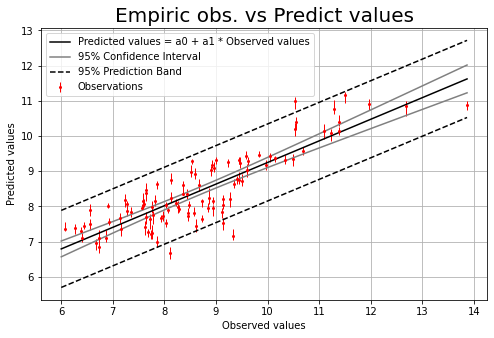

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: Sr_2021_kBq_m: mean - 0.666, median - 0.669, CI - [0.622-0.705]

SHAP-values for: contr_b_MAX: mean - 0.077, median - 0.075, CI - [0.06-0.094]

SHAP-values for: contr_b_STD: mean - 0.138, median - 0.134, CI - [0.111-0.166]

SHAP-values for: r_MIN: mean - 0.298, median - 0.295, CI - [0.263-0.328]



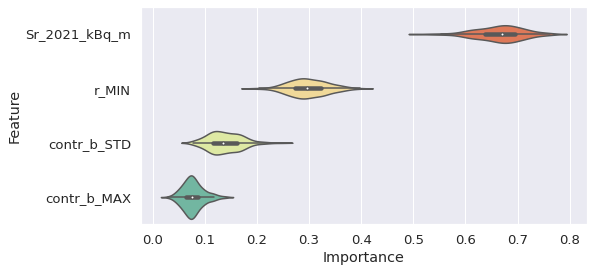

In [26]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['Sr_2021_kBq_m', 'r_MIN', 'contr_b_STD', 'contr_b_MAX'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [27]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [28]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 153.32, median: 155.0,
 pred. interval (P(0.025)-P(0.975)): 142.95-155.0, 
 conf. interval (p-value=0.95): 154.097-155.0 
***
Aggregate bias statistic: 
 mean: -0.245, median: -0.227,
 pred. interval (P(0.025)-P(0.975)): -0.608-0.071, 
 conf. interval (p-value=0.95): -0.405--0.067 
***
Aggregate RMSE statistic: 
 mean: 0.82, median: 0.797, pred. interval (P(0.025)-P(0.975)): 0.624-1.126, 
 conf. interval (p-value=0.95): 0.699-0.949 
***
Aggregate MSE statistic: 
 mean: 0.692, median: 0.635, pred. interval (P(0.025)-P(0.975)): 0.389-1.268, 
 conf. interval (p-value=0.95): 0.489-0.904 
***
Aggregate R^2 statistic: 
 mean: 0.646, median: 0.665, pred. interval (P(0.025)-P(0.975)): 0.363-0.795, 
 conf. interval (p-value=0.95): 0.559-0.739 
***
Aggregate bias(%) statistic: 
 mean: -2.775, median: -2.609, pred. interval (P(0.025)-P(0.975)): -6.546-0.858, 
 conf. interval (p-value=0.95): -4

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

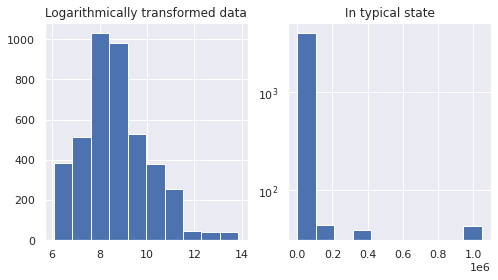

In [29]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [30]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [6, 7, 8, 9, 10, 11, 14])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 500, 1000, 5000, 10000, 20000, 50000, 1000000])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

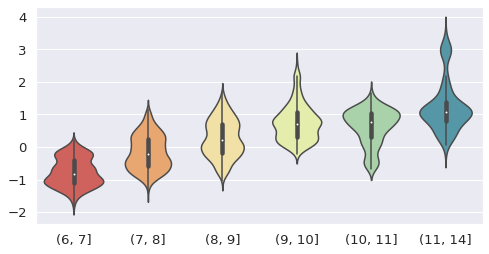

In [31]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

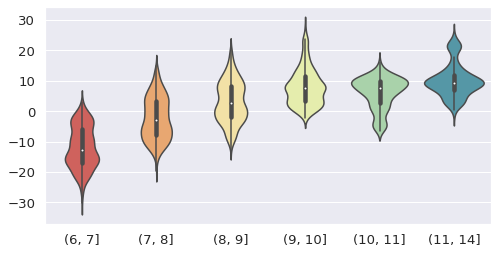

In [32]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

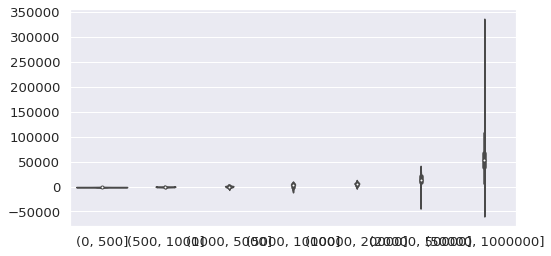

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

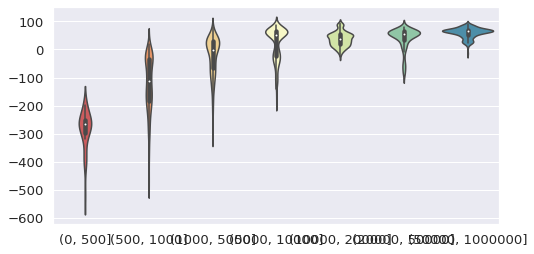

In [34]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [35]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [36]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [37]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:8.08599
[1]	validation_0-rmse:7.89149
[2]	validation_0-rmse:7.70392
[3]	validation_0-rmse:7.51889
[4]	validation_0-rmse:7.33805
[5]	validation_0-rmse:7.16013
[6]	validation_0-rmse:6.98910
[7]	validation_0-rmse:6.82130
[8]	validation_0-rmse:6.65794
[9]	validation_0-rmse:6.49984
[10]	validation_0-rmse:6.34563


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:6.19406
[12]	validation_0-rmse:6.04648
[13]	validation_0-rmse:5.90572
[14]	validation_0-rmse:5.76713
[15]	validation_0-rmse:5.63244
[16]	validation_0-rmse:5.49608
[17]	validation_0-rmse:5.36834
[18]	validation_0-rmse:5.24232
[19]	validation_0-rmse:5.11771
[20]	validation_0-rmse:4.99928
[21]	validation_0-rmse:4.88347
[22]	validation_0-rmse:4.76971
[23]	validation_0-rmse:4.65801
[24]	validation_0-rmse:4.55330
[25]	validation_0-rmse:4.44861
[26]	validation_0-rmse:4.34689
[27]	validation_0-rmse:4.24701
[28]	validation_0-rmse:4.14937
[29]	validation_0-rmse:4.05277
[30]	validation_0-rmse:3.95901
[31]	validation_0-rmse:3.86542
[32]	validation_0-rmse:3.77825
[33]	validation_0-rmse:3.69279
[34]	validation_0-rmse:3.60693
[35]	validation_0-rmse:3.52413
[36]	validation_0-rmse:3.44489
[37]	validation_0-rmse:3.36468
[38]	validation_0-rmse:3.28772
[39]	validation_0-rmse:3.21250
[40]	validation_0-rmse:3.14234
[41]	validation_0-rmse:3.07265
[42]	validation_0-rmse:3.00299
[43]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [38]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 155


In [39]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

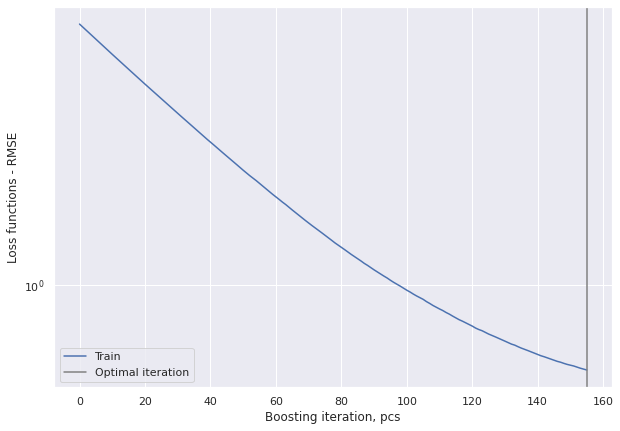

In [40]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [41]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.2
Relative bias(%):  -2.21
RMSE: 0.5
Relative RMSE(%):  5.852
MSE: 0.3
R square: 88.0%


In [42]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.921
Uncertainty
a0: 1.77+/-0.20
a1: 0.774+/-0.023


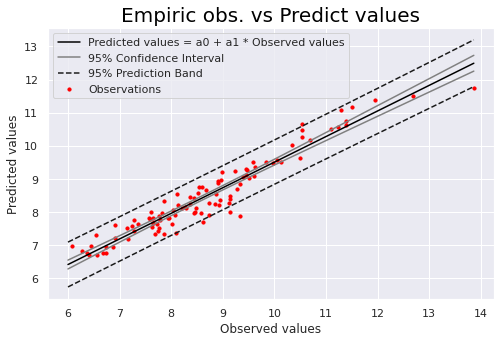

In [44]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

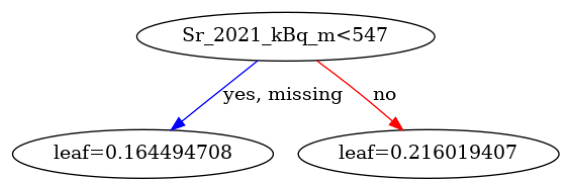

In [53]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

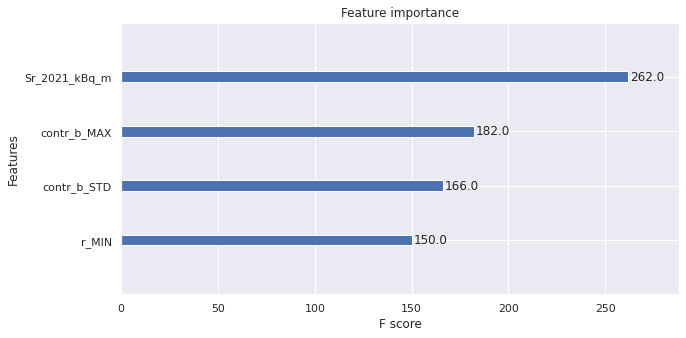

In [59]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

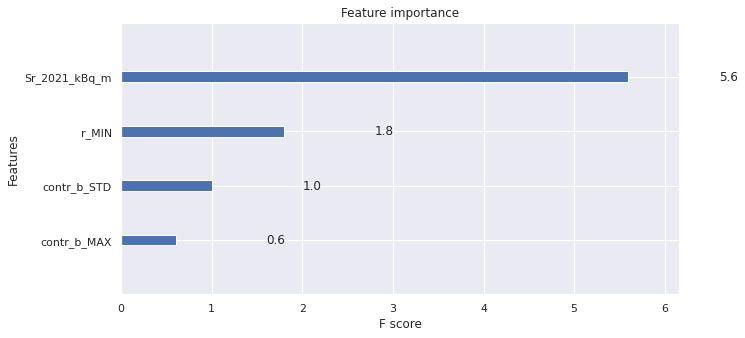

In [60]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

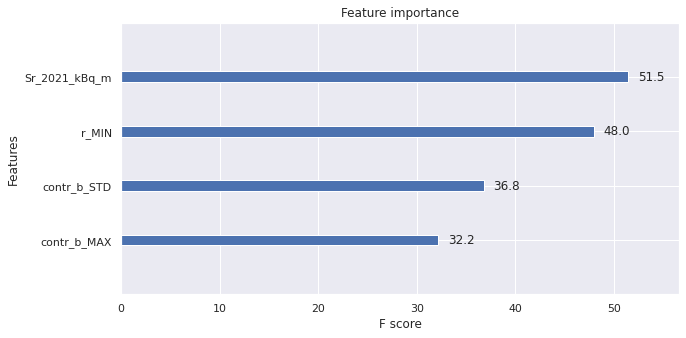

In [61]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [62]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


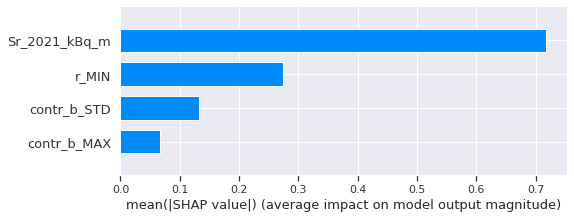

In [63]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

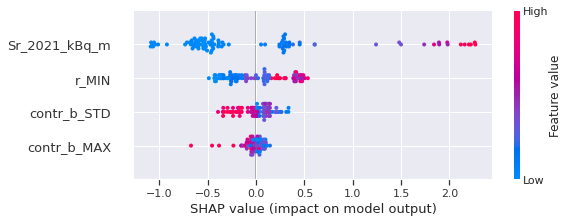

In [64]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

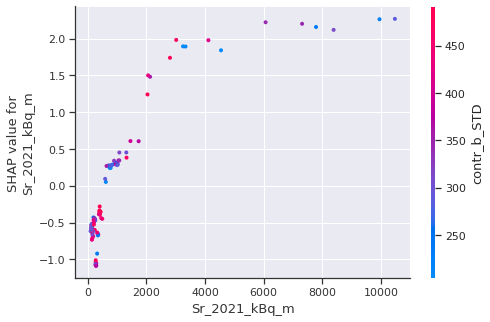

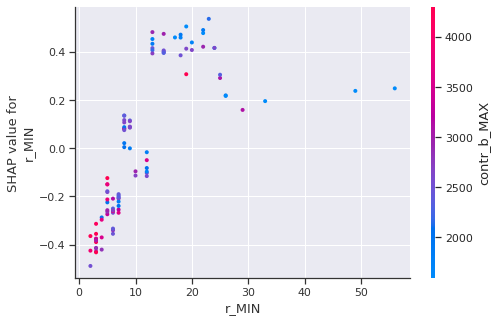

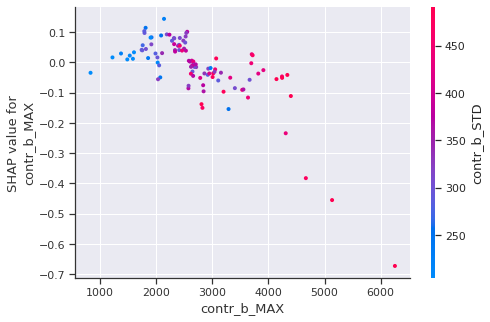

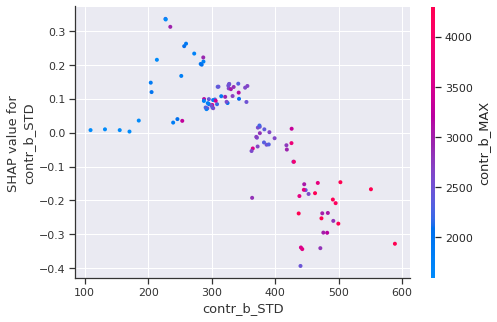

In [65]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [66]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/08_LN_Sr_vs_CHM_RGB_D_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/08_LN_Sr_vs_CHM_RGB_D_XGB_model.txt")